## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Copper_Set.csv')
dfc=df.loc[(df['status']=='Won') | (df['status']=='Lost'),:]
dfc.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_12608\4182693745.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Copper_Set.csv')


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


## DATA CLEANING:

 ### Checking for duplicate rows

In [3]:
a=len(dfc)
print('Original dataframe length',a)
dfc.drop_duplicates(inplace=True)
b=len(dfc)
print('Dataframe length after dropping duplicate rows',b)
print('No of duplicate rows removed',a-b)

Original dataframe length 150448
Dataframe length after dropping duplicate rows 150448
No of duplicate rows removed 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_8848\3502253421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.drop_duplicates(inplace=True)


## Removing unwanted rows 

In [4]:
u=dfc[dfc.material_ref.str.contains("00000000000000000000",na=False)].material_ref.value_counts().index
print('No. of unwanted rows in "material_ref" column: ',len(u))

No. of unwanted rows in "material_ref" column:  4943


In [5]:
# Im dropping the rows containing '00000000000' values in the 'material_ref' column
# and taking a new dataset "df1"

dfc.loc[df['material_ref'].str.contains('00000000000000000000',na=False), 'material_ref'] = np.nan
# print(len(df1))

In [6]:
len(dfc)

150448

## Checking for correlation between features

C:\Users\DELL\AppData\Local\Temp\ipykernel_8848\901191712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = dfc.corr().round(2)


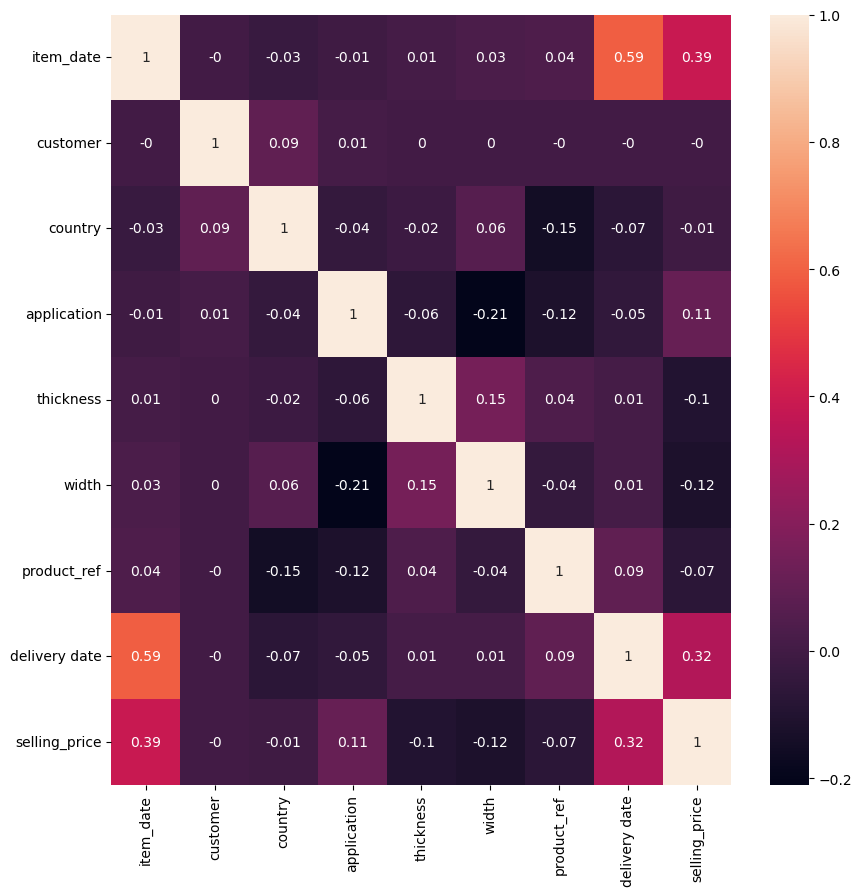

In [7]:
corr_mat = dfc.corr().round(2)
plt.subplots(figsize=(10,10))
ax = sns.heatmap(data=corr_mat, annot=True)
plt.show()

*Not much correlation between independent features except between 'thickness' and 'width'*
*We can also see that no correlation exists between independent and target variables*

## Dataset shape and checking the null,unique values in each column

In [8]:
dfc.shape

(150448, 14)

In [9]:
pd.DataFrame({'dtypes':dfc.dtypes,'null_count':dfc.isnull().sum(),'unique_values':dfc.nunique(),
             'percent_of_null_values':dfc.isnull().mean()})


,dtypes,null_count,unique_values,percent_of_null_values
id,object,1,150447,0.000007
item_date,float64,1,250,0.000007
quantity tons,object,0,150448,0.000000
customer,float64,1,1124,0.000007
country,float64,4,17,0.000027
status,object,0,2,0.000000
item type,object,0,7,0.000000
application,float64,3,30,0.000020
thickness,float64,0,569,0.000000
width,float64,0,1347,0.000000


**'material_ref ' column contains 55% of missing values,other columns contain less than 1% of missing data**

- Im dropping all rows which has less than 1% missing data in its respective columns

In [10]:
dfc.dropna(subset=['item_date','customer', 'country', 'status',
       'application', 'thickness',
       'delivery date','selling_price'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8848\782970990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.dropna(subset=['item_date','customer', 'country', 'status',


In [11]:
dfc.shape

(150440, 14)

In [12]:
pd.DataFrame({'dtypes':dfc.dtypes,'null_count':dfc.isnull().sum(),'unique_values':dfc.nunique(),
             'percent_of_null_values':dfc.isnull().mean()})

,dtypes,null_count,unique_values,percent_of_null_values
id,object,1,150439,0.000007
item_date,float64,0,250,0.000000
quantity tons,object,0,150440,0.000000
customer,float64,0,1123,0.000000
country,float64,0,17,0.000000
status,object,0,2,0.000000
item type,object,0,7,0.000000
application,float64,0,30,0.000000
thickness,float64,0,569,0.000000
width,float64,0,1347,0.000000


*Since 'material_ref' column has 55% missing data I'll impute missing values later in the notebook*

### Finding mixed datatypes  in column(2) i.e 'quantity ton'

In [13]:
o=dfc['quantity tons'] #this column contains values which has mixed datatypes('float','string')

x=[]                        #to store original float values,and original string values 
                            #typecasted to float

z=[]                        #to store the index of the 'odd' value in the column
z1=[]                       #to store the 'odd' value in the column
for i in o:
    try:
        if i==float(i):
            x.append(i)
        else:
            x.append(float(i))
    except ValueError:
        z1.append(i)
        z.append(i)
print('Length of the dataset after finding the unrequired value: ',len(x))
print('Unrequired value: ',z1)


Length of the dataset after finding the unrequired value:  150439
Unrequired value:  ['e']


In [14]:
dfc[dfc['quantity tons']=='e']

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
173086,3C0A018F-4A85-4D96-A1AA-72BF0F7DC6DD,20200714.0,e,30157111.0,78.0,Won,W,41.0,0.5,1000.0,NaN,164141591,20200801.0,672.0


In [15]:
# Dropping row 173086

dfc.drop(173086,inplace=True)
dfc.shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_8848\1928777676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.drop(173086,inplace=True)


(150439, 14)

In [16]:
# Converting the 'quantity tons' column datatype from object to 'float'

dfc["quantity tons"] = dfc["quantity tons"].apply(lambda x: float(x))

C:\Users\DELL\AppData\Local\Temp\ipykernel_8848\2978961674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["quantity tons"] = dfc["quantity tons"].apply(lambda x: float(x))


In [17]:
dfc["quantity tons"].dtype

dtype('float64')

### Checking outliers in numerical variables

In [18]:
#from sklearn.model_selection import train_test_split
def plots(dfc, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dfc[variable], bins=30)
    plt.title('Histogram')

   # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dfc[variable])
    plt.title('Boxplot')
    plt.show()

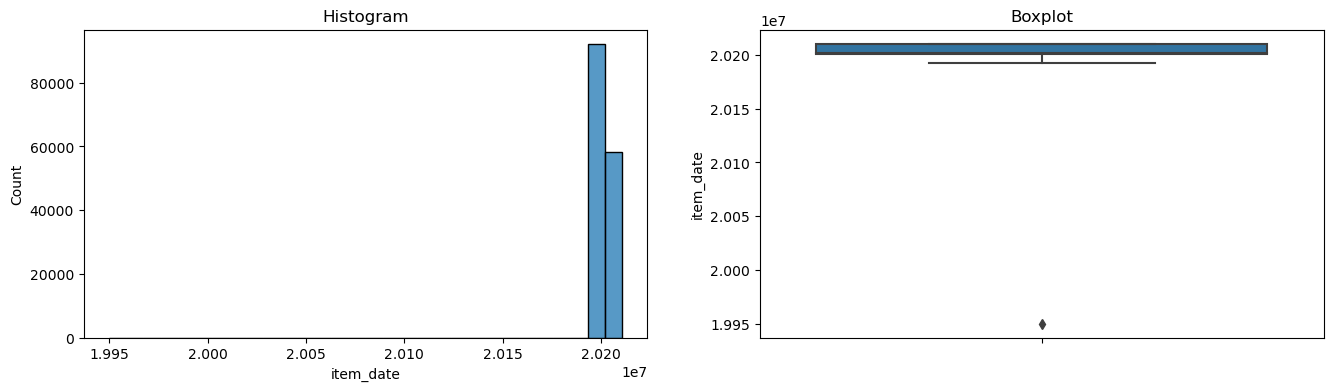

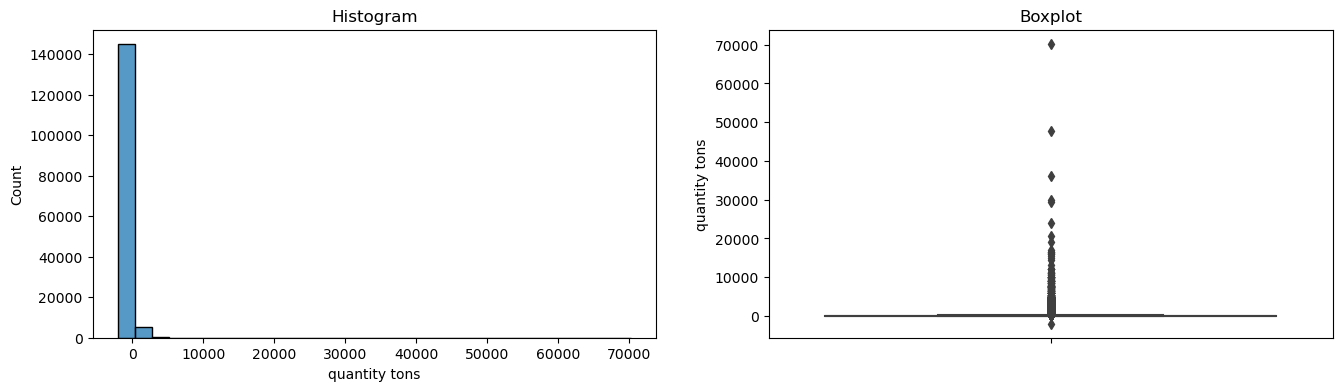

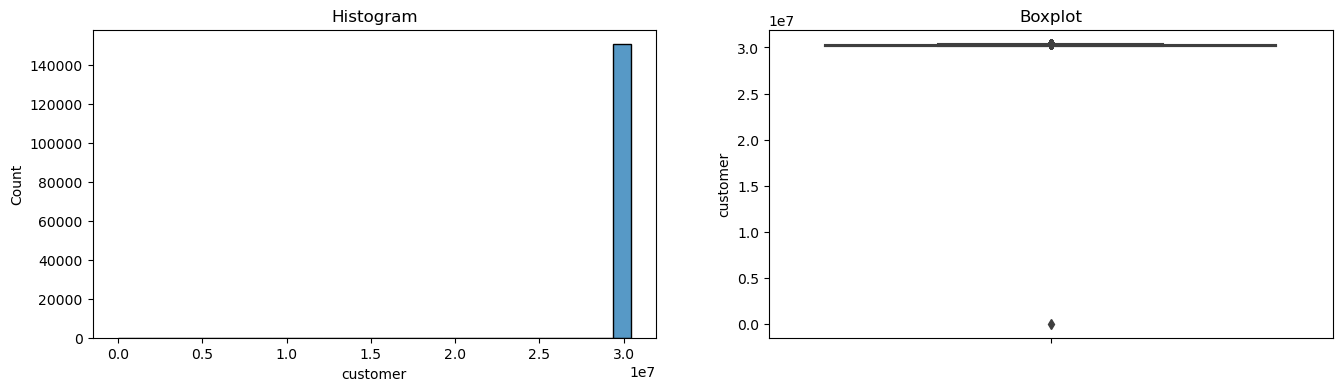

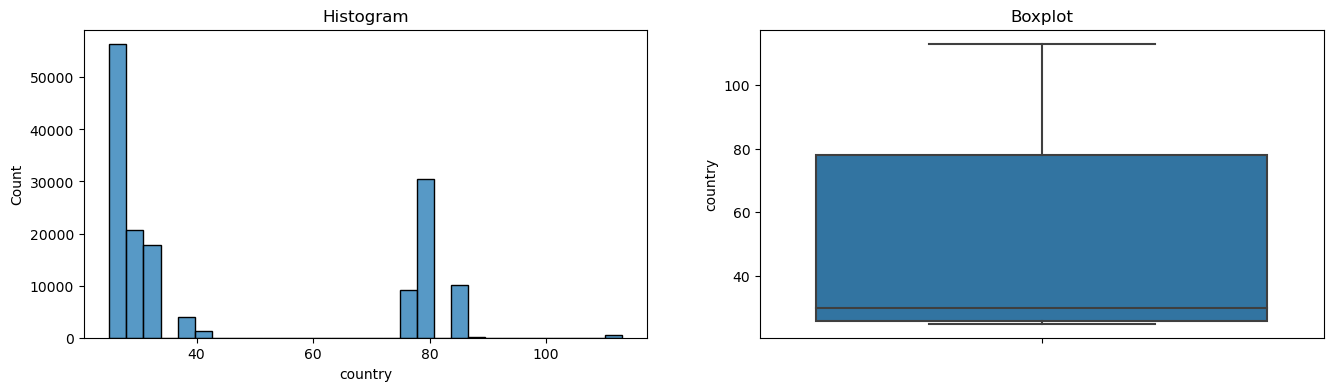

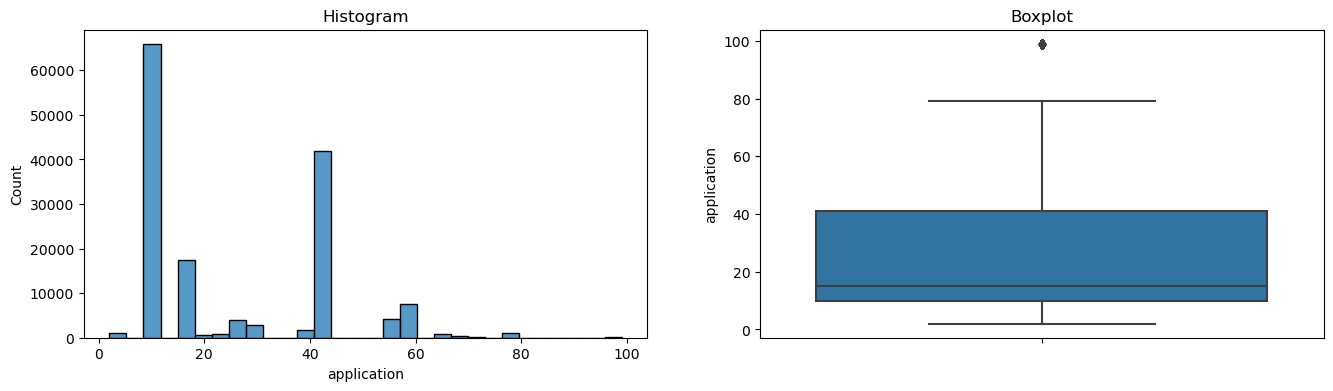

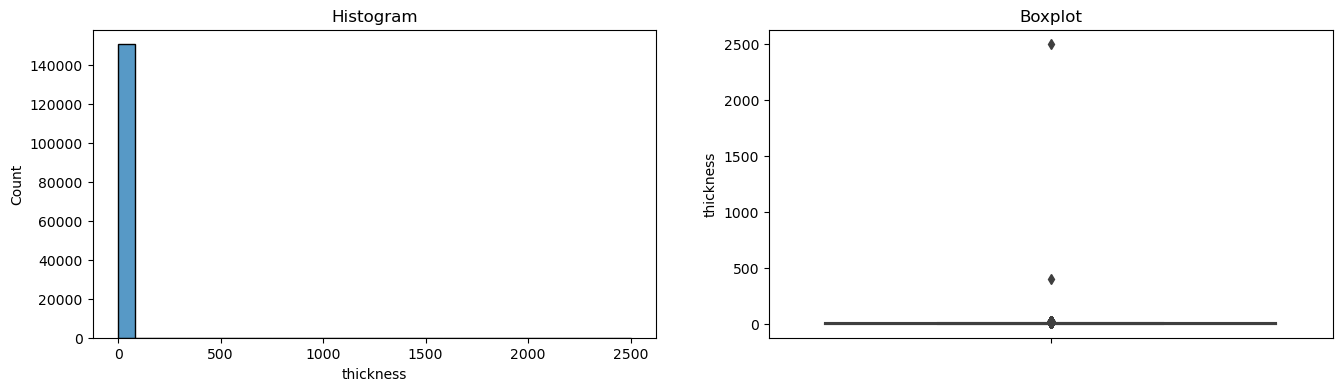

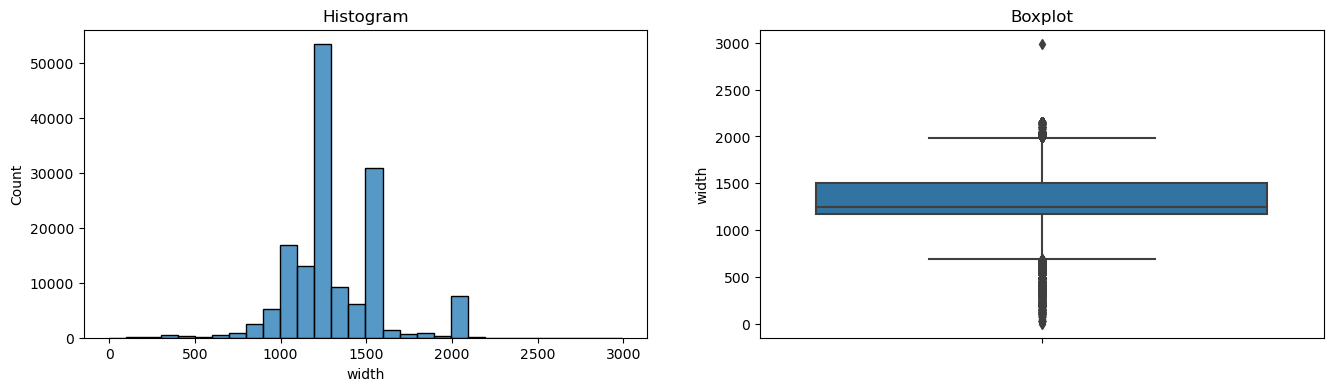

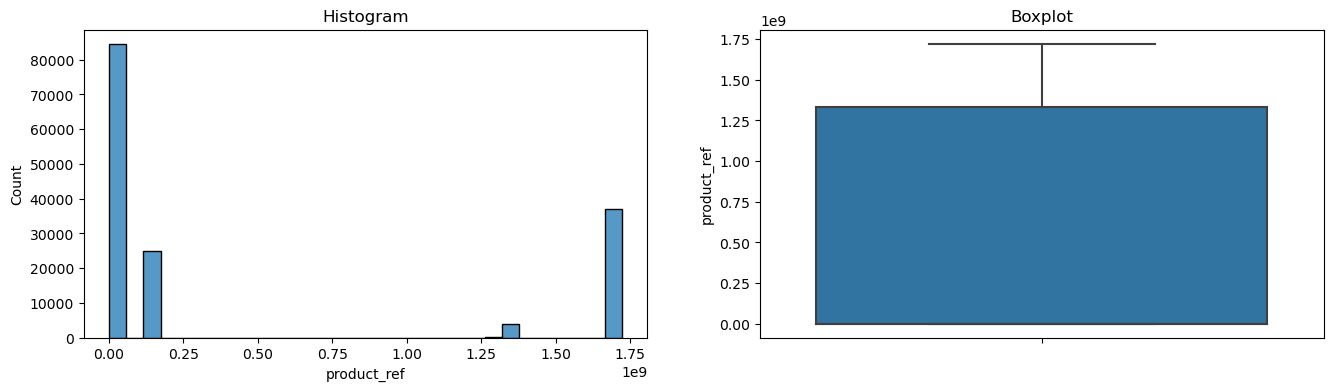

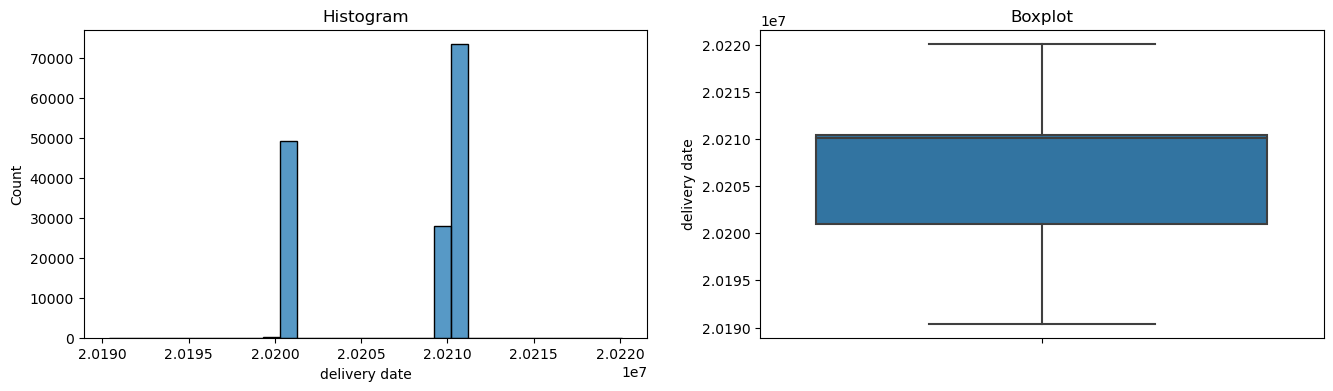

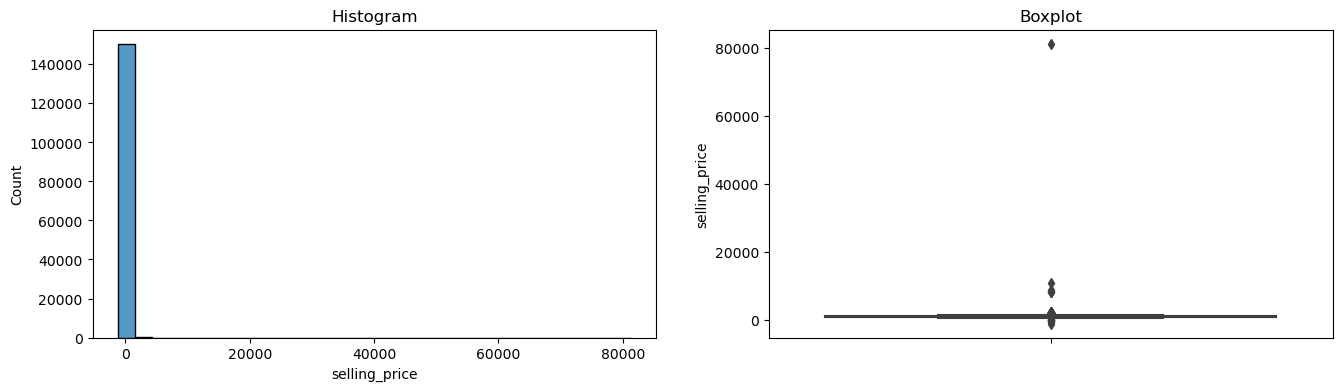

In [19]:
for j in ['item_date', 'quantity tons', 'customer', 'country', 
        'application', 'thickness', 'width',
       'product_ref', 'delivery date', 'selling_price']:
    plots(dfc,j)

*Among these variables only 'country',
      'product_ref  and 'delivery date' does not have any outliers*

### Finding the upper and lower limit to replace outliers

In [20]:
def find_skewed_boundaries(dfc, variable, distance):

    # Calculating the boundaries outside which sit the outliers
    # for skewed distributions


    IQR = dfc[variable].quantile(0.75) - dfc[variable].quantile(0.25)

    lower_boundary = dfc[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = dfc[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [21]:
item_date_upper_limit, item_date_lower_limit = find_skewed_boundaries(dfc, 'item_date', 1.5)
item_date_upper_limit, item_date_lower_limit

(20224114.0, 20187018.0)

In [22]:
quantity_tons_upper_limit, quantity_tons_lower_limit = find_skewed_boundaries(dfc, 'quantity tons', 1.5)
quantity_tons_upper_limit, quantity_tons_lower_limit

(146.1191686175, -70.5556344025)

In [23]:
customer_upper_limit, customer_lower_limit = find_skewed_boundaries(dfc, 'customer', 1.5)
customer_upper_limit, customer_lower_limit

(30404216.0, 30072488.0)

In [24]:
application_upper_limit, application_lower_limit = find_skewed_boundaries(dfc, 'application', 1.5)
application_upper_limit, application_lower_limit

(87.5, -36.5)

In [25]:
thickness_upper_limit, thickness_lower_limit = find_skewed_boundaries(dfc, 'thickness', 1.5)
thickness_upper_limit, thickness_lower_limit

(6.39, -2.6499999999999995)

In [26]:
width_upper_limit, width_lower_limit = find_skewed_boundaries(dfc, 'width', 1.5)
width_upper_limit, width_lower_limit

(1986.0, 690.0)

In [27]:
selling_price_upper_limit, selling_price_lower_limit = find_skewed_boundaries(dfc, 'selling_price', 1.5)
selling_price_upper_limit, selling_price_lower_limit

(1371.0, 251.0)

### Replacing outliers with upper and lower limits

In [28]:
def replace_outlier(dataset,variable,upper_limit,lower_limit):
    dataset[variable]= np.where(dataset[variable] > upper_limit, upper_limit,
                       np.where(dataset[variable] < lower_limit, lower_limit, dataset[variable]))

In [29]:
replace_outlier(dfc,'item_date',item_date_upper_limit, item_date_lower_limit)
replace_outlier(dfc,'quantity tons',quantity_tons_upper_limit, quantity_tons_lower_limit)
replace_outlier(dfc,'customer',customer_upper_limit, customer_lower_limit)
replace_outlier(dfc,'application',application_upper_limit, application_lower_limit)
replace_outlier(dfc,'thickness',thickness_upper_limit, thickness_lower_limit)
replace_outlier(dfc,'width',width_upper_limit, width_lower_limit)
replace_outlier(dfc,'selling_price',selling_price_upper_limit, selling_price_lower_limit)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8848\2124908812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[variable]= np.where(dataset[variable] > upper_limit, upper_limit,


### Checking for outlier's after replacing the outliers with upper and lower limit values

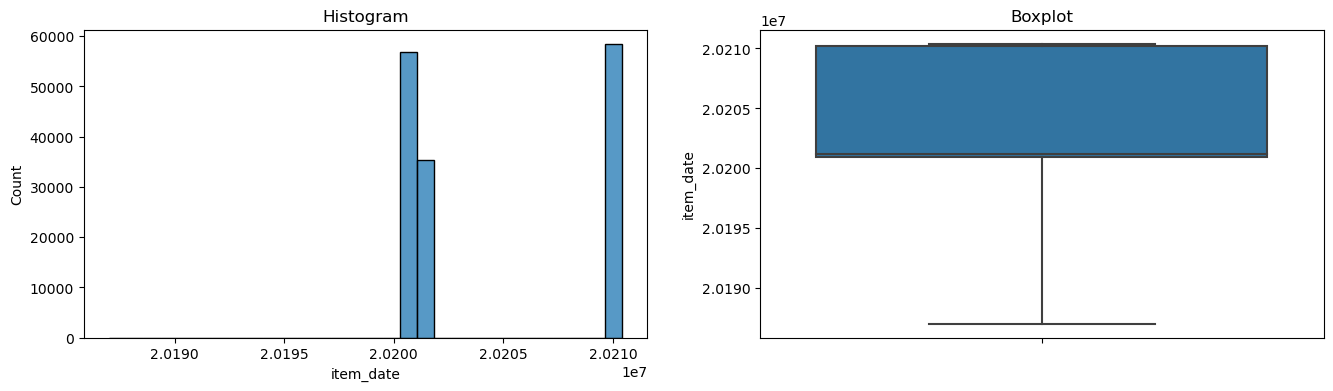

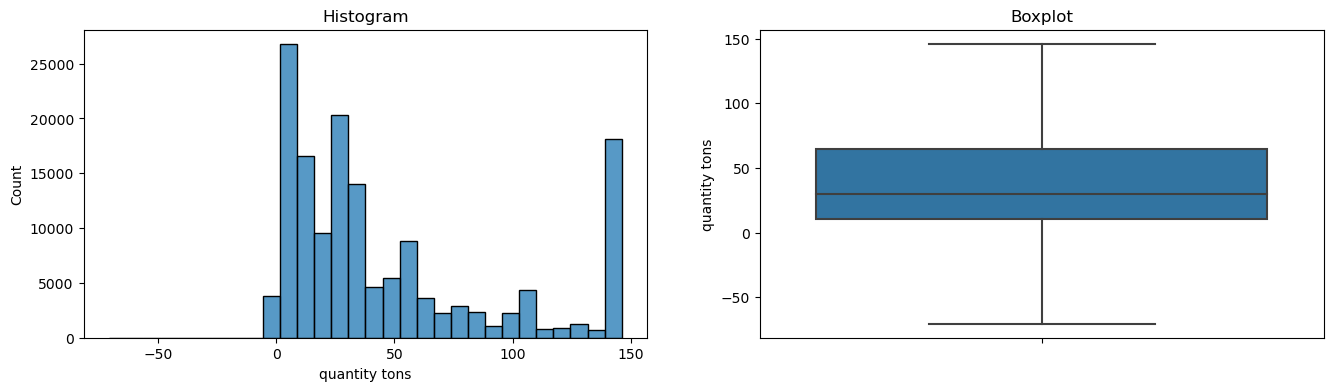

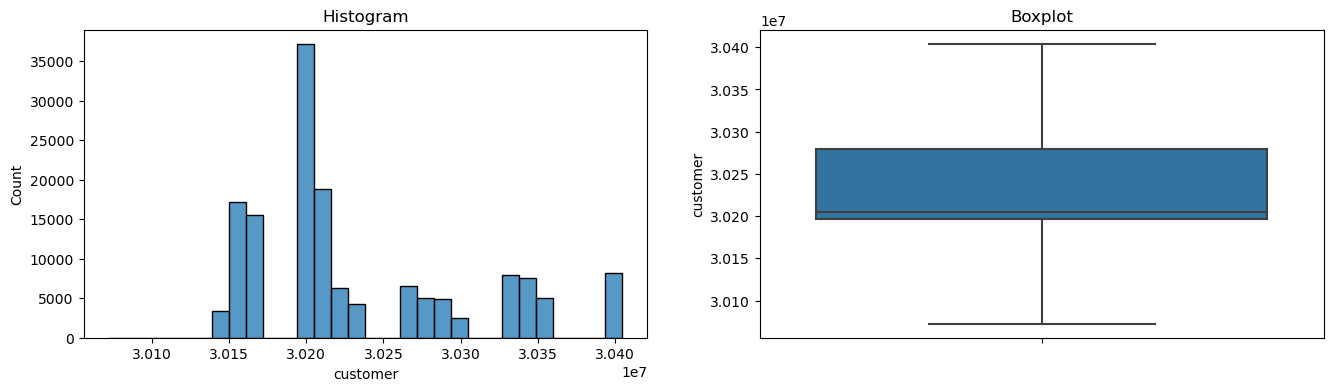

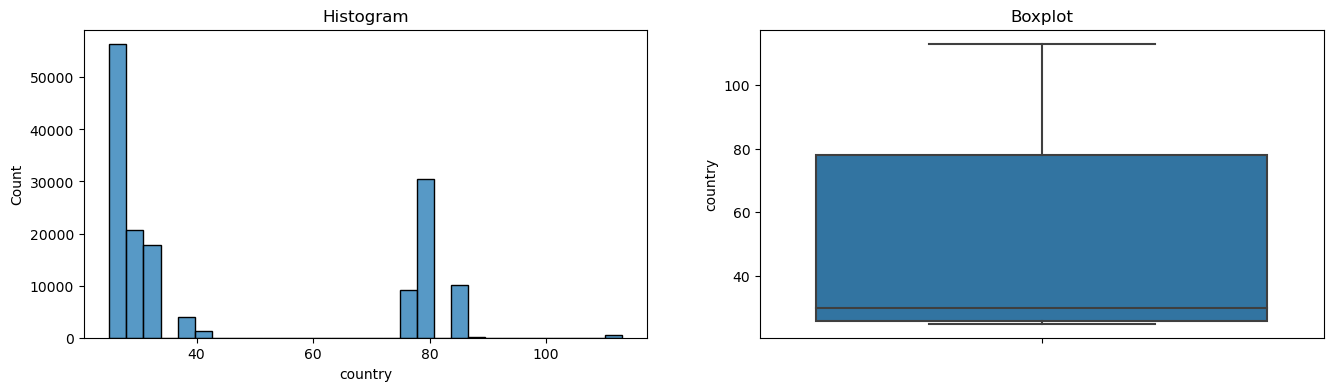

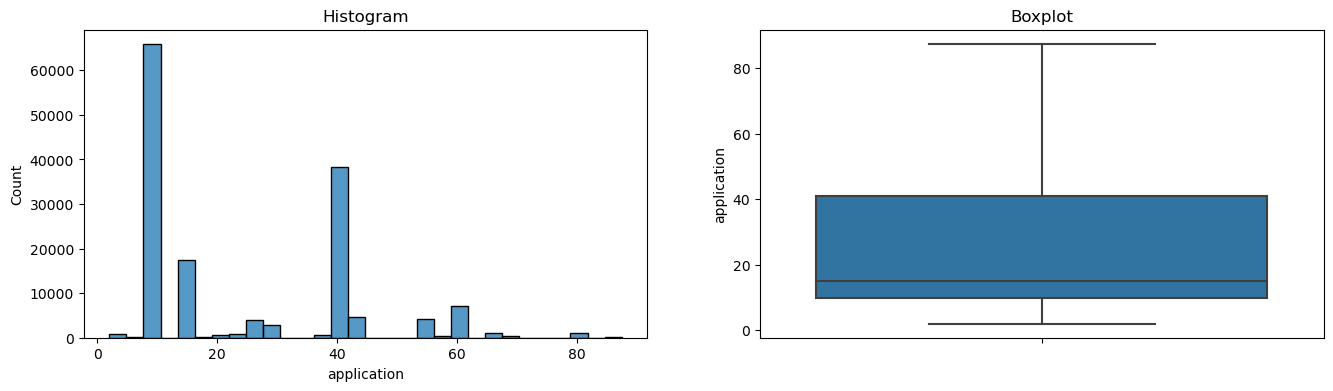

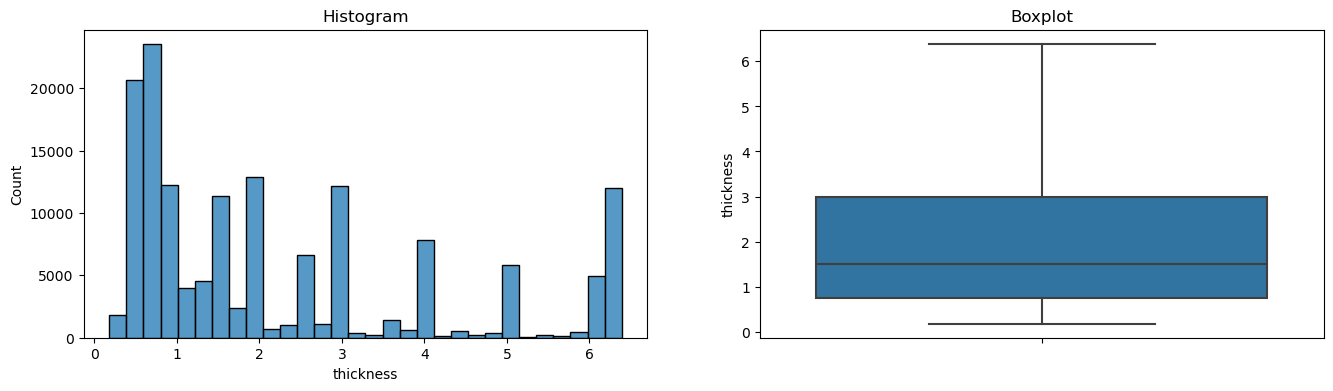

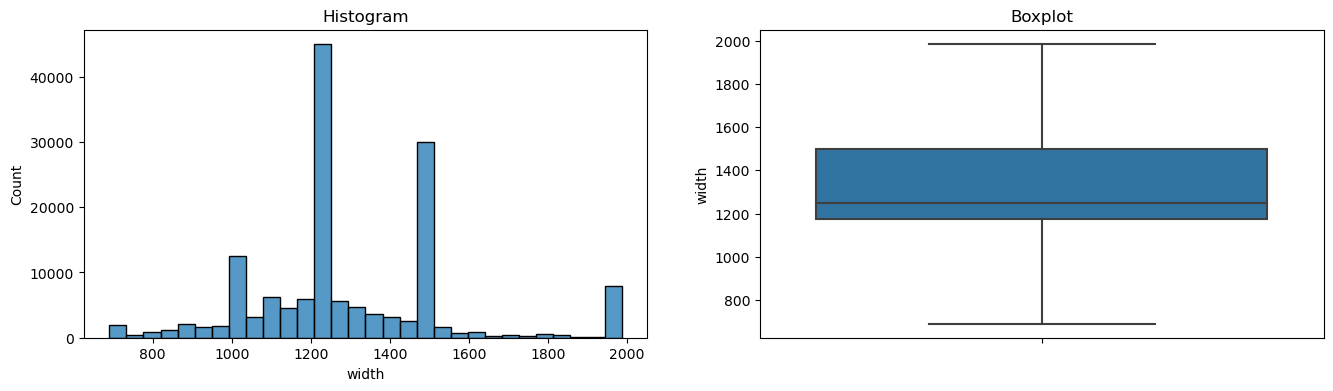

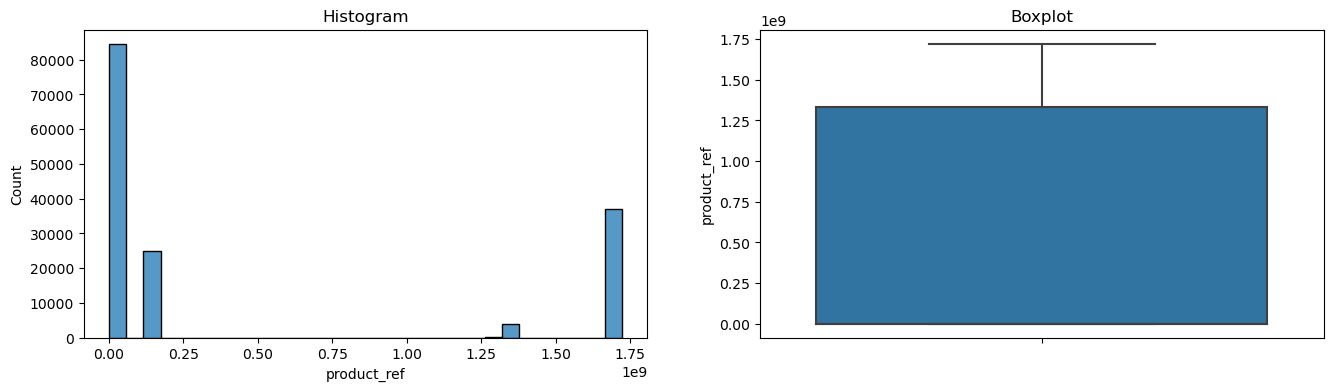

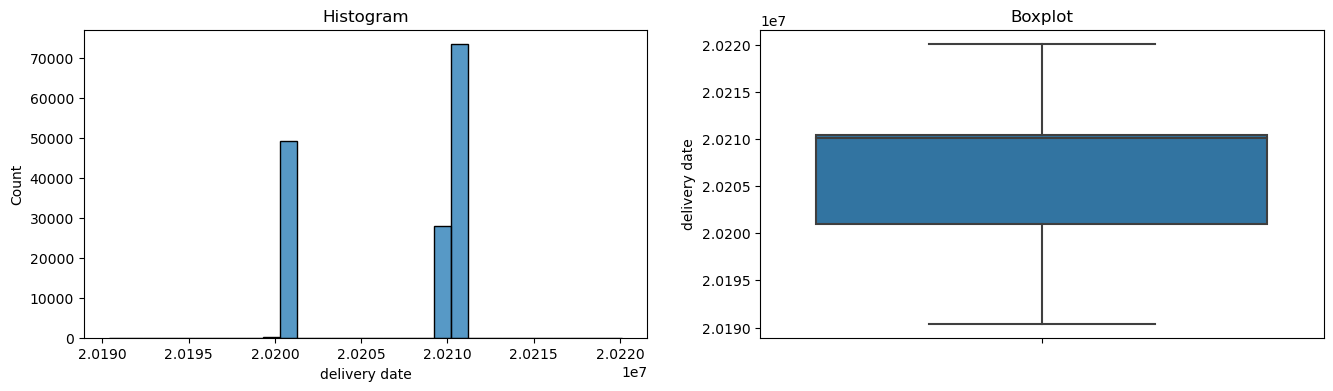

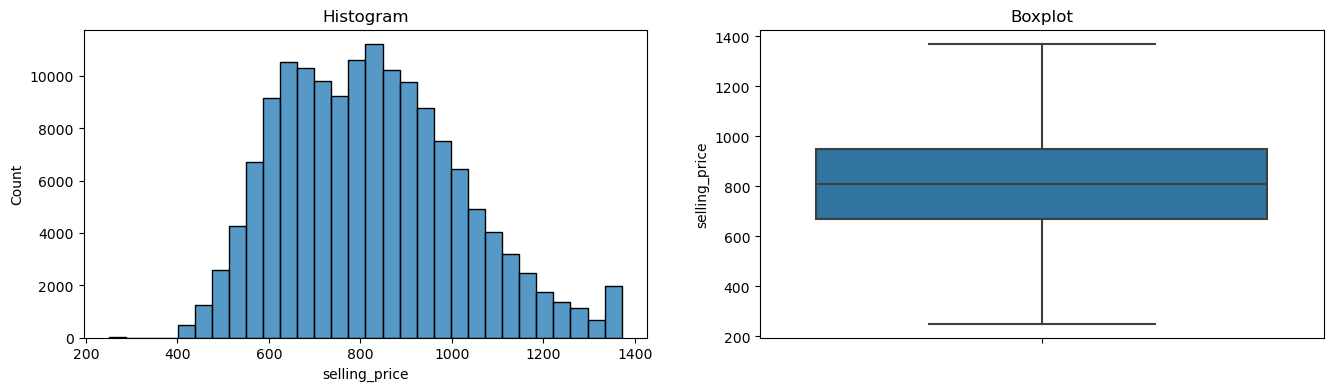

In [30]:
for j in ['item_date', 'quantity tons', 'customer', 'country', 
        'application', 'thickness', 'width',
       'product_ref', 'delivery date', 'selling_price']:
    plots(dfc,j)

*Outliers are replaced with the upper and lower limits of their respective columns
-->outliers are corrected but there is a change in distribution*

In [31]:
dfc.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,146.119169,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,146.119169,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,146.119169,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,146.119169,30211560.0,28.0,Won,W,10.0,4.00,1986.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


## Splitting the dataset

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df1=df.copy() #for classification

In [34]:
y = dfc['status']
X = dfc.drop(['id','quantity tons','status'],axis=1) #taking all independent variables except 'id' and 'selling_price'
   #target variable 'status'
X.head()

,item_date,customer,country,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,30156308.0,28.0,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,20210401.0,30202938.0,25.0,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,20210401.0,30153963.0,30.0,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,20210401.0,30349574.0,32.0,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,20210401.0,30211560.0,28.0,W,10.0,4.00,1986.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2023,
)

X_train.shape, X_test.shape

((120351, 11), (30088, 11))

## Filling NaN values

### Missing data imputation for 'material_ref' column

In [36]:
# Getting a list of all the unique values from the country column 

m=list(X_train['country'].unique())
print(m)

[32.0, 84.0, 25.0, 77.0, 26.0, 78.0, 27.0, 39.0, 28.0, 30.0, 38.0, 79.0, 40.0, 113.0, 80.0, 89.0, 107.0]


In [37]:
# Grouping the dataset based on country and  finding the most frequent 'material_ref' value 

t=[]    # List of unique countries 
t1=[]   # List of the most frequent 'material_ref' value corresponding to each country

for country in m:
    p=X_train[(X_train['country']== country)][X_train.columns]
    p1=p['material_ref'].mode()
    t.append(country)
    
    try:
        t1.append(p1.iloc[0])
    
    except IndexError: # Country=89.0 has NaN values on all its 'material_ref' column 
        t1.append('missing')
    
    #print('country no.: ',country,'\n','frequently occurring material_ref: ',p1,'\n')
print(t)
print(t1)

[32.0, 84.0, 25.0, 77.0, 26.0, 78.0, 27.0, 39.0, 28.0, 30.0, 38.0, 79.0, 40.0, 113.0, 80.0, 89.0, 107.0]
['S235JR+AR LARG SUP 1500 CVLT', 'DC01', 'HC220CA', 'CONSIGNMENT STOCK', 'PI_S235JR-CL1', 'DC01 RED.FLAT KUCHNIA EKO 2.2', 'DC01', 'HC220CA', 'NEQ1 S355J2+N', 'S220GD+Z275 MAC_GALV EDGES', 'S235JR+AR-CL1', 'FLF2X1600X2500AA/4', '-', 'S220GD+Z', 'U70199U', 'missing', 'missing']


- *What I've done here is that,for country 27.0-'DC01' is the most frequently used 'material ref',I will impute all NaN values in 'material_ref' column grouped by country 27.0 with 'DC01'*
- *This strategy is applied for all the other countries too*
- *A quick note:country **89.0** has **NaN** values on all of its rows,so the most frequent 'material ref' is **NaN**,so for this particular country,I've replace NaN as 'missing'.*

**Demo Below:**

In [38]:
(X_train.loc[(X_train['country']==89.0),:])

,item_date,customer,country,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
93700,20201126.0,30218453.0,89.0,W,15.0,2.00,1000.0,NaN,628377,20210401.0,745.0
153953,20200826.0,30218743.0,89.0,S,15.0,1.18,1250.0,NaN,1668701376,20201101.0,699.0
120082,20201020.0,30157211.0,89.0,S,10.0,6.39,1500.0,NaN,1670798778,20210101.0,652.0
93760,20201126.0,30218453.0,89.0,W,15.0,2.99,1000.0,NaN,628377,20210401.0,749.0
93748,20201126.0,30218453.0,89.0,W,15.0,1.50,1500.0,NaN,628377,20210401.0,740.0
...,...,...,...,...,...,...,...,...,...,...,...
93800,20201126.0,30218453.0,89.0,W,15.0,1.50,1500.0,NaN,628377,20210401.0,736.0
93704,20201126.0,30218453.0,89.0,W,15.0,2.00,1250.0,NaN,628377,20210401.0,745.0
93792,20201126.0,30218453.0,89.0,W,15.0,1.50,1000.0,NaN,628377,20210401.0,738.0
93712,20201126.0,30218453.0,89.0,W,15.0,0.60,1250.0,NaN,628377,20210401.0,763.0


In [39]:
# Filling missing values in train_set
for h in range(len(t)):
    X_train.loc[(X_train['country']==t[h]) & (X_train['material_ref'].isnull()),['material_ref']]=t1[h]

In [40]:
# Filling missing values in test_set
for h in range(len(t)):
    X_test.loc[(X_test['country']==t[h]) & (X_test['material_ref'].isnull()),['material_ref']]=t1[h]

In [41]:
(X_train.loc[(X_train['country']==89.0),:])

,item_date,customer,country,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
93700,20201126.0,30218453.0,89.0,W,15.0,2.00,1000.0,missing,628377,20210401.0,745.0
153953,20200826.0,30218743.0,89.0,S,15.0,1.18,1250.0,missing,1668701376,20201101.0,699.0
120082,20201020.0,30157211.0,89.0,S,10.0,6.39,1500.0,missing,1670798778,20210101.0,652.0
93760,20201126.0,30218453.0,89.0,W,15.0,2.99,1000.0,missing,628377,20210401.0,749.0
93748,20201126.0,30218453.0,89.0,W,15.0,1.50,1500.0,missing,628377,20210401.0,740.0
...,...,...,...,...,...,...,...,...,...,...,...
93800,20201126.0,30218453.0,89.0,W,15.0,1.50,1500.0,missing,628377,20210401.0,736.0
93704,20201126.0,30218453.0,89.0,W,15.0,2.00,1250.0,missing,628377,20210401.0,745.0
93792,20201126.0,30218453.0,89.0,W,15.0,1.50,1000.0,missing,628377,20210401.0,738.0
93712,20201126.0,30218453.0,89.0,W,15.0,0.60,1250.0,missing,628377,20210401.0,763.0


- Now we can see that the NaN values are replaced as 'missing' for country 89.0

In [42]:
X_train.shape,X_test.shape

((120351, 11), (30088, 11))

In [43]:
y_train.shape,y_test.shape

((120351,), (30088,))

## Features selected for mean encoding

In [44]:
features_mean_enc=['item_date','customer','country','item type','application',
              'thickness','width','material_ref','product_ref','delivery date','selling_price']



**The total no.of independent variables in the original dataset-13 nos.**

- 'id','item_date','quantity tons','customer','country','status','item type', 'application',	'thickness','width','material_ref','product_ref','delivery date'

**Rejected features-4 nos.**
-  **'id'**,**'quantity tons'**,**'country'**,**'item type'** columns as they contribute nothing to predict target variable

**Selected features-9 nos.**
- 'item_date',
  'customer',
  'status',
  'application',
  'thickness',
  'width',
  'material_ref',
  'product_ref',
  'delivery date'
  
  ### From here onwards I will continue to build the model using these 9 imp_features

## Mean Encoding with Feature-Engine


In [45]:
dfc2=pd.concat([X_train, X_test])
dfc3=list(pd.concat([y_train, y_test]))
dfc2['status']=dfc3

dfc2.head()

,item_date,customer,country,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,status
100952,20201118.0,30205312.0,32.0,W,10.0,1.50,1100.0,S235JR+AR LARG SUP 1500 CVLT,1332077137,20210201.0,698.0,Won
89121,20201202.0,30205190.0,84.0,W,10.0,0.80,1500.0,2292431627 84392,1668701718,20210101.0,850.0,Won
119125,20201021.0,30205242.0,25.0,W,28.0,1.15,910.0,910 HC180CA,628377,20201201.0,587.0,Won
142964,20200915.0,30165992.0,77.0,S,10.0,2.00,1060.0,CONSIGNMENT STOCK,1670798778,20201201.0,686.0,Lost
37821,20210217.0,30199280.0,26.0,W,42.0,1.00,1340.0,PI_S235JR-CL1,611993,20210701.0,1063.0,Won


In [46]:
dfc2=dfc2.astype(str)

In [47]:
y = dfc2['status'].map({'Won':1,'Lost':0})
X = dfc2.drop(['status'],axis=1) #taking all independent variables except 'id' and 'selling_price'
   #target variable 'selling_price'

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2023,
)

X_train.shape, X_test.shape

((120351, 11), (30088, 11))

In [49]:
y_train.shape, y_test.shape

((120351,), (30088,))

In [50]:
a=X_train.copy()

In [51]:
b=y_train.copy()

In [52]:
from feature_engine.encoding import MeanEncoder

In [53]:
mean_enc_c = MeanEncoder(variables=features_mean_enc)

In [54]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc_c.fit(X_train, y_train)

MeanEncoder(variables=['item_date', 'customer', 'country', 'item type',
                       'application', 'thickness', 'width', 'material_ref',
                       'product_ref', 'delivery date', 'selling_price'])

In [55]:
# in the encoder dict we see the target mean assigned to each
# category for each of the selected variables

mean_enc_c.encoder_dict_

{'item_date': {'20187018.0': 1.0,
  '20191919.0': 0.0,
  '20200702.0': 0.8628019323671497,
  '20200703.0': 0.7945945945945946,
  '20200704.0': 0.0,
  '20200705.0': 1.0,
  '20200706.0': 0.7276073619631902,
  '20200707.0': 0.8483920367534457,
  '20200708.0': 0.8065764023210832,
  '20200709.0': 0.7067833698030634,
  '20200710.0': 0.5146198830409356,
  '20200712.0': 1.0,
  '20200713.0': 0.7568,
  '20200714.0': 0.7106481481481481,
  '20200715.0': 0.889253486464315,
  '20200716.0': 0.3965287049399199,
  '20200717.0': 0.7631578947368421,
  '20200718.0': 0.3333333333333333,
  '20200719.0': 0.0,
  '20200720.0': 0.8111380145278451,
  '20200721.0': 0.6174377224199288,
  '20200722.0': 0.7941176470588235,
  '20200723.0': 0.6081967213114754,
  '20200724.0': 0.6095238095238096,
  '20200727.0': 0.8128872366790583,
  '20200728.0': 0.7393939393939394,
  '20200729.0': 0.7109589041095891,
  '20200730.0': 0.7289048473967684,
  '20200731.0': 0.7674418604651163,
  '20200801.0': 0.8181818181818182,
  '2020080

In [56]:
mean_enc_c.variables_

['item_date',
 'customer',
 'country',
 'item type',
 'application',
 'thickness',
 'width',
 'material_ref',
 'product_ref',
 'delivery date',
 'selling_price']

In [57]:
X_train = mean_enc_c.transform(X_train)
X_test = mean_enc_c.transform(X_test)

# let's explore the result
X_train.head()

C:\Users\DELL\anaconda3\envs\ml_coppermodelling\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) item_date, customer, item type, thickness, width, material_ref, product_ref, selling_price.
  warnings.warn(


,item_date,customer,country,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
80011,0.904896,0.817264,0.886749,0.860543,0.748419,0.597212,0.626314,0.826725,0.777616,0.686139,0.729282
48570,0.859172,0.967255,0.868229,0.860543,0.748419,0.730191,0.755305,1.000000,0.822489,0.767347,0.781250
176321,0.806576,0.938819,0.886749,0.860543,0.748419,0.730191,0.686881,1.000000,0.777616,0.801368,0.826087
67348,0.836283,0.428571,0.687203,0.590057,0.748419,0.730191,0.686881,0.624059,0.777616,0.767347,0.709184
49094,0.859172,0.804192,0.823820,0.860543,0.748419,0.769595,0.747692,0.895522,0.777616,0.638273,0.685185


In [58]:
X_test.isnull().sum()

item_date           3
customer            6
country             0
item type           1
application         0
thickness          11
width              12
material_ref      770
product_ref         1
delivery date       0
selling_price    1253
dtype: int64

**We can see that the null value count has been increased in the X_test set**
- This is because some labels from the train_set has not been found in the test_set

In [59]:
# Im creating a new column in the X_test called 'y_test' which contains all values from y_test
X_test['y_test']=y_test

In [60]:
X_test.shape

(30088, 12)

In [61]:
X_test.isnull().sum()

item_date           3
customer            6
country             0
item type           1
application         0
thickness          11
width              12
material_ref      770
product_ref         1
delivery date       0
selling_price    1253
y_test              0
dtype: int64

In [62]:
# Dropping all NaN rows from X_test

X_test.dropna(inplace=True)

In [63]:
X_test.isnull().sum()

item_date        0
customer         0
country          0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
y_test           0
dtype: int64

In [64]:
#Creating a new y_test with no NaN values

y_test=X_test.iloc[:,-1]

In [65]:
#Creating a new X_test with no NaN values

X_test=X_test.iloc[:,:-1]

In [66]:
X_test.shape,y_test.shape

((28089, 11), (28089,))

In [67]:
y_train.value_counts()

1    92835
0    27516
Name: status, dtype: int64

## Important features selected using SHAP


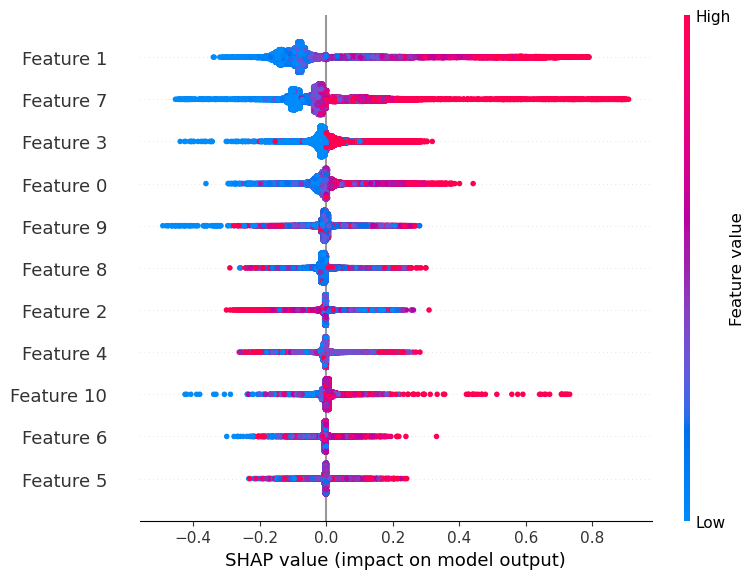

In [68]:
from IPython.display import display
from IPython.display import Image

display(Image(url='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAvMAAAJDCAYAAACGz5uiAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd5wc9Xn48c+U7bvXq+506gUJCQGShcGI2AZsBDEuWAYRxxBBUGJIYvAPkwLBdpqNMc0ikiEiITLFYAOSqSYGjGmmI0ASQqiddKere9vLzHx/f8xe2StqSDoJPe/X60A7O+U7W2afeeb5fkdTSimEEEIIIYQQRxx9tBsghBBCCCGE2D8SzAshhBBCCHGEkmBeCCGEEEKII5QE80IIIYQQQhyhJJgXQgghhBDiCCXBvBBCCCGEEEcoCeaFEEIIIYQ4QkkwL4QQQgghxBFKgnkhhBBCCCGOUBLMCyGEEEKIT5zrr7+ecDi8V89pmsZPfvKTfd7G/i53IJmjunUhhBBCCCFG2UsvvcS4ceNGuxn7RYJ5IYQQQghxVDvppJNGuwn7TcpshBBCCCHEUW1wuYxSih/84AfU1dURDof56le/ymOPPYamaTz77LNFyzqOwz//8z9TW1tLVVUVF198Mclk8pC1XYJ5IYQQQgjxiWVZ1pA/x3F2u8xtt93G9ddfz0UXXcSvf/1rpkyZwtKlS4ed92c/+xkffvgh//M//8O1117LPffcww9/+MODsSvDkjIbIYQoyOfz3HXXXQBcfPHFeDyeUW6REEIIALSvDj9d/Xq3iyWTyRGP5aFQaNjptm3zH//xH1x88cX8x3/8BwBnnnkmu3bt4n/+53+GzF9XV8cvfvELAL74xS/y6quv8uCDD/Yte7BJZl4IIYQQQnwiBQIBXn311SF/l1566YjLNDc309LSwpe+9KWi6eeee+6w85955plFj2fMmEFzc/PHb/xeksy8EEIIIYQ4zGn7tZSu68ydO3fI9N/85jcjLtPS0gJAdXV10fSampph5y8rKyt67PV6yWaz+9jS/SeZeSGEEEIIIQrq6+sBaG9vL5re1tY2Gs3ZIwnmhRBCCCHEYU4b4e/Aa2xspK6ujkceeaRo+sMPP3xQtvdxSZmNEEIIIYQQBYZh8Pd///f83d/9HbW1tXz2s5/ld7/7Hc888wzglu4cTg6v1gghhBBCCDHEocvMA1xxxRX88z//MytXruQrX/kK69at40c/+hEApaWlB227+0NTSqnRboQQQhwOZGhKIYQ4TGlfH366euCQNeGf/umf+OlPf0pnZyeBQOCQbXdPpMxGCCGEEEIc5g5eFn4469atY9WqVZx88sl4vV6effZZfvKTn/BXf/VXh1UgDxLMCyGEEEIIUSQYDPLyyy+zfPlyYrEYDQ0N/L//9/+4/vrrR7tpQ0gwL4QQQgghxADjxo3j//7v/0a7GXtFOsAKIYQQQghxhJLMvBBCCCGEOMwd2pr5I4lk5oUQQgghhDhCSWZeCCGEEEIc5iQzPxLJzAshhBBCCHGEksy8EEIIIYQ4zElmfiSSmRdCCCGEEOIIJZl5IYQQQghxmJPM/EgkMy+EEEIIIcQRSjLzQgghhBDiMCeZ+ZFIZl4IIYQQQogjlGTmhRBCCCHEYU4y8yORzLwQQgghhBBHKMnMCyEOW8teyfI3v1UoU0PpOigFlqLMytP6DwF8HmO0myiEEOIQUCNk5iVfL5l5IcRh6sonslz5W5uSnEVjV4r67hReR4FXJ+r3Mv4fe0a7iUIIIcSok2BeCHFY+s/XbEqTeRq7UpSm8lTGs0xsiWHaCgyd1vIwj72eHu1mCiGEEKNKgnkhxGHJ0nWCOZtNtRHeHVvGptoIeUOnLJl1ZzA0/uvR7tFtpBBCCDHKJJgXQhyWLDSaq0KkfSZoGmmfydbqMDjKnUEpvF7p9iOEEEcHbYQ/IcG8EOKwpGlgG8WHKMvUiYa8bkdYW/G0Co1S64QQQojDg6S1hBCHlT//cTvvb7PQGipQg59UCkvXwVF4bAeVsWm6uos5oQy/+qd6PIZkaYQQ4pNIRrMZmWTmhRAHnFKK1rhNeyzPox/k+KjLwnKGhOZF0jmbY7/TzupsmJzHxGtZjIsmObElyoTuJJpSoMC0HQKWzdhEipxXp7kkxJN6Ocdc03aI9k4IIYQ4fEhmXghxQB2zIsf6Htw6GQVohfHhnTxfneLwL6fo/OPqDO+0KDoyNh5LcfIUD+3rkmyqKcdjOSQCJqfsjFKXzPWttymW5rmxlVSmspz54Q7Gx1I4GrzQVMOGSITNpSXsitvURmTseSGE+OSRHPxIJJgXQhww3/ldjvUxrXDM1fqPvZoGOvz6TYs1L+awQz40n0GjnaIpnsV+JYXlMcnHs9QnslRYNrUDAnmAxniG8nSeXZEg/ztnMpM6Ypz//hY+s7WN6qo8awK1bOh0JJgXQghxVJFgXgjxsaTzimuftbjxdQUoMLRCVt4ti+lTyNTnvR60vENjLMPYVJawbRM3DcKOw4xklk01EVI5i+mJzJBt+W2nb12bKkvYWFHCtK4Y1ZkskUyeptLgIdlnIYQQh5pk5kciwbwQYr9ZjiL4U8sN3HUN9EI3HEe5x119wME3Y/UNK6mADq/JhFSa7X4vaBoZj8GHY0r6hqGMew0iObt/cUOnLejrX58GbSE/U7tixD0eqpMZllzZw5hslouW1PD5z5cf/BdACCGEGGUSzAsh9tlrO23+9IE8rUnA0N2gfWDSRMPNxA/kMyCZ73uYMnQ+8vnoMg13dr/Zt4zSNJ4dX828Hd1UpXJ0+T28XleGPfDkQEFDLElbKMDG0iC6rXirJMJ7KszmexP8ck0X45sCLP5GJeMafAghhDhyjTSajQBNKbX7ISY+htdee42lS5eO+Pzy5cuZO3fuwdo8a9asIR6Ps3jx4oO2jQMhlUqxatUq1q1bx/r162lvb+eEE07g5z//+Wg3TYghZizPsi6q9ZfTgJuZHxy891IKLOVm5S0Hspabmu99PFC5H/xm8bIANoMogsksOGCaOuM7EpjKna3L0AnlLeZGYwTyeSzHoSSVoSMcRGnwza+W8oXzG8kkLPwRE03TsPMOj/7FKzy13aGjvBRH1ylJJvnRqplUVknpjhBCjDZb+4thpxtq5SFuyeHnkGTmzzjjDE499dQh0ydMmHBQt7tmzRpaWloO+2A+Go3y85//nMrKSqZPn05XV9doN0kcxZRSaJrGh902Fz9ms7lbsaPDdjPrug4MCuQdVVxO078id568A70xu6FDwAOZPJqlho4jn8wVBfNzdnbwflUZObMwrW8BjZTPA5pGSSZPxtDJKjej73UcpqczBDQNvF7KEika27oY09FNwuvjheXdbPyPtRjKwTIMlOPgyVl0hwMYtZVkgh4ypkmJsrliyUbueuBYvB6dHZ02Ic0iZcG2d2O89outBFJ5/lBezsTuBLtqImzMeTlu8y7+ZJyGUxvij5sybLF8WA1hAp1Jqrb1kLMcJnTEyBs6Ka+HmNektTIESZsJ3XE2TGqg0+9hUnsP4UyWtMckFQ4Qti3yHg9xv5eq9i5CtsJnO5THE6BscoYX5dHIAF3hCI2JOHgMKpI9VKW6yToe0noIr2PjzeeIlQdJhAI02mlKq3RKTmqi8esTMLwGZsCkZ30XoaCGk3bweBV2WxyzqRrfxBKsV7bSvTGGPqGSkkof3ooAeY+BWebD1DW0vIVZEUArfEasZB5MMH0e7KyN4ZNOyvtLZXJofi/KskGB5jF2fzLdqzsB727FdgzsLBjxKEY+hz1pDE40g7G1FXQNNWc8+m9ehe4EzvpWHE1HP34cxl+eDmu3oTRQeRvt5Klo5RGwbPCY7nHA64F0Fqc7Dpvb0BNZ+Mwx0JOEth4YV+1etYulIeCFVB4qwxAOHJLXThzpJDM/kkMSzE+bNo2FCxceik0dMpZl4TgOXq/3Y6+rqqqKRx99lNraWoBhT3zE4a8jpfiPPzr8dquiJgDfm69z+ji3hvypLQ6/+kDRlVFsjUFPBjI2dGbc5LSGwlHgNzXqg7A1DhlboVmKgK6oL9Voz2jE8lp/PfpwejPefWUuhXS1KmTGTX3A3SU0sBXYjjtvb4DuKHeeQn9W0NwAWy+sJ2VB1nYD+JDHXT5gDg0mHEAbEMj3bVaDiA8Vy7rrGShnQyILusbZm3ZwUnM7m06ZTc4w3OV6N+Govvr8WMBL3OdhTHuc6myekrzFRwEf5bk8JpAIB7E8XkLpPD4nhxnPYfm9xEvDfZutaOvBn3O4Z+ZEOoJ+AAzHYfEbG/jZcY+h0PCnbKp6MvSU+nirqZKsafLg7KnE/T70sMPZ72/muqd/j9eyeX1cPWbKZm48jTF1DG/5QgQsL4maShpauzhhWyuhdI6OcIDyZAZDKXaUh3lpzmTmtbWR8pjotkZZPEM0EmCnzyTtCRDIZmnoivLS5HFkTROUoj6Z4nPvbeLDSY3kvR4My2bcrnZ008DWdFoqammpqsOfzXDse9up6U64H5XmKLvqQmwY04i5Mw+/3oX9SDuObjC+tZ1wOkPM6yPv1dgxphZsRX3rOsxcjlAuybb6emyzA9Oy+HTzH5kR3UBKD/Jm6Fi2h+uI+30o04vj1SlNJRkX3cL6msnYjo5uOXhzNiU9WRzlUKKnqMgmUQrSykPITpPQSmi0t1KidZHSQuxwxmPjw08e0MmjkzE82JqOjY5hWVQRx0+OLB7AppIesnjpoBIbAw82GXQyeCkhS5As4GBgoWPhJ08eLxYecpjE8QM6YdJ4yWOjY2GiAQGymFgoII0fhaKCFhReHAwy+AkQo4QOdBQJSsjjJ0QUE5so1YTIEyIJOChsuinHTxIF9FCFjzwlxPERw8ZLFpMAcUyy6IUvltP7VcODho0CUpTjYOAlAZhkiOAhjY80GjYWfqJUozAwUZjYeEgU9i6FIoMGGLhfe+fxt7D/7SFAx8FDmkrAJMhODHJ9hx7wuMcL8oAqtKv4cNV7WNHcNRemuf8ePO8hUVPiHtc64v3JAkMDw3CPbfagA1hpEB74Lpwx51C3VIgRHTY180899RT3338/GzduxLZtJk+ezDe/+U1OP/30IfM9/vjjfPDBB3R1dREMBpkzZw5Lly5lypQpffMNLN8Z+O/Vq1czZswY5s6dyznnnMP1119ftP41a9bw/e9/v6gEaMWKFdxxxx3cf//9PPLIIzz99NN0dHRw++23M3fuXHK5HKtWreKJJ56gubkZr9fL8ccfz2WXXcb06dP3uO9er7cvkBdHpmROMW+VzZZY/7SntznccaYbrP/V04Mj2sHcn7BcDmK5/mnK1Eg5ik3xAeUsw2XBe59TFI8mk+9fV99ymlYceGdVfzlLwHCb4iiKflZ7f4GTefcshMI8PVko8bplNCZDR7EZqYhP0yDoKQ7mVaEdabdDbVksTWs4QNzvLUQrhZOU3rbkCicVSqG8BhXK5tTOaN/qejwGpoJQOkO6JECmJEDK73Oz+clUUXO6qkt4rrG2L5AHsHWd5yaM4Yy1m/raF8rmUTmd6fEY1542n7jfrcV3dJ3HjpnAt3//JsGcxYyWDjbXlhEN+KlNJ5ncHSMdCoCmsbO+kmdOOpZznnmDqkS6b3vtdeVUZdwRfMbujDL2wy60wuu3tamS1+aOZ+b6zTw8d5YbyBdex5ZwiBeOnUzEdl9L2zTYXlNFU1sH7RVlWKaJaVnMeb+jL5AH0BwNM61hKBtluJlyHRjT1skx21r65tswoZ6yWIrKlh5sXUehsa2hAcvjLpM3vLw4bj4zo+sos3v4dOxFsvnTiU5qIuf3uPvm99JRWkIgnsZw3O9C3mvQXeGnMpohEgfluOVMpWTIEmGq9j41tICCCtWFF4vtzABMFGBjYNpgFsJZPxmqcb+AZSTwkiWHh83UYxV+6nIogmQpIYmvELL7yPZ90nN40DDw4uAlhx+L7VSi0Ad8GxSV9BCgf+jUHIo6NtLO5EJgCuBQzU58uJ+1AAl07L71BMniEOp9NwCTGpoxyQJQwS4+ZBbVtAFBDCCIg0m+L5DvXdLdYr7QOjeYT1CFRp5y2gGDEC1oheVMcmQJ00UTXrKESGLiRSeDSfEoUm5QbxUCcPfEx6QFB4XRF4xrQIj+TIEPjSTaMAeCvtFqi/ZhuONj75f9IGuLDZ1mK7Ct4efvScGZP4AnroUvHH9w2yaKHIJPwxHrkATzmUyGaDRaNM3j8RAKuQey22+/nZUrV3LyySezdOlSdF3n2Wef5ZprruHqq69m0aJFfcs98MADlJWVcd5551FeXk5zczMPPfQQS5YsYdWqVTQ1NQHwgx/8gJUrVxKNRrnyyiv7li8v3/8RLq699lr8fj8XXnghmqZRVVWFZVlcccUVvPPOOyxcuJBFixaRSCR4+OGHWbJkCXfccQczZszY722KI8ODH6iiQL7Xv7/iDCkL32cDg/fdXUpXhf9ovSPKDDOPg5tuG7hujw65wsx5x83eD4rl+5YdnEkHd9nggJX2ZtB7Twh0+kaxcZ/HneY3ocxHpCdDKG9joREtD2D53MPS76aNZVZ7rL+EoO9KAZC33aC/V9amR9cZqCRvo1kWdd3Rvl3x5/PEgoGhr6OmEfMPvcrWOfDyv6aRiphEqwMkNaMvkO9lGzrvjKnmtA+3s7WmtG8TwWyWyZuaWTu7P9mwq7qMvKHjKWT9LEMnWlYI7JSifku0L5AHGLetk1iZFw1FV3hoDX/KNPqCeYC8adBaVYEqvCaWaRJK54YsF0lkh7wWHWWRosfjmtuJBJJ0+9325T1GXyDfyzI9vFl5HJ/qeAMdRS07edc/qWge3Vbog+4C7Bg6pekM5oDpOfwESFGlWovmjVLff2EGbUDQ7Mrgw0LHLAS8GrCLqr5AHtygM4tJhDSgigJ5AC8WWfS+dZs4hMkWrQM0YoQJFYJugBApklQNapNON2Oo40MAjEEdPxyG65TthcJ6NRSNbIWi+dzMuM4IgSbu16uC7SSoQkfDIkQZzUMC5lJa6aKRHF5CxAunE4lh19m73v5/2+hFBxIPxTeU7/2SD3O8YOihZXi9B6HDNIT7mzthw7LRbsVRRspsRnJIgvk777yTO++8s2jaaaedxo033si6detYuXIlF110EZdffnnf8+effz5XXXUVy5Yt4+yzz+4L/G+99VYCgeL6urPPPpvFixdzzz33cM011wCwcOFCHn74YbLZ7AEr8SkpKWHZsmUYRv9BbNWqVbz++uvceuutnHzyyX3TzzvvPL7xjW9w8803f6I6snZ1dREKhfD53B+YRCKBUopIxA0Acrkc8XicysrKvmVaWlqor68f8XFrayu1tbV99bVH4jZ6hsZJAESzClsdwgPQnupmhzNohJi+/w+3quF+Wwtl9EMDZIpPHhRuEO43+uatyOQpz1p9M4S7U2yrDuMYOi2lIcrzDuNiabaWBolk8zTEU3T6PLTrQw9dPXpxgKnhBtKDd8OXyw/ZPQVM7Yrx8pjqonnnbN9V9Ng23KWmtnThz1lkvP3t0JRicns3iYAXNejqSSCTxZfJki2cAJh5qyiw1R0Hw7KxTQMz7+DJDz0TCyZz4IGSdIZYwF/0XMAuDpoMR/UF8r3aKkqZvLV4f+LhoQGlroq37ctb6L6BbR0+uMrq/evKDReojvDR9FlDAz6boTX1zqDgfbgNOH3lGm4b3XKbYgqtEGo6I3zEi/tyaMMEk9YwbbGH2dZw0wa2duiai6cYw8wxXHsG6y19MbDRBrweg7fvfp21Aa/t3h8/el9H99/DvTef7MDL6Un27fWR8Bt1oLYhDk+HJJg/99xzOfPMM4umVVRUAPDEE08AbkA+OHu/YMECnnvuOdauXctJJ50E0BfIK6VIJpNYlkV5eTnjxo3j3XffPaj7cf755xcF8r3tb2pqYsaMGUPaP3/+fB599FEymQx+f/GP75Gq933rFQ6Hix57vd4hX/yBB5PhHtfV1R3x2/jKZI2rnxuauL7wGJ28A8vf/hjZpYGd23bX0U3DvTzcG0gOlxjTGbr8wEsH5oDtqEHz6ridVwcML4kOePd0GNEwkllUMoejaZD3QKkfNCiNZ4vmNBxFOJMnFnJ/XGJek9ntcWa1RZne1dP34/laZSm/qy5+DwcHtJamDZ+/1MDSdEzH6Ts3UZrGlJ4EX9i8k9831pAxDRq64/zZK+/3L+YognGLniqFqcHfPfs6N5w+D7sQNP/5K+8xrjtO0jc0gHM0Nzve67h1WzGUoifgozSdRVcwdkcXW8ZVY3kNMgETf7q49ZvH1zBuRwsL1m3iiTnHYBW2W5bLMaWlg13V/Vcdy+IJ0qHiDP6GCfVM/6iZih637CPl97CpqXrIic3YXcUd8LtLg/gsq++zZ9oOgWSWdKg/YPdk80zp+QiApBaiVWsgGMuSKumfR2katqFjDKhB9uQdsqaJJ1d8NmxjsNPTSGN+e9+0Eq2DlCoFQB9Qed23rkK1u7u8iU6eEpIk+0pZXCZ2odjFDef1AYGuYuhJQ36YE4sAxZ/bNH7K2UmG4qsaEToG7JPeV5YCYJAij3fA1QbwkC5aPkWQ4KCM+vCBc7EkFYVtGih0LAIYJIre50Rf+ZCNXjiByRPBR3SP6+9tSS8NC4V30LNa4SRi+OPVwGd2P9fhSf92f5LwSPiNOlDbGE0yNOXIDkkwP3bsWObPnz/sc5s3bwbg61//+ojLd3Z29v17/fr1LF++nNdff510uvjA19DQcABaO7LeEp6BNm/eTDabHVLbP1A0Gh3yJRKfLGNLNJ48z+Cvnrb5sBu8Blw0U+PHp+koBX7T4YENirQF8axbYg6qcHAaUGOuDegWppQbnOcdDH/hIn1vTfpIdM3tsNUb0JsUOsDSf+V74PKWcv803HIbQ++vy8+r/qy6gVu+EzDd53KFDrC9WXbF0BONviy/QstabqLe73FHscg5BLK5olKSXgOnlWfy6EoxrTtWFMLM7exhbSRE+4BSFw137Pqg7ZDWdRK6Rk9pCTWD6uNt3cB0HCxDx8xbbkfaQrs/s7Odk3e0Ubm9k4b2GGmPzjPTGvHlbcKxPJV6ls5gCCoU56z7iM9sambtmGomd3RjaLCjIoJl6MRCAUqS/cen0miOOW9uJhEJUNEeJa3prDjtRNqrSzh94xa6vT6emT4BL4qGnjitnwpwymtbCSWz2LrGpim1eB2HlM9PXU+c8194g7emjiNo2Zz21kbKY0lemzmBLQ3VlCTTNHR2s0sp4uH+QDaSTvPWzHHU7OxAeU26yt3As7IrTjzkxzYNlFL0hAIk/D4CuRxeskyKdbKpqoHGeDddgTCWpjOmpZOd1WU4HhMzb1Hd00GPp4Q2o5bNvgkkAgH8sSTheIZM0EswmWVc5042jq8l6Q1i5m28GYtQIk805Mdj2/j6TsYc0njYaU8m5o9QbbeRMMJs0SbjS4MfGw0NLxY5TBxNc/PPSieBHx95koQppZsKuknhp6cQZLtdWy168BMkj46fABl0FE6hBMdBLwS3GlGCZPEQIo2DgYOOiY2OQw4TDUWu0Fm2jTGU0EWWCAqNPDqdVKCwyONjF00ESVLDdnxkiFJPinJCxPGSJEuABAFK2AUoeqhG4SdAd6GzqHupK4cXjWxR/f3Ar1uWEB2MK+xvAj/dpChFw8JDAlAkKKODCXhIEySBjzgeklhEyBHCQ3LoF5OBXVZMVOHKgtsGC40Mqu+KjIXW16eg+Evev7y/cBKgAdmiE53D3rnz4J9GjlmEONQOmw6wt9xyC6Y5fHMmTXJrL1tbW7n00ksJh8MsWbKE8ePH4/f70TSNG2+8cUhwvz9se/gaP2DE7PrEiRO56qqrRlzu49TpiyPHaWM13r94+M/wTZ81uOmzh6YdSikcpYhlFeUBNxrf3J3Hb7hVsxGvhq2gJ+tw73vw6nYYV65jejTebVe8v0uRyNl0qUJgb9vuCYHHdDvX+gz3r5cz8P+OewIC7omBoyCRxbYVyjTcTq8Faa+HhDdfdJdXR4NEwJ2nPu6O8rKxIsiMjqHDtVajaPfobp2/Bi1BP3eNrydo2UxMZim3HQxAjaljbLQHXSkcTSNoO9iGjuY4RDp70G1FrLoMpesEUlnqtncSLNSX/7GpjjvnTOfvX3gTFdTYVRakO+Djj02TeGjGJGZu76AmleHp46ZSGe3BsmFbQw0eFLZlUZtIUdWToiyXJmkYbKguI19bTnNtOUEUvlye9yqqCGsWs3e1EzO9GJZNRyTEH05sYv77WylNZojEeuiKmGyvLqcqliBn6HhyOXTTw4vHT6Wmo5uarihjWzvoiQTI+TxUdPXgzeToCfoJZvOEMhnagn5aJoxh0o52anZ14sEilMwSSHloryzHth16dI03JtThKIOyZIbKVBdpr49obYiAY0PAINCTobark3jQhyoxyZV72OxMIJS3afDEsf0WqjJIdyxLZSaNZhj0VIeoshOU2lByfDWTvjWV8OQQ7e9EaX+rC+PlbWjlXpx0Fu/2FJZu4zTNYEfN5/CPC9PU1YOZyBAsA6aNJacZ5FsSRJ/ajrfUQ9mCGpQ/QDaj8MeipD1BtFyGwO8244+EsVqyhM6YSui0Rqz2JIHGAM6OdrStcVCKdEUFNWdNxO5KYrVnMMMG3vs30vTZsfgmlEBbnMBnJ0Asg+Y13GFUQx7y3RZ2W5x8VxbrvV2EsNEchVMZgWSOrOZg/bGFSFsKX1OEeOkpJD7YirUjhalDPuZHc8KodA4ifrqmzMZetwPH9kJTFe2JDGFfAq+WJW17Ue150qbCbG3Fyit0QydYB/acadgbOvDU6JTscDA6WvGN8WH4S9BbcuR7vJD2o3DwE6ORN7Dw9JUbWXiwyRVGxPGQpgoDhY+ewtWLLKrQn8DGgx4w0VQOzADKY2DaKbRsBgcDZWnotoYyvWhWHk1TaD4DlbEKyQrLXZ+mgV9Dm9wITVVukPz2FphYC+Pq4MX34fl10BWDTB4m1MKUOjhzDtSUw6nHuKPO6Do4DuTykMm5Q2TqOqQKnXkDPvd45B257EkcCSQzP5JRD+abmpp48cUXqa2tZfLkybud95lnniGdTnPTTTcNudlUT0/PkGEitd3UD5eWltLT0zNk+o4dO/ah9W77Ozo6mDdvHrq+58ufQhxsmqZhaBrlA7qWTCgf+iNWHjD4+1P2fr1vtTrc+LLFqg2FzH1vpUNvXJ/KQzznlu14DSjzu9n+8gCqxOc+N7BcKGfT5veS1/KE8jZ5r0G0LIDtdcfN7gh7aSkPoCtIbDYJ5/vLThyguSRQGD6uP/PnaBoaGjlTJ6pDJO+wKxyiPRwikstRG0+ix3oowcLO2oQ+VcvFPz+B+y99jS0bM/gTKQzHxjJ00gGTtZMqefLbpZxx6xl7/0IdUCfveZYjXNkxlUz5xiRg3v6t4LqT9jDDn+zmuUnDTOsvPSg9feLQp0uKkzpmDTCtsMy5U/fQlo9nb29fNjjtNNIAyrsbWHl/75m8u1/B3l/kvb7LwNf29N4O3LAOfp/712uYTu1CfBKNejB/1llncd9997Fs2TJuuOGGIdn5rq6uvrqu3mB58E1rH3roITo7O4fUhwWDQeLxeN9NcAZqampi7dq1RfXssViM1atX71P7Fy5cyC233MLdd9/NRRddNOT5zs7Ow6rmTIj9NadO53+/7OWOvMOsu2w+jKreImOX14TK3iETcUfF6WXoUOJzx6g3dTcAL9Tkd/u9dPspZP0LyzvuiCxoGo4Gv5nWwDkbdhDOW+R0jRfHVDExlmJyV4J1pSHeKwmjKwfTq5Mq9VOxIUrAUZQ6NjPKHf75xkmYnpFDiAv+61M4eYdUT5oVNz+AtcvPlbefyzc9kskTQojDgdTMj2zUg/mZM2dy2WWXsWLFChYvXswZZ5xBdXU1HR0drFu3jhdeeIGXX34ZgFNOOYXbbruN6667jkWLFhGJRHj77bd58cUXaWxsHFIiM3PmTJ5//nluuOEGZs2aha7rLFiwgEAgwKJFi7j22mtZunQpCxcuJB6P8/DDD1NfX19Uo78nF1xwAa+88go/+9nPeOONN5g3bx6hUIjW1lZeffVVvF4vK1as2ON67r//fuLxOODekKq1tbVvBKD6+nrOPvvsvW6TEAeT36Oz8S/dQD2ZtQn/ewaCXtBVf2A/3Fj4uubeLXLgOPQD2cNNdG0rD7P8U1OoSOeoSmb53Nb2vudq2qNYus6GSACPoTPto3a+cWaYv7mgap/2S/fo+Eq9RJpy0DTC8ERCCCHEYWbUg3mASy+9lGOOOYb77ruPe++9l3Q6TUVFBZMmTeK73/1u33yNjY3ceuutLFu2jLvuugtd1znuuONYsWIFP/7xj2lpaSla7+LFi9m+fTtPPvkkDzzwAEopVq9eTSAQ4KyzzqK9vZ1f/vKX3HTTTTQ0NHDJJZeg6/o+jYpjmiY333wzDz74II899lhf4F5dXc3MmTM555xz9mo9q1atKmr/zp07Wb58OQAnnHCCBPPisBTyGTx0vo+v3Jt1x43fXeakt0NvznKvsw8aGQrDHfYwlLVIGTp2b2fcwlU1R9eJeU3m7xhaPz+9J0HWdnj0e+XMaBp74HZQCCHEYUIy8yPR1OCaFSGE2E+RG7Ikcgo8xtCx5y3HvdGToblphGxvZ9nCCD22A6ZB0HbI+gzsQkfY3iLcsT0pKtM5apIZJncXj7axOehjbSjIE98rZ+bY/a+Tzefz3HXXXQBcfPHFeKTMRgghDgs5bemw071q+SFuyeFHemwKIQ6YbZcXRpFw3CE1ydtukJ533CEwvToo2w3kAVD4s3nGp9KMxQbNvZupbcOp29qoTGepSOU4ZXsnZ2xuR3cU79SUYg84R3CAtZEw7YbBtDESfAshxCeRQhv2TxwmZTZCiE+G8oCOc42H7zxl8V9rHRI5IGcT8cI9XzM5Z+rIY2Tc92aOP384T+/NT3OOzrkbW/uetzSND8vCxPwefj2tgZO2d5LUNN4PB+nQDSo8DqYhB3YhhBBHFwnmhRAHlKZp3PwFDzd/Yd+y5Ocf76U74/D3a7LYaOQNnZjHRGnQ7feytqaEmN9dZ3vQTySb5eWyUno0nZoynXXfKzsIeyOEEEIc3iSYF0IcNv7q037+6tPuULGf+XaKtGmyrjLMRxWhovl0R9GYyDCmsoS2m2XoVyGEEEcvqZkXQhyWur3uaDcN8QzaoH761fEMj0xqwKtL/30hhDgaSM38yCSYF0IcljbpOsq2iOQs5u6MUpbOEchZjImmaIimSRkGnhLp8CqEEOLoJmU2QojDkqY0ft9QSVZpTOtJMaktUfS8o2ucc9z+3nReCCHEkUWy8CORzLwQ4rBk+DUSjiJv6LQEi8eOtzXoDHn56zNDIywthBBCHB0kmBdCHJa6flBKhW3hy+To8nv4sMRPp8+kLeRlfXWE/1wApRFjzysSQghxxJOa+ZFJmY0Q4rDkNXU6f1SB5bidXJVStCcdDA1qI3LoEkIIIUCCeSHEYc7UezMvGmNK5GKiEEIcnSQLPxL5ZRRCCCGEEOIIJZl5IYQQQghxWJP6+JFJZl4IIYQQQogjlATzQgghhBBCHKGkzEYIcdTIJi3+97O/JZOwUaZBeVeCilgSv5WnZG4Zx/3fl0e7iUIIIcQ+kcy8EOKooJTihjNfZN2YBtIlYUriGUCjJxSgMxxmy3qLl6v+a7SbKYQQYhgyzvzIJDMvhPhEe+XpLt54MUr82Wa6a8qp2dXFuC2t2JqG6bg/BUrTsAxodyJUPR2j43S5GZUQQogjgwTzQohPpO72HD+8bIObt1GgB8MA+JMZUn6DcNqid9xiDTBscEyN8uc1Ok4frVYLIYQYnmThRyJlNkKIT6R//PZGUIBS4CgcjwcNcAyNYC7P4B8GDfCqPEnHNwqtFUIIIfaPZOaFEKPqgy7FZ++z2Zlyg24cBboGmvvXc4VGiW/fyl4sS+HN2W62QtNQ+oDQXTnoJjiORsuYSqJlIfzZPGO37aKuJ8m7Y+vRaT/AeymEEOLjkPr4kUkwL4QYNR9FFdP+y+LY1m5yIR8dkSCYAy4YOorSWxRl6RQlJnznC37+5kQTXdv9QX3rzhym46CM/pMAVfh/84QGmic0EOlJEi8NARADYmUhjv3tdup3duL/xzzRU7uoPqb2AO+xEEIIcWBJmY0QYtTMvdtmXnMHH1SW0FESAk2jKpbkxC0tNHTH3Qy9rhENBdjmC/CdZ6Di31I4Su12vSVehdey+yc4jvv/AecAvYF8r4zPy4vHTKPaylGRcnj5s0+wuu7nxKPWgdpdIYQQ+0lGsxmZBPNCiFGTSli81lBJzlu4SKgUHSUh3miq44Rtu/jCe5vd6XkHMjY40OPzceaq3G7XGwwZuOG7G/Trir3qO9XQ00VDIkpNKs7sXTvw2wYP3t68v7snhBBCHHQSzAshRo2tayh9wGGoUD6jdI1HZ01k/kc7iWRyboY+50DSgrzD73fsfr3BsEnC4wGl0JTCMXRQ/aU2w/Fnc0zauato2qTOdt5/PY7j7P5KgBBCCDFaJJgXQowayxj5EOToOh2RIBWJtHuk6p0152DtoWbeyitmrmt2L8MOmHdnKEhmQB19KJmmsivG+G27+PLvX0LLA9gY5AEwlENJuQddl0u5QgghDk/SAVYIcVjyWDYVyQzN5RE3Y69r7kg3SqFGqJn/3bPdPPsv7+NJ58iPKUUbEMinTZOEz0de01m6+nl0R1EaT/U9HyBHqdFKrb0dA0WGEK1M4AtfKjvYuyqEEGIPpD5+ZBLMCyEOmbztsPTeFPd/oEjbQNADXqOvvKaXL5/n7Hc2c9/c6diG7o4VbxcCeFMHTWPd9hyLbo6StqAqmaG+J86snR0ENYffjh1DIuDjlJ543+HfUG4VfdZj4igoHxDIA2wtqWSdfwxB+xjm9/yRSqubUloI/eIl+NJXDvIrI4QQQuwfTY2U4joAXnvtNZYuXTri88uXL2fu3LkHa/OsWbOGeDzO4sWLD9o2DoTrr7+e3/zmNyM+P3bsWB566KFD2CIhDo7qH6Xoac+SV4UQ22dAub84mHccSjI54gFff4mM40DWDcbLHJtAMkN5Z4oPa0rx2A5+y+ak5l0ck8rw+/oaNnhMLm5tH1JHuCMQoMSyCGVzzHl/CzM3usX3cb+XzpLC6DZKEcon+GL0t1iYtEROwPrPhXT+3QNM7djEzrIatpWPI+oppa6jm2215SQqAgQcoMTPZ/7+RCadWo+ma+SyNh6v3neFIJd1ePvih/E9+i5bS2vYXlpJQ7KTpp5ddFlVbGusJRcyaGzZSS4TJJLOUZ7rplSLYmNiWwpN8xPSM3gNG+fPTqHutrPQ/ZKXEUJ8ssW07w47vUT95BC35PBzSH4BzjjjDE499dQh0ydMmHBQt7tmzRpaWloO+2D+q1/9Kp/61KeGTH/11VdZs2bNsK+dEEeKbz+W5673bRxHkc0oMHT0sBenNwAdXP+u68SC/iHTjm3r4NxX1hNO5XhpXB1rjhmHUho5n5e0x6GrNIxKpDl7w1aOryodtkPQmHTazdTrGu8cO4HNjdUc++6WvjaEE1lCqRw68A7zaNI2knKijP3zH6HKqgjqeaZEW5gcbWFnSTVrZn+eTVXj0QEHh7r2zWz8swd5tGIirQ3VzGz/ECNv4c2mCTo5ov4SNpdOoHHiJJKBEMe2bmRy21bCSYsmumhc343jzRPTS3BSOhN5n1paaPdUs9WcQMKpwGMpum2HkN1D+4M7efvX/0N1uptIOkeWAAHiBEkSIE2QGN0BE59tU5LLYqPj4CWre8hqHnKGidJ06rI7cDCx8ZDTveiRMMGbz0VLpslOnoC/Nog2tgwefwu1qRXtUxNxasvRJ9eie8y+8ifCgQP50RFCCLEXDkkwP23aNBYuXHgoNnXIWJaF4zh4vd6Pva7Zs2cze/bsIdMfe+wxAM4999yPvY1PEkcpHv9I8bttio60Yn0nbOh2qzDSedB1mFrqThtxhHClQIMqr8JraHTnNEIe+NZMOK0Rrvk9fBDtrexQ6MrBQCPsAcNQRLOam11WCsN2qApr1IZ0GkIab3ZAa7p/Uz4dqoPuyIjRjELXFCEP5B2dzgyFIRRdU8pgQilsjUEmDy0pN06yei+gKeUO0+goQgEDj0cnbfUlrQfuIKbjYCjI2cqtNdRxS1QcIGu5Q7v4dPcF63tNBgTWSmE6ivp4BkPBzrCPnGfonViDOYvZLV1ojsOb1eVk/F7Q3Zp3W9dwbNydMDQIeiHoxbQccnvoxDrQuLYo//jg85iOojPs54TWDoy8xUMzJgIKr4KXairZGgpyzvZWSnMWOVPHKNqfoecN8dIQtmlg2A6+rEUklUPHxsAmQRmb1XROSL5Me6ic2ngn3U4TaUoBCMR6mL39A7ZUjcefy7D4tV/z/MT5rB03G18+x7jmVkq643R6q0gTwrCiHL95F1P8cR6fP4ern1mOz873No12xuNTDqYTZVJmIzv9dbwZnE3KOAlHc193R4NwPk1tIk42F+DE2GtEzVK0vI84lTTxAaV0ApDVfNw473P81dvPUZFzS4p0NF6qms0HkQkoTac23cbndr2IFwXkyaMRd+owevJkLn6MDCVovEqENspoBTT0Qnt7/5/Dg4GNArIE8ZJBx8FBwyBbKHPqnVsV9ldDQ0OhyBPCIIeBVZh3yId579SXQXkY1jcPXYXfA6YBlg05i76hjTTAMNwrPw0V8LnZ8Nx77pcvb7nfiepS97PbnYT6CvibhbDqOXhxA4wph3+7EL59B3TE3HlPPQaeX+duZ9oYd/0BL0yuc6dvbHHXN64G5k6COePh8TchnYPWbmjvAUtBaRAifviw1W2rx4A5E6As5O5jRxwsy91XU3f3MZbe/ZBNe+KelQ5laOAv/NblLLf/StgP1SVQEoJsHpQDGQvaou58jZXQ1gOxFPg87jEgmXWXVYC9h/dZK/xR6CszcPq4auhJQiILXtNdZzLjrre3LM/Zw/BVg7elcNcD7rJeEybWQEUENre5768Cwj53W/m9+Jz2rhfcz4BS7n7rOuQKP1Zabzs193VGcz97sHft95ru5/Bzs6Gpyv2MnHOi+7n7hJGa+ZEdkjKbyy+/nIsuumi38z711FPcf//9bNy4Edu2mTx5Mt/85jc5/fTTh8z3+OOP88EHH9DV1UUwGGTOnDksXbqUKVOm9M03UvnO6tWrGTNmDHPnzuWcc87h+uuvL3p+zZo1fP/73y8qAVqxYgV33HEH999/P4888ghPP/00HR0d3H777cydO5dcLseqVat44oknaG5uxuv1cvzxx3PZZZcxffr0fX/hgJaWFs4991xmzpzJXXfdtV/r+KS68FGbe9aN4lCBdiEw7aWUO2yitxAU70OQul8cBfE8eHQI7uZ8vC/wHzDN0NwfGEe5teq74cvbnLK1k4DlrmBtbQnbyoNF85Snslz0xocE8zZv1Ffw+PTG4pXEc25g0surQ8izFztZ7GsvvMf5L67j/lNm8OuTpuPoOv5snky89wex/zWvTme59IOtvFQWYX40Vjip0Ml6PahhRqU54dUN+HIWJfEMx6TXMYatGDj0UM4GjuVTPM+2SB118S4cTPIEiFNFngCat4e7PvslIpkkbZFqDMumNBbHn8uj5yyCiXTRtvI+D5mQn9O3/Z6ZbR8UPWdhsoNjqWA7WY/NS6Wfwa/bpDxeMraJ0sA2dYL5LJO72ijJZegNkENEKaEFb2EUnl4OCn3AD+DG8Hier5lfNM/k+GYWtP8RG4MWpmEzNEERopMqtu/xfRo8nL/DwCHTnMKfwe4H/VeAvZvnhRC79adzYfU/jHYrDrge7f8NO71U3XCIW3L4OSSZ+UwmQzQaLZrm8XgIhdwa1dtvv52VK1dy8skns3TpUnRd59lnn+Waa67h6quvZtGiRX3LPfDAA5SVlXHeeedRXl5Oc3MzDz30EEuWLGHVqlU0NTUB8IMf/ICVK1cSjUa58sor+5YvLy/f7/249tpr8fv9XHjhhWiaRlVVFZZlccUVV/DOO++wcOFCFi1aRCKR4OGHH2bJkiXccccdzJgxY5+3tXr1ahzHkaz8IG+3qdEN5GHogK6a5gbWeWePAfKB2b4GAcPd5u4ohmbZbOVm4809j0o7oTvVF8jbGjSXDi2hOGl7O8G8G3i9Oraq+EnLKQ7kwT3pCaj+DNhe2lRXwdbqUh48uf+7lPF5QGm4PWn7tQd89HhMJsYThDPZvuleyyIWChQF/p5cHsN2s8rltDGWzX3PldLNJNYD0BRv7d0B/KQI04mFiSeXoTbayYf1bsmgZZp0eDzU7WrHN0zmUbdsNKAsFRvynFG4jmThYZt/IrM7+m9W1VpWyvsV9XhzFsd0tBCweoN2N5OXpAINh0qKb3A1+F3eGagdst2WQA0ACSqHDeQBAiSGnT7Y4HdVB2x0DGzcD6M2zFzDrWVgSlMIsU/WvAa/fw8WzBztlhxQkpkf2SEJ5u+8807uvPPOommnnXYaN954I+vWrWPlypVcdNFFXH755X3Pn3/++Vx11VUsW7aMs88+uy/wv/XWWwkEioOKs88+m8WLF3PPPfdwzTXXALBw4UIefvhhstnsASvxKSkpYdmyZRgDLl+tWrWK119/nVtvvZWTTz65b/p5553HN77xDW6++WZ+/vOf79N2HMdhzZo1BINBzjzzzAPS9gOlq6uLUCiEz+cDIJFIoJQiEokAkMvliMfjVFZW9i3T0tJCfX39iI9bW1upra3t6yS4u21six8GP/DDZd4Pdeyha3u+AvAxj3uBfH+Q7GgazjDrK8nki+YpMtKNltRe3o51gLcm1jF9R8fQJww3XBzIazvgOIxLFmfFTcdBsx1UYWx7bzbPlA3bsE0dpTmUal1DVl9eKFkZTAM85EmZfj6sG1/0nGPo5D0eDDM/ZLneG2RZ2tCTPgd3mp84JanifaqL9vBBXT2BVH5AIF/MLf8ZfLfa3vfAfb3Lcj1DlivLuScWNiNfMcnjG/G5PZEfYCFGwdb2j/VbC8P/novD0yEJ5s8999whQWlFRQUATzzxBOAG5IOz9wsWLOC5555j7dq1nHTSSQB9gbxSimQyiWVZlJeXM27cON59992Duh/nn39+USDf2/6mpiZmzJgxpP3z58/n0UcfJZPJ4PcP6tC3G6+88gqtra2ce+65BIPBPS9wCPW+b73C4XDRY6/XO+SLP/BgMtzjurq6vd7Ggka3bj0xfDxzaAyuLYehpTcHW95xA/p9vZmRxl6XAbWFfYyJZwDwFGrnW0qKT6Q3VpUwuSsOwHEtXTwzacB769GHnuToWiEA30eaxpp5U4dON+gff75gYizBmsZa/nLD5iGz17R0Ub+rC33QmZeja8Q94SHzW5qBV41cG5t3vBi2g20WHxcCqRyW18TRNHTVWycOuUAh8z3MW5DHw8b6Kupa3sczTFbfZ1vkdQMHbUj7gcKNrgaeKPVemulv29TYR2wON9Hlc69Qeu0sJ3a9A0CQHuJUD7ufKUoopXW/wnK96GSrt25+T2U2h8FJuxBHKq8JZxxHfV1xJcK+/NbC8L/no0sSAyM5JMH82LFjmT9//rDPbd7s/uB+/etfH3H5zs7+7Nj69etZvnw5r7/+Oul0ceatoaHhALR2ZL0lPANt3ryZbDY7pLZ/oGg0OuRLtDuPPPIIAF/+8pf3uY2fdKU+jYe/rHPZbx02RT/GinoD8oFdRgpBrleDnBo0b+/zTqED08AyFacwBrpHczvS6Xsqfxmw7b0JrAfO11sHn7Hd7QbN3a/Do7mlLr3xk6lBznZLYALmbtuxo8RPOGsxvjuFrhRVySytEX/RHVXfqC+nLJ3lhJ1dzG3uoDXsZ11Nmbs+TYOQ6bbVVoVOevtfhpQM+IrfC6XcffPq4CjMrIVlK9ZH3Kt4m8NBJiT6x5LXbYfxze0owBqmROkj/3gmJrdSbrnZawudV2qO5zO7/jjCT4gi4iSYsmkH66f1HxtCiTQTOz/Ca1ls9zdS1pUk6zfpqI+gCsmAhCc0ZG07y2p4v34cPdoZTO7ppCyZ6XvO0TTytoFPWTSXlNEU6x7SFg2bOKVE6O6bFtMqSfhNDCwimQxK+Zm7YxtdgQ58ehfjU1vwKRvQ8ZOgnO3EqMXGJEAMk2zhuR5iVFJC24AOrf1Z995ztt4Tjd7HFiYm+cIcvb0r3Up6hUaWIAoNP8mi/TisDTp5/NhM3f0+CnEgjKuGW5bAoEBefLIdNoMT33LLLZjm8M2ZNGkS4F4iuvTSSwmHwyxZsoTx48fj9/vRNI0bb7xxSHC/P2x75B+SkbLrEydO5KqrrhpxuX2p049Gozz33HNMnDiRWbNm7fVyR5PPj9P58BKdVN4NGrwGdKZskpZG1lI4CqZV6rzd5pDPQ8qB9iQEPO6AEJV+qAtpJHJQ6tMp80NP1h3VpiLgjgnek1W0J+xCjKthObArCVMrdRQ6IVOjJ+PwdruiMQLjy0x8BoBO3lFs6HTYHoMZVVAVBEdpKDSU46AV1meaOt1phUd3B4HY1AMLJ+pkbehIK2qCsK1HURPS+eNOhQM0hjVakjqa8nJcrUbCgs6UGwtU+uGFHW6sUReGT9WBgcFrrQ4tKcjaGpNK3aTNhnadF3aCxwNjghpeTfGHVvBoGpUBwFY8+ZFFaFqQbi1M1oFYDmb7bMIenTd2WZC2aUqmifpM7p7VREfAR8BSNHYl6PF7yWvQEE+zrSJMvjBiTCSbI2ru/VWqITQN8jam5WBpAzocG9qQ7gG/bajla9taKM1myegGUzY3k/QbaAoMxynqGOrP5SnLZHiu5DN8seu3+MjxfvAYmo0mXo04zE68g0/l3M0BvaGrDnx53aM80/NZWmorCCfTnLL5Zabl3yejeXm+/E9IEqGyI0U4niNR6cXxGWStMnK6B6/jXmLK6wbPTD6ZbQ31tIypJr79Q47Z1kZtd4x4MMD2mlLO2PwCORUG3SZElDfGHEfO8FGWSFKRiOPJG3QxgSTVeEiTJUxeBSHt4KedTsbiYGKQYWxmI2WqGw23pj1JBRkimKQYw/soDHL4yeIvdEc18ZAmj4mGKoxWY5AlgF4Yl0bDwUO2MC6O+9446CgUBmCggW6Qc3ScQpBvGilUqATLKMNzchOYJmxuhaZqWHwKYIDPhzuMlA6pPJR7oTMDpQEYVwWPvglVIVg413131je7o3psa4ffvwtnHA+NhdFPlAOZHGg6VEbc0VZqS2FXFBqq3NFwtnW4644m3fe5vqJ/dBtdd+fJ5eGDHTCtAbxeSKbhhQ0wdyIE/dAZc6/UVZVBIg0hX6EPiQ07u9zHAR9EAuD1uPMEvNAec0d/CXjck+5J9fD2R+4oNVPqoarEHcXG74VY0l2frdz7NXQXltvcBtmc255Z4+Az02BLhzvUV8Djtj3vuCPt5PKwcaf7uh4/wX1dXt8In5rqvt6vboLKIDRUu6PrlATc0Xb0wshApUH3NQp43a9EPO0uF8vAxFr3dUhm3JFvUoURbxwHNuxw5/d74KNdcM489zV8e4u7bydOgo9aoabMfY8+anWD08Yqd3tVJZDKQU/CHUEo4IM/vA91Fe7ILjrQmXCXLQ1CutB35oMW9wAY8kHQ576m8TSUhGF7h9ufqDQCtuW+X2PK3fcnmhgwco4OPSn4wzqYXOu+h50J9z3weWFHl/uZqoy4n42ehHvQmDXeHa0onYeaMGxqh7GV0NwJE6ohlXX7FEUC7nyG5m4znXP/XRZ0TyKfX+eOIDSxFqrD7jJ+r7sv6Zy7Xwd7EIZRItfrRjbqwXxTUxMvvvgitbW1TJ48ebfzPvPMM6TTaW666aYho9X09PQMGSZS280HurS0lJ6eofWjO3bs2IfWu+3v6Ohg3rx56HvKyO6FRx99lHw+L1n5vRD09L+/NeGhH+UT6vb+/QgO6vdX6tMo9RWvc9qg/p0lfp2xZUPXFUBj3hideWOG21Jxm2oHJGhnuv0QMQ0IeYu3+YVJ/fMNPMWrASYOaMPUQW0E+NzEodnwTzfCRccXT7t6yFzD1VD3Tut9wSLDzDNQcQZa+4mx91ckRuIx0GwH03awCsPQeXI2Vu8dYpWiOp3li60daKZJj2lS0tqJ0lRfvbytNAIZdyjEMfEo4+KdbmCraeQoxUOSpmwrH9qTMBybF2rmMTbeSW0qhUkSHzFsoMdTTmuonppUK7Xr2iinDcOXZF14IhnNQHny+O0E/lACv8+hJh1j2byv8Vx2EgvWjWVyYjMeZZHFS2Usyqfia/HoKdL+AI+cPJ/yjiQz3ttKIBqnzV9CRb6LNrOWZq2eio4kypskpzl8WFbK+K40HjuHicJAoZHEJIdDCo0E1XRgYaAwsZVJkgBe8uQIo9WUUv3OP6DVlvW9zIHC30gMhv+EACN0o93zc/vl8uKyPT5VKMeqq4BPTeufXjnMZ7W2kGipGZBwGVcoNSobUHLgG9RqnxdmTeh/HArAmXP6HzcM+CL2rqf3xZo2TOlk7/j8deVDM6rHTSx+3Pt82aCrO70Xh6YWRpT60kn9z40f9BoNNGNc8eNpA65wTxjminJoN5+K3ud6q7WqSt0/gIHVGuMHrPdPev9RBhMGtLO6rL8N8we8j73KgYYBK/3iicXPV5XBtEGja83fzehyjbspJxl83wtwT5T21cDXs6rwPo4ZZru7y6ofv5s4KfQxEiXiiDbqwfxZZ53Ffffdx7Jly7jhhhuGZOe7urr66rp6g+XBo2k+9NBDdHZ2DqnFDgaDxONxlFJDAvumpibWrl1bVM8ei8VYvXr1PrV/4cKF3HLLLdx9993DDr/Z2dm5TzVnq1evxuPxfOLG5RcCoP2vdapvd69+aUq53+V9PAmuiCcJd8Yhr5EPeAnbDsFsnvJYgrVVFSQMnU7TdINGzR3GeUxntHglmkZ7dSkN0f5AHsBQigSVhElSYqeZH32ThsyNAHS8087Oxz8k0rMLK62wtkTRvz6XY88/Fn0f+i70FxzOKZo+8DhlZW2+0JIiUh+CnI2Gg9OZxDe+gmHPET+GAx5cCyHEQSCd6Uc26sH8zJkzueyyy1ixYgWLFy/mjDPOoLq6mo6ODtatW8cLL7zAyy+/DMApp5zCbbfdxnXXXceiRYuIRCK8/fbbvPjiizQ2Ng4pkZk5cybPP/88N9xwA7NmzULXdRYsWEAgEGDRokVce+21LF26lIULFxKPx3n44Yepr68vqtHfkwsuuIBXXnmFn/3sZ7zxxhvMmzePUChEa2srr776Kl6vlxUrVuzVut599102bdrEGWecQVlZ2V63QYgjRVVQR31XZ9nrFg9ugOe2On0jvOwVpeiKhOgKBVBXe0l2ZmhOKBqqPdx16w5S62O0+QPM64q5o9oUgmxH1zAG1OHUJmKcuvVDfJZF3jDwDDh25AeEtxVW/xCSVbOrqZo9fAfRA2FgwsH0GVSOL2SSfYXXJ7L/I8oIIYT45Br1YB7g0ksv5ZhjjuG+++7j3nvvJZ1OU1FRwaRJk/jud7/bN19jYyO33nory5Yt46677kLXdY477jhWrFjBj3/8Y1paWorWu3jxYrZv386TTz7JAw88gFKK1atXEwgEOOuss2hvb+eXv/wlN910Ew0NDVxyySXour5Po+KYpsnNN9/Mgw8+yGOPPdYXuFdXVzNz5kzOOeecvV5Xb8dXGVtefNJ9+0STb58I2n/sY2fH3oC38P9QpZ9phQtfV1wzjisKszVvKuOWv92A43VrG7bXVTGxeRcApm0zo60Fo3CFz1MYZ743lPbR3/emO1iy21ITIYQQh4pk5kdyUO8AK4QQu6P9KLt/tx23HdT3Ri4Q6e7I8J3Lt1IVS4DXQ8Jj0m05HLOzjWory+fefY9gLje0PZpFrdqOhzyWpvPbKZ/m7A2X7nv7hBBCHFBd2t8PO71C/fshbsnh57DIzAshjlL702lcqaG3Nh0kk1T4LZsZH2zj/ZkTCVs2naEgidoK4qbBlrFjOG7TZk59933A7fi6obSODyY30pidQDCfYVtpPeHmjz9ClhBCiI9PauZH9vGHXxFCiP1k7GYo2BE5ih+esvtDV3m1h6aWdnw5i+qOKAATYnFU4eZOjq7z5pRJbKmpRgFvTJxI0hugYVsndqeX9kwVFZsTVGb3vv+MEEIIMRokMy+EGDXTKwze6xl+qErNcTAd5d58qDCkpG47zBuj808n7/7Q5QH8KXds6THb2+gqi2D5igdSDKdSbKup5s1JExm3rZWyTIpgPkuP10s658dnp5j//JcPxG4KIYT4mCQzPzIJ5oUQo+atS0yafpigze/F1vW+O7v68zaWrpE3dOaWWPzqGzpBr05VcKSRzYvpfgNb07B1nVTQj+31uDdcKYxuM/ujzSx45z105Z4stAZLKc2mCNh58irClh/DxRcvwePZu+0JIYQQo0WCeSHEqDF1jZ3/HGFHj82yP+T4749MWlMWGQ0afLDx2xoB776PJ6PpGrZhsHV8PaFkoe5d08BR+Kw8p7z7Pnqh778G1KV62BEsozEVJZLLAzIMpBBCiCODBPNCiFHXUGrwb2cH+Ddg5PuK7pvP/vssHvrRZtI15VC4IZPSNMpjCTy2UzSvBmiFm4XbclQUQghxBJEOsEKIT6T5p1ez9GczyPgNbKXwZrL4sjnMlIWlFR/6HCBtuCcRsTK5J6oQQhxuFNqwf0KCeSHEJ9j4aWF++qvjuOmR4zjnZA917Z1UdPXwUUl1X0Bvaxpbw5U0pKK0RYI0Xyg/DkIIIY4cckFZCHFUOPna41j/2FP0lAUxbEWPN4DfypPyeNENyJlQ9elqUtM7RrupQgghBpEs/MgkmBdCHDX+4qUzybWl2PGLD+loTtL2YQ+TxppM/GIjpV+Ygo3Da3fdNdrNFEIIIfaaBPNCiKOKtybIhO/MZsIwz9l5Z5ipQgghRp9k5kciNfNCCCGEEEIcoSQzL4QQQgghDmtqtBtwGJPMvBBCCCGEEEcoycwLIYQQQojDmoxmMzIJ5oUQR51kzqHh1iyJnINtekApPtdg8MQ3RrtlQgghxL6RMhshxFGlI2kRvsWmBw+21we6DobB71oU3lvg0eSxo91EIYQQg8gdYEcmwbwQ4qhS95+ANswPgKYBGqvtT3FZ7GJ2xA91y4QQQoh9J8G8EOKoYu/VXBqTVh7khgghhNgH2gh/QoJ5IYQYhtw+SgghxJFAOsAKIYQQQojDmtTHj0wy80IIMRxbcvNCCCEOf5KZF0KIgnnbPuS7z61mfFcbTd0d/PNvFvD95/9itJslhBBHPbkD7MgkmBdCHBVa4hZjbs+Dbg47ms20th0895//TMDK9037m9d+h6MuRh9u9BshhBDiMCBlNkKIo8KY5QoMz/DDUgLfeu25okAeoCKTYvH33j0UzRNCCLEbMs78yCQzL4T4xPvFe9Z+LacB/3nbj8j8JI2j6cS8XuqOqYXXbxzxpEAIIYQ4lCQzL4T4RNvYaXHRIzmOb96MZ1DmfaD/mXsaadMzZHp5JoVfKYKOTV0mDW9uwda/BkoqOIUQ4tCRceZHIsG8EOITqzlq8fkb2/ErmzfHTiRvjHwxckNNAwv++vvcP/sktpdW7Ha9BmDrX+N3E/6B7DtbIb9/mX8hhBDi49KUOnjppddee42lS5eO+Pzy5cuZO3fuwdo8a9asIR6Ps3jx4oO2jQNh7dq1/O///i8ffPABXV1daJpGXV0dp59+OhdccAHhcHi0myjEEaU1YVG/HFAKr22RGybjPpJwJs0fb/sHjmnbgWL3eZ+cpoOmkfD52RUM0xIpZ+bln6H2qoUfdxeEEEIMsF3712Gnj1X/eIhbcvg5JDXzZ5xxBqeeeuqQ6RMmTDio212zZg0tLS2HfTC/detWMpkMZ511FlVVVSileO+997jzzjv57W9/y913343f7x/tZgpx2ErlHf7q7k5e2pBgY0U9GIZb065p+xTIAyT8Af71819l1b237fECrlc5oKAinaQ8nWRSVzvGdzew6V8f5q2GCYxvbaEql6QtEKYtEGJaBXiXX8aYqdWYIS84Crz71j4hhDgaSWHjyA5JMD9t2jQWLvxkZaosy8JxHLxe78de1znnnMM555xTNO28885j/Pjx3HbbbTz77LN88Ytf/Njb+SRTSvGHHdCVUZzepBHyaqzvVLy8U5G1FSfU6syr1+hIKZ7Y4vBai2JXCj43DtZ3asyu1vjWsTpZS/H0VoXfhM80wDPboTvjHkKSeQ0NxfouxdRyjSWzdfK24rY3FDuTiuY4VAbgP07VKfXvfQXbSzsV6zsVpq6YU6Mzq1rjjy2KbTEHn6GhaTA2rLjpdUWZHyr9GmkL/u5EDZ8B333O4eUW+OJ4iGXhzTb485ngW7uVaFZRcVwDn5/uZ0cC3vlDM63bY7SPqSdRWsKXJuucWAsP/V8bVW+s55flk3nRW0d5AD5VYfHGq234Mxm2VNfi1xQpdBJeP3phDAGFQXVPJwvff4Mx8W4enzqHNxsnYDoOlfEoi996gbk7t/DotOP5xYkLQB/6ukxu38nc5o+ojUdZPXMemytqhu1cqts2n9q2kauffYS36sfzf1OPpTsQ5v26sYX5y6CmfLgPxz53Vn168rHsKCmjIRbd62U0CsE9MKm7g0dmzGPp1y5l/rYPGRPt5PMfvkfdO6/TdfoP+eziK1hX20hVMk5TtIO/fPG3NMS7eXryscT9Ab7yzsv86HNfJe4PcMXzj3L2+jdpD5fw0tgpTOnYwbhYlFA2izHo5+0TUz06ZzzUlsHmVvjsbIiloLEKrl8EwUJi47UPYVsHfPZYKJerl0KIo9chKbO5/PLLueiii3Y771NPPcX999/Pxo0bsW2byZMn881vfpPTTz99yHyPP/54X0lKMBhkzpw5LF26lClTpvTNN1L5zurVqxkzZgxz587lnHPO4frrry96fs2aNXz/+98vKgFasWIFd9xxB/fffz+PPPIITz/9NB0dHdx+++3MnTuXXC7HqlWreOKJJ2hubsbr9XL88cdz2WWXMX369H1/4QqefvpprrnmGq6++moWLVq03+v5pEvnFWf9yua5ZvdxVQAWTtC4+/3ij/bJY+DVVsiPcGPPuiB4dNiecB97dcjt5iagZT5IW5C1i6drwFNf1zl93O4D+pyt+NJDDk9uKW7n+BLYEtvton3bGfHLOySAVZy26X2emzQTAF8+x5ydW3hl3FSWvPJ/LP/1HZzyV9/nj+OmgqZhWBa2uedz/XAmzYvL/olZrdsByOsG533zSlYfO6+/HXBARn7RHZvXb/4e5ekUn778X2jZQ137x1WZjPHUHf/KCTs279fyvSU679aO5Ud/8iVO3byOJa8+g6EUCvhj40SqUwlaI2W8UzeWE7d/xMJL/gHL0IkGwn2vWX1PF6/c9o+M7ek8YPt2xNJ1+MMP4aZH4YEX3WkhP/zq/8EXjh/dtgkhDqqt2r8NO32c+odD3JLDzyHJzGcyGaLRaNE0j8dDKBQC4Pbbb2flypWcfPLJLF26FF3XefbZZ4cNZB944AHKyso477zzKC8vp7m5mYceeoglS5awatUqmpqaAPjBD37AypUriUajXHnllX3Ll5cPk7nbS9deey1+v58LL7wQTdOoqqrCsiyuuOIK3nnnHRYuXMiiRYtIJBI8/PDDLFmyhDvuuIMZM2bs9evU+7dhwwZuu+02TNNk/vz5+93mo8HKd1VfIA/QkWZIIA/w4s7dr6c1Vfx4d4E8QDQ7/HQFfPNRh5a/3n0wf+86NSSQh70L5Hu3M6JBwfPsHVv6AnmArMfLpso6vLksN/7mbt4cM74vkAf2KpAH+Nbrz/UF8gAex+bfH7+nP5g/gMM3OrrBh1X1PDdxxkEP5AE6QyVc+ad/zrPLv79fy/fu+bG7tvNvT9xHW7gEo3ByowHzmz8CYGJXGzN3becfvngBr93694z/x9uL1tNSWsFPTvtTbln93/u5J58gjgNfuwFaov3Tkhm44k74YNmoNUsIIUbTIRnN5s477+T0008v+rvuuusAWLduHStXruSiiy7i1ltvZfHixZx//vksX76c0047jWXLlpFMJvvWdeutt3LDDTdw8cUX8+Uvf5nLL7+cO++8k3w+zz333NM338KFC6moqCAQCLBw4cK+v0AgsN/7UVJSwh133MGFF17I4sWLGT9+PPfddx+vv/46N954I9deey3nnXceF110EatWraKsrIybb755r9e/fPlyTj/9dM455xyuuuoqPB4PN954I+PGjdvvNh9oXV1dZLP9UWwikSAej/c9zuVydHYWZxBbWlp2+7i1tZWBF4j2dRvvtB9+lXTt6T3vx1u77OEWPSjKMqkh0zrCJdTHopRm0vx26uz9CrzHd7UNndbdvl9t3Bs+y3LLcA6Rt8aMPyDrGdvTyYm7yfCXZtI4mkZ5OonHGjoyzqbK2gPSjk+EtmHOdje2QCr7sY8lcPCPV7IN2caRvI3RJDeNGtkhycyfe+65nHnmmUXTKirczNoTTzwBwNlnnz0ke79gwQKee+451q5dy0knnQTQF4wrpUgmk1iWRXl5OePGjePddw/unRrPP/98DMMomvbEE0/Q1NTEjBkzhrR//vz5PProo2Qymb3qwPrVr36VT3/608TjcdauXcubb75Z9MU6HPS+b70Gj7Tj9XqprKwsmlZfX7/bx3V1dR9rG6c2avz8naG1w6MZ4o8v2fN+nNZkcPObe0j/HyCtkbIh0xqjnWwrr2RnSTnnvf0y//jFC/Y5oH/smBP47u9/UzTt0WNO+DhNHVF9Tydf3PAW28qreHTGiQdlG4OdsmXDAVlPTtfZWVq52xOdtMcLKDy2RX7QlZEvfPD2AWnHJ8LEGtjYWjzthIkQ9FEX/HjHEjj4xyvZhmzjSN6GODwdkmB+7NixI5aKbN7sZqu+/vWvj7j8wDPD9evXs3z5cl5//XXS6XTRfA0NDQegtSPrLeEZaPPmzWSz2SG1/QNFo9EhX6KR1t+7jdNPP52XXnqJK664AkA6wO7GBdM1frdN43/eUzgKZlXBomka//qKIlNIcpo6/NkxGo9vdju+DuekOjeWfamQzKgKuCU7I5leAZ1pNws/kE+H33xtzxe9zp2s8ddzNFa8rbALZx5eA06qhxd20DdtJD4DbBuGHeFcKTSlUIUOp5trx/AnG9/lpXFTyXq81MR7KE0naC6r5JsXXMGqe25l8eu/554TF7gvgmNDYdjF3vUNF+g/M/lYrjznz/mn//sVZZkUT0ybw19/5ZI97vtINMfpa/OQ/c1bNJdWsPSlp9hQPYZlJ38BZ4R5D5S8fmCyPj/+7Jd5Yfw0fv0/PyEwzI2rNpdX47PybKgeQ8rnpyIZoysYAeDiV5/hr1988oC044gX8sGT18EdT8NPVrvj+4+rhv/69mi3TAhx0EkWfiSHJJjfG7fccgvmCHW6kyZNAtxLRJdeeinhcJglS5Ywfvx4/H4/mqZx4403Dgnu94dtj1z6MFJ2feLEiVx11VUjLre/dfqf/vSnqays5MEHH5RgfjcMXWPlFw1+eIoimoWZVe4X/m9OUHwYVSgF40o0qoIalqN4rwNakjaboxpfnABvt2vMrIQpFW5guKFL4TNgfKnGh90Ky1FkbA1TU+gafBh1M++za9z5f7/dIZZVdGUg7IWvTjVGamoRTdNYdrrBtZ9WtCTcyH18qUa5X6Mt6Z50RLyKjKUxrkRx7zpFdQiqA9CR0jh7koamaTzyocXvt8MXx2soFE9vhUtmabRsTaIn0oSm1DCj2qAnexwfbYnTsbWTXFMNPU4Zp47VGBs5jt9fuZy/+mgHs8wsL/X4qQsZfHUa3HbfDlLRNLumTKQhHyeqe/gw66OcHBPKNLocH89/7jPMP2Y2UV8Iw7Lp8nghm6Esl8E2TOK+QP8oNoM6xPpyGRylkS+MCqWUoizeTU8wgtKNwkkEgMaWyhqmXnUjn9/0PrtKSnE0bfi7sH6MOn1NKdSAE5gNVWP2e10AbcEI//65r3Df8acwqXMXLzZNwXQc8mhM7G6jM1zKB9X1dAXCXPfUL/n1rJN46uc/5LMb1xLzBegKhuny+nhtzDgClkVjdwd50yTl9VGd6CFsWfRe2zni7wDoM9we6FWlcPVXwNDhjxvhos/BumZ3NJuzCld9/u3P4Dt/Ci3dMHOsOxSpEEIcpUY9mG9qauLFF1+ktraWyZMn73beZ555hnQ6zU033TRktJqenp4hw0Rqu/lRLy0tpaenZ8j0HTt27EPr3fZ3dHQwb9489IOQJcxms8Rie9kj8ijXENFoiPQ/LvFpnFBb/BkwdY3jauC4AR/9CWXF65lW0b/M5PKBt4t2/z+jqnj+BWM/3vteF9KoCxW3syakURPq3yZo/MXs4Zc/d7LJuQO+OmcWbt8wtbIMKOub7jehdmYJzCwZso4zp3ph6gQ+M2j6F/5+YH+NgZdkB37Xqgp/g+3NcIHDjbFevYf5PzXsM1t3Zrhrk8n3X7TdgH4fv4+RTIpn//N6WkrK6QxF+OzGtayrbdyrZR36byyugBwaLZFSbN3gb//vYa75v1/RVVdF5X9eQs0X+jsiTwTm9T26jCsGrLOC4ld8JEd8EL87f/kF9/+fGWYQgepS908IcVQ4/HrHHT5G/XfgrLPOAmDZsmVYw3T86urq6vt3b7A8eDTNhx56aNhOGsFgkHg8PmR+cIPwtWvXkslk+qbFYjFWr169T+1fuHAh3d3d3H333cM+vzedRzo6Ooad/pvf/IZEIsGxxx67T20S4mg0boyf6081Ud/zkbnSw/Qy8Gcze1yu11+8+gwn7NzC2evf5M9f/z1jY927rZnPo+FA35/CrY1Xv/8XfOpXjI+tZFL0Dsan/pva1P9yzEc3FQXyQgghxIEw6pn5mTNnctlll7FixQoWL17MGWecQXV1NR0dHaxbt44XXniBl19+GYBTTjmF2267jeuuu45FixYRiUR4++23efHFF2lsbBxSIjNz5kyef/55brjhBmbNmoWu6yxYsIBAIMCiRYu49tprWbp0KQsXLiQej/Pwww9TX1+/T723L7jgAl555RV+9rOf8cYbbzBv3jxCoRCtra28+uqreL1eVqxYsdt1/O3f/i2lpaXMnj2buro6EokEb731Fs899xy1tbX85V/+5b6/sEIcxXymxrpLTF5r8TNv1d7dNGpS564h0/zD1Lf3pgZMFC0VFdR13IFZWP/Hv4WcEEKI4cjINSMb9WAe4NJLL+WYY47hvvvu49577yWdTlNRUcGkSZP47ne/2zdfY2Mjt956K8uWLeOuu+5C13WOO+44VqxYwY9//OMhwzAtXryY7du38+STT/LAAw+glGL16tUEAgHOOuss2tvb+eUvf8lNN91EQ0MDl1xyCbqu79OoOKZpcvPNN/Pggw/y2GOP9QXu1dXVzJw5c8idXYfz5S9/md/97nc8/PDDRKNRTNOksbGRb33rW/zZn/0ZZWVle90eIUS/ufUmXZdbVOzFEOSPTjuOK154omha3jDRCwH9wJ+RvKnhzf+Kj1dRL4QQQnx8B/UOsEIIcThY9a7FN5/Yw0xK8f2nfslVz/2GUN4de3nl3NO4/CtL2Hb9JVTkc+5sv74K4yunHOQWCyGEGGiT9uNhp09SVx/ilhx+JJgXQhwVtJ8MO4jnEP58jmAuy6K3XuBT2zYSi5Twt2sWQ2T/bzgnhBDi45FgfmSj3gFWCCEOhfyVOgZg5nK7nS/j8dIVivDktDn86bo3+MsfnSaBvBBCjDK5A+zIJJgXQhwVTF3H+q6518PQB/I5fnjqOQTm737IXCGEEGI0HRYdYIUQ4lDJG3t32Hu/bizv3TjxILdGCCHE3pCa8JFJZl4IcXTZ25tJydVbIYQQRwDJzAshhBBCiMOcZFhGIpl5IYQYRl1wtFsghBBC7JkE80KIo8pxVXuaQwEWGy4+BI0RQgixV2Q0m5FJMC+EOKq8ddHuqgsVtwTvZkXJ3QSkCFEIIcQRQIJ5IcRRR33X5J6zwBgw7ScLIPe34DftUWuXEEKI4UlmfmSSexJCHJUumGlywcziafl8fnQaI4QQQuwnCeaFEEIIIcRhTcaZH5mU2QghhBBCCHGEksy8EEIIIYQ4rEl9/MgkMy+EEEIIIcQRSoJ5IYQo+PV/t+DcVEnZD7089l8fjHZzhBBCFMhoNiOTYF4IcdRr3ZriyoWv4/+nZ6ltT2FkPfi+9wo/n7wKx5ZuV0IIIQ5fEswLIY56P/y7Tcz8cBu2MrEND0ozSPgCVMTh8cW/H+3mCSHEUU+N8CckmBdCCLzKIZzIYus6tl64bKtp6Ernl+ly0u2Z0W2gEEIIMQIZzUYIcdT6u3/ZwboPMoTLSpleFiZZEkAZOt5MjurWHrw5h9811fHH33Vw2jcaR7u5Qghx1JL6+JFJZl4IcVS649fdvP9hnqqczTEbt5IoD6EM95CY83vprCnBMcDWdTZmPKPcWiGEEGJ4EswLIY5Ka37Zhm0YVHREiVWUAG795UeREO+WlxANB4iFPOiOYuFZ5aPbWCGEOMrJaDYjkzIbIcRRQymFbTv847eeZ2zMS4tpsnbCGOa0dZLXNO6aOoEtJWEA/JbNN31eTvtoG2W56YB3dBsvhBBCDEOCeSHEJ56Vd5jy3TaSoSCGDrmJJzJjWytfe209gVyel+fNZLPH7AvkATKmwWMTGvn+b1+i6w9lBM+fNIp7IIQQRzcZuWZkEswLIT7xJl3dQWd1KUl/f+17OG+R8RqUpjOUJFK8Wl81ZLkOv4/angSl44KHsrlCCCHEXpNgXgjxiWU7ii/9IkNHaZCUv7gT6xMnTOGdifXM2tbGn/5xHRtKw2wM+IvmmdCTwDEsgjMqDmWzhRBCDCL18SOTYF4I8YmUsxXhH6aYv3kbmYnjIGuDRwddw2vZLHnpPSZ19AAQrSnjuM4o7V4P74WDKE2jNpXm3I+20Rou45lpK/Els5Q6WeqvPp7qfz5zlPdOCCGEcMloNkKIT6QZ3+/mtHc/4IXGsTg5BSkLenJgOXxm0w4U8NDsSTw9dSx5wyCczXJMOssJ6SzHZnPMS2U5dt0u8pbBLXPm85df/TIPN83hg+u3sN74IcpyRnsXhRDiqCGj2YxMU0pJnwIhxCdGJusw+YfdtNgeZu/q4K362uIZTI1TdrXzwuSGvkmlqSx/9uoG3mwcUzTrnA+a+cJrGwAoyaRIVGTRkz6a4jFMLYM9rZSZ6y4/6PskhBBHu7e0nw07fY6SY/BBLbN57bXXWLp06YjPL1++nLlz5x607a9Zs4Z4PM7ixYsP2jYOFKUUv/zlL/nVr35Fc3MzkUiEBQsW8O1vf5uysrLRbp4Qh62f/ddmbn3VQyzsIx7wc8L7O+iaUIvHo3h7bB1YxfmKYMZibWM1AJpS+PM2cb+Xd8bUDFn3hnE1nPnGBwD0BENUdFtMym5HQwOlwfpdpLRvkTVMNkSmoKwc9qlNzP7b+fiOqcXXJLX2QghxIEjmeWSHpGb+jDPO4NRTTx0yfcKECQd1u2vWrKGlpeWICOZvueUWVq1axamnnsoFF1zAzp07ueeee3jnnXf47//+bwKBwGg3URR80KXwGTCu9MBe3lvX6fDHFsXYCHSmFLEcVPigOqC46x2F11CU+jXOnWbQnlA8slHxmQqLyWaeHaEg40ogr3S6UhY3/N6iTLPxJNLkTVivRTB0jUsm2UTaE7RXlRDwabSui7IrpWjw27xqljIxlWQnHgK72ugyfYxxHNIVZewK+/H0ZEnnHJrjUJ7OMbnUxqM0MrEcu7Iafksxob2LFr+fHZUBaroyJHwmYXQ2VpXS6fNR0ZPA1A3iXi82Nso08eoaoVSGpMdDSFfUp3KUpLPEfR46g37aA15sj0Ywb9HQFaOxo4fuSCnvjCnHNHT8+TJSZRoV3e2Q9PKHSfUYps5kK8sGrx8sq+h19iuHLo+HslSOyW1xvLbC0jXSHg9eu/jnIpzOFT12vBa2v4MPqiaSzkU4dfsb6OgkqKMslSdkdbLtuQgvv/AC+ZCHyZ078Fk5wnobaZ9NW7AUfzZPLFKJk1NsK6/Dl89z/JbNRAMRttZVg26zLlxP464kGV+Y7fURwk6UL3zwGh+FJpDwedlUX0NL2RjKszm8WZvG7e1UxTpwAj78lk0glsaftVGaToc/SFfAT53eiuExSSk/zcESZuxqoztUSt7JUpVJ4bEd0v4AjmGiZxTlmR4MLUNPMMS2kgaqUnHG9rRj5TR8yiFCCkd30PQcfitJq7eOEitPyIkBKTw4KAzyhMkRQOHgJ4VBHhOHnSV1lDgKzQEjoEEgT9BrY6BQWQerK4+h8uhTqjFn1ZMrKcHX1o6eSeCtDcPTb4PPA1MbIBKAmhLwmFjv7iS7IUZgcgA9loRYCqpL4ZhG6IrDplawbfjbL8HkWvi3X0N9GRgGTGuAr58MyQxUlUBd4WZhqSx8sBOm1EOouJP0bu3ohFja3bYQQhwkhySYnzZtGgsXLjwUmzpkLMvCcRy83o9/I5nNmzdzzz33sGDBAn7605/2TZ8+fTrf+973+MUvfsEll1zysbcjPp6OlOLch21e3Ok+/soUjXvO1vGbHy+otx3FqffavNQyYKJSoGmQt93MslbYhuPwoz8qMA1A4+XWOBe8uZG4z8NVJ0xlp+mFnOPOH/CAzw+21rfO772hQ74UNmtgO+CvAFNn+oftXP74M1QkM2QNnf89ZRbPHtvotiNuQ6cNmtddr1djpzdAVyJNaT7Pjrpa4gEff7JpJ5OyFu/Vl/J+ZQU7SiwWdHTxf1PGkPKakLfp0A3yjkK3bHQbsBRpj05nTTk+2+aU7Z34bQcdjaqMxYRMgqSu8fuSEB1BL2M0nbp0jtpsB++Nq6QzHEBzHMqjGeZ2dPHXf1zNtpIK/ubzf86mMSVg6GAbbudXDQiadBleUApvzsZTCN5NR4FS+G2bjOkeFjVHccq7m4veqzKrm7HpVsb2tKKgr1qz1knxu/AZNFcdT5kTZWvdGJSu8+7EJr759i+pSuwCC8Ym27HwkI1lcfAwqSfJY7Pm8/Pp8xkX3c5X1j5GbaKDP0XnA+aw3dfIq9Mm8P64Y3l26on86NFVHNO8BTbBB1VN3D/ri8x9dSvBdA5HM3l/eh2vzp3M2OYO/vTZN3CUQSShiCTS2N5S6u1uQnaS4+gk5vOh7DzlyRwKk56wjy211aDrRHpSZPUAlscApQhkHeK+COuqQ0zv2oFmOawPjiPpDWE6FtWJBIGMTQyoZgcldA+oZG0no4fwOTYaTuFV0yiPRbHRsSghnQph4UWRRSNHN7XogIEDa8Fc+xEVbMLAHvoF+nBX0UMTMAC2Dpi4oQX+sL54uUtuH/4L+b3/df9v6LD0C7BgBly2HKJJKAnC8svggqHJqSK2DUtuh7ufdb9Dx42HNf8AY4cOfyqE2DtSHz+yw6YD7FNPPcWSJUtYsGABp5xyCt/61rd4+umnh53vO9/5DmeffTaf/vSn+fznP89VV13Fxo0bi+abO3cub7zxBi0tLcydO7fvb+fOnX3PX3/99UPWv2bNGubOnctrr73WN23FihXMnTuXTZs28dOf/pSFCxdy8skn88477wCQy+VYuXIlixYt4uSTT+ZP/uRP+M53vsP69euHrH84Tz75JI7jcOGFFxZN//znP8+YMWN4/PHH92o94uC69gWnL5AHeGij4mdvfvwLf7e+4RQH8uAGzUqBTX8gD6C7gVCv9+sqeKWplvJ0jvPe3tQfyJsa+M3iZXun967bo4OpozsO337iVSqSGQB8tsNfPP821bGkO6/fdLeraQPWp9ESDrK5soR4wEdDT5IzNu5gU0mY12sqQdM4dVcnf5hQ6wbySkE8Tw4NzXYwbIfePdHzNkY6x4ntcfyOongPIeQoZicznLF+G5e8uJbjmtuYs20XVz/2MpFUhqrWBL5Ejt83TOL8r3yHjMfP15rX48aNGgRNKPNCxOsGaIXXoi3ipzPkBva9J0+TuqJM6+xiQncPn3/zfaY0tw9oiaLO2gGAhZcYDXQxnhQVeFQerTbOS/On8/inT2JbbRUKaIjvYkxicLCZxyQDGNw//3TebZpC1u/jg7rJ3H7qxeQMDwYO41nPw6fO4r0J9Shd4+Tt65jRtaXv9ZnWsY0FL7xHsHD1QFdw7Lod1Ld0s72xirbSUnKY9AbPRk7DsY2+dpRks4xJRt33AChPZKlrjwMQTuTdQL7wWpm2QnMUStPZWD6GynycsJV3XwvdpCVSSt4w8JEaFMi7/I5VmKb3vbsaGiYOBhkCpACw8dNNNQrdDeQLLALEqWdvDf4M7RfbgWWPw5/f6gby4Gb5/2KZm+HfnVW/h/95xv1cAby9Bb6z8uO2SAghhnVIMvOZTIZoNFo0zePxEAqFALj99ttZuXIlJ598MkuXLkXXdZ599lmuueYarr76ahYtWtS33AMPPEBZWRnnnXce5eXlNDc389BDD7FkyRJWrVpFU1MTAD/4wQ9YuXIl0WiUK6+8sm/58vLy/d6Pa6+9Fr/fz4UXXoimaVRVVWFZFldccQXvvPMOCxcuZNGiRSQSCR5++GGWLFnCHXfcwYwZM3a73vfeew9d15k1a9aQ52bNmsWTTz5JIpEgHA4Ps7Q4VJ5vHhq4/2GH4rvzPt56H/1ohBMCbYRwZNAgKlsqIpyypZWydK5/GXOE83RNc9OWedU3T200SWUiUzSbrmBaSyftJe53FEMDe2g7s5oOmsb4bje42Vga6XuuPJ+nO+hzH+SdvoJH3Rk6CoyWtynP5QuPhm6nzLY5efvOommRbI6pzZ3s9IeKpt8w/0t8UF/ltrf3CoemoSkHNeg1NRyLhR98hKNpbC4vJZzLE7YsDKXQvVkyPh0NsA13ubX6TKq6nqeDKTi449ZnKMPCS17rzxongkFioQxjYsO/tx5itAbHsrWqrmh63B9hfc1kZresw0+K95v6O+/Oay5OWNhokDMYrKY9Rkt9OWZ2aBY7hY8I/e+1MejDVJbI0FUWxDKL16sBuqOwdQ1LN0gbXspzCXYFSvte37TXw7j0zhGC6IHXMYrXrJFDw4+ODRjk8eElP2TOHKN0/MsOaksmB69vgjPmjLzM8+8PnTb4yoAQYh9JZn4khyQzf+edd3L66acX/V133XUArFu3jpUrV3LRRRdx6623snjxYs4//3yWL1/OaaedxrJly0gmk33ruvXWW7nhhhu4+OKL+fKXv8zll1/OnXfeST6f55577umbb+HChVRUVBAIBFi4cGHf38epPS8pKeGOO+7gwgsvZPHixYwfP5777ruP119/nRtvvJFrr72W8847j4suuohVq1ZRVlbGzTffvMf1trW1UVZWNmzJTk1NTd88h4Ouri6y2Wzf40QiQTzen6XK5XJ0dnYWLdPS0rLbx62trQwcVOlw3caUcHHACzBrwFXz/d3G/PoRDlAjDTQ16FtbF3OzmqlCSQQwbODdxwHoD867IgE3ez5Ic0XJgGWGX5+uuQHzrrB7h9TKTH+NeafHQ0nv4wFB9OCAGkAZOl2+3ps6DX2+2zDwDnMSMNxLFPcWapodIGVD1qYsmqIpmhgy76SuHgyl8DgOUzu7CdgOKb+flNfLlI0xNAdyPgPb1LFNndZgHUkq+gL5XkmqeWhacWf+jNdDS6SOhGfo3WM1FKZjoQ2zA17bDR6jVFGa6v/MNZdWFs1noDCMoUFvZ4Ub9OrDnBSZg4J3m+KgPeM1sQwdbbjXuvC+eWyLoJUjbRQfr0zbIUnJkOVcI/0IKxQeFBoOBgr3yoUzzE+Th/QI6zi4lKENeqyjBtTAD/c9z0wtPkkDYFZT3z8/KcdE2cbRtw1xeDokwfy5557LsmXLiv56R7l54oknADj77LOJRqNFfwsWLCCZTLJ27dq+dfUG40opEokE0WiU8vJyxo0bx7vvvntQ9+P888/HMIp//J544gmampqYMWNGUdsty2L+/Pm8/fbbZDJDg8CBMpkMHo9n2Od8Pl/fPIeDioqKvjYBhMNhIpH+bKzX66WysjjoqK+v3+3juro6tAEB3uG6jRtOD9HYPwuzq+E7J/Z/hfZ3G/90kk7j4KRjb0bZoDhiVaooLmqIJjh5Sys5XWfNsePdDLpSbiY8N0x9se24gbmuufM4iqzHZNWC2dgD2v7bmePZUl3mPsjZbuBfqCvvFbAsN1h3FB9WRni7voIT2ruoSruf1edrKzlpaxseq3CzJo/7WtmmiRqwD0rTsINe3qwuIW24IejAMDSu66wN+Hm1trpoV/K6RnN16ZCQtSIbL76qYSk8OZvKaNLd/8I+NPQkmFtURgPeQumIbRhk/EFy/uJDpNI12nyDhroEcrrJRzWTiqYFsjkU8Nj403EGBbN5wpRk0hzb/FHR9LqeXUxt28TmyBjeM4/ji39c33cl41fHfpqWcFnfvCmPj7ePbyLv6T8mbRpfQ3NDBZM+aiWSTjHwlVQa6J7+zsAxr48U/Z/PvKGzo6YUxzTQBr2qjgaODqZjM6OrmZxu0hIo73udA9kcgVyeHmrJMDRhkjB9hTUOXK/CQWHjJ417wqPhUEoXbnV9/2umYxFhcC3aIXDmHLR/WQx6f3mW9oPz0Rr7z+KH+577Lz8HTpnev56qErjhW30PPynHRNnG0beN0STjzI/skJTZjB07lvnz5w/73ObNbgezr3/96yMuP/DMcP369SxfvpzXX3+ddLo4U9PQ0DB40QOqt4RnoM2bN5PNZjn99NNHXC4ajVJXN0ympsDv99Pd3T3sc71nzX7/PoygIA6KyeUaHy4x+O1Whd+Ez47VMPSPfyAJeDS2LzX53/ccnt3uUOGDrpRGV1ZR5dMp9zg8uEGRd6AiqPGlaRrNMcWz2xwWhBUVkyayuaqEPyvzoBnwdrPFb9bblCZT+JIO3QEPMdOLpmCuSlKTz9JWESZoQHtLggyKRLWf677+GSZ3xIn6DMqyXcxq3oKFl6zXT2t5mKpklpijkccdWcavFLXpLJGdbWyrKOG1yjL8HXFO37CFp8fVY2oa60wvMzbtYnNlhJjHQ9Cx8FiKjM8kr4FpK0zNAdtGOYr3QyYeTwB/3sKbyuHTNHZ4Pdheg1/PmYrP1Ji+q4vuoJ81cybTXhYiolIEkjk8jsO4RAyvx886R+EMeG/aTZP2qgpI95/gfP3ND/HZxRloR+sP3pNhHyWJLIN1eKppzHWjD4hL/zB+HMe1dREPh0ApJuxq4aQNr/HS+GNZXz+Gp3KnclzbOsoyCfIqRNSsImInOevN5wimeni3YSqa45DNWvzlWVcytjXG9oogOcNg+kcbyATC1CZT3D35DCbFttMd9DBj105Shs3955zIhB2dNLR0EkhH+dajT1MeS5HFQzrgJeH3saMiTKwsQGNPnLJkAgsdM2ezs6aChu4Y5akEVakuJu9yUIZBIJHDcRxSgSB5HUzNJhDPEcrnyWkG3VqAMfGdZPwBPMohmImR0cvRFLzPHOrZhm5kaQtVkVER6uNR8qQAC50cHixilOAQxilcHfCRIEAnjmZSqZJkCaDj4NVzaAFIlowhkI6iKwvTVNBZuGJbGgCvCX4PeDzkWlJk0178niQeJ+uevHk9UBaAdB4SGfdk9vTZMKEW7v2Du56wD5pq4K++AEEf1JbByYWAfNEp8PpHcMJEmDTysbxP0AfP/6tbbtOddLe1L6PgCCHEPjgkwfzeuOWWWzDN4ZszaZKb8WptbeXSSy8lHA6zZMkSxo8fj9/vR9M0brzxxiHB/f6w7WGymQUjBdQTJ07kqquuGnG5PdXp19TUsHnzZnK53JBSm97ymt5yGzG6fKbGOZMOTibgmzN1vjlz+ItlPz5zxBYNM633exQa5rk9BRS9mZxJwzy3NzXLexHo7FZkD8+f2Pevb7ek2dXWw0+estm1JUpdNMHb9VWkAj6q4im6wn5sr4GyFRRq+we6Z/oELn97A55Cpt7RNNIDslQlPRlM28byFl+Nm5DciU/FSVBB2uMn7vExeWcXc7c/TCJiYGRzqIBDydgyTr66mozHR8lpf4IZdL/bASgqRvlG4W9/LNjP5Q6Vodcw+g0tPjowvIW/vbbssj3PM7HO/dsXmgYLZu7bMkKIEck48yMb9WC+qamJF198kdraWiZPnrzbeZ955hnS6TQ33XTTkJtN9fT0DAmEtWFqc3uVlpbS09MzZPqOHTv2ofVu+zs6Opg3bx66vn9VSzNmzOCll15i7dq1nHjiiUXPrV27lqamJun8KsQgY+sDjK0PcN9xMDBs7ElaTL+2C38qw8mtaTqDXl4PDz2xaQsFuGfOVL7wkVu+oQGG5haY+DJ56nZ0owyNnnIvOZ+OZRocF92MqRzWMgvTY5GJOCzYeglGeOS+OAcraBVCCCHgMBia8qyzzgJg2bJlWINu7gJuB41evcGyGtRp7KGHHhq2k0YwGCQejw+ZH9wgfO3atUW16LFYjNWrV+9T+xcuXEh3dzd33333sM/vTeeRM888E03T+MUvflE0/Xe/+x07d+78xI3RL8TBVBoyaflpDRg6SROaYmnC1jBX3EydgAMdJRE6SiK0R8J0BAN0BAOkAh5+/blj2VBbRll3hkm72vjitlcY09PK+0zGQPGpnkv5bOcVuw3khRBCHBhSMz+yUc/Mz5w5k8suu4wVK1awePFizjjjDKqrq+no6GDdunW88MILvPzyywCccsop3HbbbVx33XUsWrSISCTC22+/zYsvvkhjY+OQEpmZM2fy/PPPc8MNNzBr1ix0XWfBggUEAgEWLVrEtddey9KlS1m4cCHxeJyHH36Y+vr6feq9fcEFF/DKK6/ws5/9jDfeeIN58+YRCoVobW3l1Vdfxev1smLFit2uY9KkSZx//vnce++9fOc73+G0005jx44d3HPPPUyYMOGIuIOtEIebrdeV0HStQ0VEEcQmoYz+UhsN8Br0DBzFR9OwDAPTdsd4CZb6eOXU6Zz24D2UeTpI4KfbrqdspoeZby1BN0Y9FyKEEEKMfjAPcOmll3LMMcdw3333ce+995JOp6moqGDSpEl897vf7ZuvsbGRW2+9lWXLlnHXXXeh6zrHHXccK1as4Mc//vGQYZgWL17M9u3befLJJ3nggQdQSrF69WoCgQBnnXUW7e3t/PKXv+Smm26ioaGBSy65BF3X92lUHNM0ufnmm3nwwQd57LHH+gL36upqZs6cyTnnnLNX6/nOd75DQ0MDDz74ID/60Y8oKSlh4cKFfPvb3yYYlAv1QuyripDBW9dEmH5DAiI+3KHLe6/SaZC1MNJZUrpOsDBijJm3/j979x0nRXk/cPwzs31vr/fCcfReBVGRooLKiR1RIUYIGknUWGP8mYBK2i8ao6L4g0g0MViwRIUoWFEpitJ7P7g7rvfd2z47vz8W7ljujnIKB973/XqNMs888zzP7t7OfueZZ56h154ibL4AZelxpOjwTdoQcpdfTJdOzd2DIIQQ4nSQMfMtU/TmxqAIIcSPiDLLHX6absTRTuf2jbvZk5IMikJWrZOrPtqA49AMNiEFdvbL5JM+nZk7K43sTjKcRggh2sq3ytxm08/Vp5/mlpx55DqxEOJHb/UthvAc/EeOslEVEtweslwufKpCWn5lQyAP4afg5uwpY0BJCaZyd9s0XAghBAChQ8+fOHoRZ8gwGyGEOJXO7WRBnwkfbvHy+lovH6zxkRQMYQpqJHr92ANV9CqqQNWDpOlFmPFTqqSj+Rwk13uI7Xm8KTOFEEKItiHBvBCi3cjtayW3rxVuhWFT9+O223DU12M3GtGtGheEvsCBC4Du+jZWWEcQUrIwys2uQgjRpmTmmpbJL5QQol1aOCMZl91OIASmoEZn776GQB5AJURP/xZMviChQMsPkxNCCCHakgTzQoh2KadzFJnn2HE6onCZTEQH65vkifE7MXsCbHzjQBu0UAghxGF6C4uQYF4I0Y7NfLgjc97rR1Z+EfvisptsLzWnEVPrJbazjJkXQghxZpJgXgjR7h1MSWRHbDZr4wfgV0zowEFLOh90uxhTKED3S9LauolCCNGuyRNgWyY3wAoh2r2x93Rlzaz1fND7IjYW98USCFCeGE+9Aa77aASqQX4whBBCnJnkoVFCCAHUVPt58oZvUbxBdIOBjOpK7tx0TVs3SwghBLBCmd9s+oX6bae5JWceGWYjhBBAXLyZx5YMI/unu+g4eTs/X3tFWzdJCCGEOC4ZZiOEEEIIIc5oMoykZdIzL4QQQgghxFlKeuaFEEIIIcQZTWauaZn0zAshhBBCCHGWkp55IUS7V1YT4IrHDlJUrzDANYhL+m1q6yYJIYQ4gvTMt0x65oUQ7dqA67eQNbOGrVoUnQM6MUocW9cN5p4r17V104QQQojjkmBeCNFu/ftfeeQlJxBQVYKKwoq4GFbGRoPBjsVq5C/3SkAvhBBnAr2FRUgwL4Rox156sxaP0QgoBFQVdB2nwcB7SXG4LFFs2KO1dROFEEKIY5JgXgjRbhUnxNKlugaAGE3jqhonV9U6Oa/ey+LEeJZlZnDprXuprQ22bUOFEKKd01GaXYQE80KIdsxGgES3B4Du9fVUmoxUGlQ+jnVQajZRarPxSXw8V95b0MYtFUIIIZonwbwQot1Kra9me3oaV9TU0isQIi6osc5uQ1Mie3tWx8ZQ75LeeSGEaCsyZr5lEswLIdotVde5qN5Nghb+SUjQNEa63Bj1yJ8Isxbigy9q26KJQgghfiR27NjBzTffTHp6OmazmXXrwpMsPP744yxbtqzV5UowL4Rot0pjk4kKRQbuFl0nxR+ISOvr8rB/kwTzQgjRVs72MfMbNmxg6NChfPnll4wePRpNa5xgweVyMXfu3FaXLcG8EKLdiq2vJNRM+nnFe7AHfKihEINc9cQFApwXqjrt7RNCCBF2tgfzDz/8MP3792fPnj38+9//Rj/iCvC5557Ld9991+qy5QmwQoh2p3JnOaN+X0xJWgb1PoUeHl/DNncogDHgwW22gK6zPjWBDKeb7fX1jGzDNgshhDh7rVy5kgULFmC32yN65QFSU1MpKSlpddnSMy+EaHdu/fVWDqak4bRG8W1iDJ/HONhuNRMA7KoJU0IXBrncJPiDoCiUOmzs0cxt3WwhhGi3Qi0sZwtd1zGbm/8dqa6uxmKxtLpsCeaFEO3Op9374/NBwGzG6A9i0IJ08fkxHdquAn28fkKHruBqqkp8n8S2aq4QQoizXP/+/Xn33Xeb3bZ06VLOOeecVpctw2yEEO1OlNnA2G92sfS8nlxYVsU+mxXzUXOcKUC8FqIGiPb76ZQgfR9CCNFWdPXsGR/fnHvuuYdJkyYRFRXFLbfcAkB+fj6ff/45L730Em+//Xaryz6lwfyaNWuYPn16i9vnzp3LkCFDTln9ixcvxul0MmnSpFNWxw+lsLCQuXPn8u233+J0OklNTWXcuHFMmTLle116EaI903Wd8mIX7pDCp+/tZdvWOowbnQzqmsMFBaWs6pPNBx1TMRoVBuwrw3TEDUkhoMZg4JK9hfSrqGLpdiMdM0LY4qIY2NmGopzdPyxCCCFOnxtvvJG9e/fy2GOPMXv2bACuv/56jEYjjz/+OFdeeWWryz4tPfNjx45lxIgRTdI7dep0SutdvHgxxcXFZ3wwv3//fqZOnYqmadxwww1kZGSwefNm5s+fz5YtW5g9e/aPPnDwBnVMKhhUBS2k49dAUXR8QYi1qui6Tq0vBCjEWBTq/SGcAUi1q/g0cPtD2Iw6Hk0h2qxiMoDLr+Py68RaFCxG8AUVzAZw+TXcAYVEu4pJBW8QoswK9f7wIyiMKqiKgsnQ+J7ruk6VN4RfA4cp3F6zQSXWGu6tDWg6+qH/uwMhTAYFTVdwekPE28CnqUSbdUrdOpkOQ0TZhzl9IVQFosxqQ3lmgwK+AO6QgtVqQFUUtEo3arQRJaiDQcWlKTisKnj9lFcFiEuz49cUbCEN1WYCfwAUBUxGXE4/NUGIDWl43EHiyp34OsThL69HjbFgjLVh3F9OqNZDWcBEdHYMWmUdqsNGVE0dhiQ7mg+c+VXU1CnYk8wEMaAGg+Dy4TTZsZgDlPpUYuwqalk9ploXVbUhrEk2NiQmY19bQJQeYI81ES3eSvq+YlSHibhAENbkEUiws7tSw22JIn9AV/boZtRaLx6fisdkpsBmxaIFSA1CfG0ZJqPOt0kZVJmjsKshBpTlU2aMJru6km5aJVvTs0mtqyEYhMW9h0CKxrDiGgIJfgoy48FuIgh8mxXPeYVVGPRwIL/RbsWvKJTFOFgYF0OXqir2/vwz8uNT+WNqFpaghsPvpn/eRi7K28TW9O4UG5JQAzpru3TEaNTYZ7dQbXHQrbKURGct8QE3TkOA97udS4q3nmGVNSTUV7I5JR2TbiLDX4etXiclWM2BxERs7gBl9mgOpCZw2YHN1GJnY1wSQZOdhKCHy6weqt0aepQdTBplipWkujLiR3UhJuDHtaEcS5QRf5yZFI+TmIxoqtZUkp6kYemTgWIy4XQGsRVUUl7uJrpnGh2GJVD2TRGdbT4qawLUe0NYe2QSXeXGYA5g7ZuOwRsgWOrC4w5i6ZGCr9KL3aKjWo0YapyoHRJRMuLwxsdSu62KjO4OdI8f3WJE8WuQEAUuP2pKDAChQAi3P4TdZkA9y3vfhBCnhv4jODQ88sgj/PSnP+Wjjz6itLSUpKQkLrvsMjp27Pi9yj0twXyPHj3Izc09HVWdNsFgkFAo1OLNDCfj+eefx+VyMX/+fAYMGACEz9Y6duzInDlzWLJkyY/u/Tus0qMzdWmI/+7VibfCqA4KXxXoVHob8yRYQtQHwBeCps97045a15tNU5rsGc6nEg7czAbwH7GbWYW7Bik8OVrlzR0hfrpEJ9DkTpsQKfYQl+bAWzvBF1Ht0c+mO3JnjSs7w3vXhoPzaq/Oea9q7KoOb02yhXD6IdrnYfGH8xi68hsCZgtvDRzBuK3bSHYWNpS0ukMXbrjlAeLcHlxmO3nJiXQvLuPR9z9j+N58lHQzGeXrqY2xMemmu/ikY2/sAT+moEZNVBQD8mu4/6P3ePnCczgYb+MfL77Mlvhsnhven+2p0WS4qsjQ3WzNSWDp32fTNT9IeVQaDo8Hg6KQHxdLRmV4ykYLTtLZjxkfCaZ4NtsG0tOzjeRgOQGDkU96XMi7vUazITqdDoqRoKKwudKGT02ga7mX0dV1GBKTwOUiwxCgLDqexK0eLtq7BYfbzb7MTPZmpEO1l2qriaiAhjnkIN9kxmWNhngbboPK10n9OHdrIbGWEH8feGnDe6WEQsR4vdRG29mqxnLRVhVsjYfAfQkODsbYSCxxUqNBWiDIefUe/KpCsdXIivQ01qUkUvJ/M1mf3oklfUawOjWTL869jH8OvpjfrHifO3Z+zHOjrkdLSkYDMkMhUoM65uhUihzxjF/9FiMP7uaJb/5LeXQi/x4ykZKMPnTz+Om1KZ8D6XHs7JzKiwn9qTSZMOg63d0eXAYDn/Ueg1ULEatplFtMqDpsq3czpqaCq1cvw+mMpX8NKIRIW/gtAYysyx5AYScLE9cs4ouc4XybZaXW3gHjgSBDv9zAruTOlMSnooSs6KqKvg5C6zRUUimwmfk0PhrNYYISKyFF4bJVexn4fD77O4R4fNkXFOnZeIkihTI6k4eZAB5s1JKMy2BmeUo3Opa4WG9Uydb30C+4ueG7GCKKgNXBitzruc/RjY0dkknSAjxxjZWpw+RqpBDixykrK4tp06b9oGUquq6fsqfhHh5mc9dddzFlypRj5v34449ZuHAhu3fvRtM0unbtyi233MKYMWOa5FuyZAm7du2iqqoKu93OwIEDmT59Ot26dWvI19LwnUWLFpGRkcGQIUMYP348jz32WMT2xYsX8/jjj0cMAZo3bx4vvvgiCxcu5P333+fTTz+loqKCF154gSFDhuD3+1mwYAFLly6lsLAQs9nMoEGDuOOOO+jZs+dx36fRo0eTmJjIO++8E5FeUVHB5ZdfztChQ/m///u/45ZzNrr5vxpv7DhzH8g8a7jCoyv1U/LI6OcuVrhrsIERrwdZcbCZ7e/+g7tWfXTccpZ16cMVU/8Hj6XxxDK11smKP83DFAphoY4Hb76MVwc3vToG0LmsksXPvEJxjJk6Uvh17vnsTYpt2G4Iady5azmPLFlNjTEBazB4xN46oKCgkckmDEecSAUUIyb9yLzw84tvYVXXYWT6A3wcGx2xrVe9hzE1dU3ap4RCDNy7j/XdugLgNahYtcgzq5cHdMRlbXz9fYrz2ZWcQcDYfH9F34Ji7v/gC342/eamGyvd9KxyMdTdeEapAR/GRlNjNBDvdbPu1afJnfBLtsfGN+Q5v2g/z638iGcvvhEANRQi2h+ImAV5+N7V3Lh+ESEU/nD5fVQ4Gm+qVQ69prdTEymyHKeTQCF8tQW4qKqWCat30mNHcUSW7mwin65s7t4FZ5ZKhSMRj9kWkeeKLZ/wQd+xLVbzSXYSO9LjI9KmLtnABVt30aXUTQgjNtwMZV3E6/RhZRu9qCMqYt9+fEcK4XbqQB3pjLjlITZnJx/x0nS2/MpG7xS5R0EI0WiJ+d/Npo/z33KaW9I6+fn5x82TnZ3dqrJPS8+81+ulpqYmIs1kMhEVFT7Qv/DCC7z00ktccMEFTJ8+HVVV+eKLL3j44Yd56KGHmDhxYsN+b731FnFxcUyYMIH4+HgKCwt59913mTZtGgsWLGh4I2bNmsVLL71ETU0N999/f8P+8fGRP0wnY8aMGVitViZPnoyiKCQlJREMBrn77rvZtGkTubm5TJw4EZfLxXvvvce0adN48cUX6d279zHL9fv9WK3WJumH07Zu3Yqu6z/KoTb/3XvmBvIAC3ecmkAe4LXtOncNhm+Lm98+fvu6Eyrnor1bUZTI4LY0NpqtmSkMLCjBRwz/7TW4xf33pSRSGusgGDBT7TBHBPIAmmogttaJlxg0gwEigvnw36QFV0QgDzQJ5AGu2reRA9mDyTebmmzbZ7NATdP26arKvrS0hvV6sxGrx9/YPoWIQB5g8rrlPHbZRFpy43ebuWhvAckuL+WOxu+eooXAE6CH1x+R3wB09flZY7RRbbUz4/zL2BETF5Hn64wc3u4xsGHdrIWaPM7ku44DuXH9IsodiRGBPIBuUAnB8QN5OHwOBcB+m4WMoqYPtKokhXgqSCtOYFv/Adh99U3yFMalE+Opo84W02w1LnvTtqzqk8XNyzYROvTzkUhVk9dpwYsPQ5N9K0htCOYVwIQ7IpAPvzSFJbs0CeaFED8qOTk5x43jjp5//kSdlqPl/PnzGTNmTMQyc+ZMALZv385LL73ElClTmD17NpMmTeKmm25i7ty5jBo1ijlz5lBf3/gjNHv2bJ588kmmTp3KNddcw1133cX8+fMJBAK89tprDflyc3NJSEjAZrORm5vbsNhstibtO1ExMTG8+OKLTJ48mUmTJpGTk8Mbb7zB2rVreeqpp5gxYwYTJkxgypQpLFiwgLi4OJ555pnjltupUyf2799PRUVFRPqaNWsAcLvd1NU17bFsC1VVVfh8jQ/YcblcOJ3OhnW/309lZWXEPsXFxS2ud2w+hjhj5MQeP09rdY7RqaysJL7peRwAB+KTTqicEkcsHmNk0GXQQqTVugBQCZBTXd7i/pZAgCRXPRbdR5Q/iN0faJLHqIQw4Gtm7zCNpkFfcydBBdHxuAwq9lDTrVFayzMGx7tcRxQcua9Bh3j3UW1TFKZ+90VEUkJ949+pw+snpOpclFdOtwonMd4AHWrcjN9dwk/z9xLr9zTTisZ6NydloDdzUI531TbmbuaYbQ2ETxJivE5MQX+T7SoQF2x6EtTEEWXHBDXqo5r+Ednw4CEKt91CtMfZ7HMSo/xu3OaWj4nmYNPPJLnWjf+IqX+8NK1bQ222Piueo/KZiKv3NsnXMU456WMJQElJScRTFX/o45XUIXW09zrakq42v5wtXnrppSbLE088wYUXXkhOTg7z589vddmn5W24+uqrmTNnTsRyeJabpUuXAnDFFVdQU1MTsYwcOZL6+no2b97cUNbhYFzXdVwuFzU1NcTHx9OxY0e2bNlySl/HTTfdhMEQ2du0dOlSsrOz6d27d0Tbg8Egw4YNY+PGjXi9TX+sjjR58mR8Ph8PPPAAa9eupbi4mE8++YQ///nPGA8NEzheGadLQkJCxOw6DoeD6OjG4RJms5nExMgex/T09BbX/zhCxXjEX6GlaWdem0mxwzMXqQxNPXY+ayvabFTh9yOMJCYm8uSo5r+Gj146EY+psQe71mxv8oCMkKLwyLib6VhZE5E+ZeVa0upc6EAcB/nTktcxtRAk3vn5N3zVoxNfDEjFqgW4acOeiO19Kw/yxrBRWA1l2H1e/Ed8B7RDAW0AG/UkROx30JxF8Ije2TqLnb/3v4QtNitZ/gCOI3ogFF1nWN2hk4+jeiY6lpRy8fqNONxuAOK9AWosje9LUAFTjQfrod50JaSzx9yJP3/4Kk/+999cvHszt63+jCu3rWnYZ2OnRLJDGxlasI3zDlZz9c5iRh+oINYX5P2MTqyJOerqBLD3iL/7pJBO/FHvZ6zXw883fIXNVY4G+A0GtKMi2ot3LQfAFvRx+fbPI7alF1YSU+ViRI0TwxE/uI6gdtQJTOO/ozSNQc56nGkmdLUx3YQPG04qDMns7pnG9es/wOLxY9Aa2xzlq8evmggaml4lOfy+uv16w/AfAJs3wMRlW3lxRG/iKQWgkgTqiBwyVUcCCbgiTmjMeMgir2E9hAEFlduWb0I54vWdl6BxdS/DSR9LANLS0iJ6vn7o45XUIXW09zpE602ZMoVbb701YnnggQf48ssvGTx4MAUFBa0u+7QMs+nQoQPDhg1rdlteXvjgfsMNN7S4/5Fnhjt27GDu3LmsXbsWjyeylyczM/MHaG3LmhvLlJeXh8/nazK2/0g1NTWkHTFM4Gi5ubnU1tYyb9487rjjDgCMRiNTpkxh1apVbNu2rWFI0o/N1V1Vtk1VeG+3ToodxneGJfthe0WI7VWg6Qp3D4Liepi9TsegwHkZ8GUB1PhgcAoYFNheBZ5g+EbWMdnQKQ7+tRXK3JAdHd7HZoBKDywrhKAGQ9MhJ0bBZoIES7iMcrdOnBUGpSjc3Esl0aawcpLC/E0hZq/TcQYgygheDbJj4NELVAYkK7y5U6fIGWJ9OWyrAFWBgAbVvvAJSnYMVHvBHYDhmTD/MpVEe/igeksflX7J8IevwzP6/GoQrC1T0C/uR/2vZlPz5jds8Nmov+4CLtmbh/7SV1gVL7beCXyrxNGtYzY3mQso/2IF36ipRCXZGDjYjn/gaDqOSMK8dSe5VjPr+5Xz1/9W46z0EFvrwuo2cG5eEU6LlS97ZpIQdGGpKOKudV8x5sAW1mcmEBv0U5MQjb3Aj9OuE1e/m33WTlRHpRE0mDH7fKTWVaKpCpVqZypjOlMZa8WvxBDt9DOoKoDV4GVrajfWpfano9NHsq+Q5OpyflpqZnmHjlSrRrq4vPSuqMbicbPfamB4aT5WJQolFKI42sHfxl3M4P356PFxfNIth6C/nh74cZvsUOdj+NYDFMba8ThsnLu3FFWxMOEnDzF5wxf8asUS3hhwAQsHDgfCJw7Xbf8KI0Fu+/pN/nHeDWzK6EmQEF/HxFBjNFBjNBBQFHJ8AYYWFvJFUjzVxjgA0v1+oiwOJu7bwWdZnTlosRAb1EgNBPn1xRNwuOrYmpiO06Ti80OmX8emQzDgolQNsSGtKyVRcVSoRoZv+Jo1HXoT1BT2mYxoUZDudnGFHiLPZsWuaXTz+KhUNHZER2FXDPR0uim2WEDXyXHXk1pTweU7v6I8IZYCSyamkJ8au5VNhotIUOoYsXMVVWoaHctKWW+34vBUk+isps/+/RRF59Bp/0FMoRpKkpLwY0BTVOosZjqW7WZaQZB6s53C5E4YQgrd95dQmublZ3tWEmVxEx3Yi0t3sJd0UnUTJoKY8WLERbLRzSc9s/AEounrLuDCqjUYdAshiw09IQ49Mw375PP404TzGLugkM/rrfS9IJ4bL3Q0O9uTEKJ903/Ex4UpU6bwi1/8omHUysk6Yx4a9eyzzzb0Qh+tS5cuQPgS0e23347D4WDatGnk5ORgtVpRFIWnnnqqSXDfGscar9TcuHaAzp0788ADD7S434mM07/55pu5/vrr2bNnD36/n86dOxMTE8M777xDUlISDofj+I0/S3WLV/j1uY1f0p/0huYuGt3S5+TKve8HeoSByaDwi0EGfjGo5Tx3DlL4Phe6BqaovH114/r5WYf/lQqPXk1D/8qQfnBjv4Z85x1aAJh+DpObK3xsdwD6AC8P79Bs/Xc1/Ct8UjoIaHpr6PUAtOYZdWnAJcCvW7Fvo/4A/Pm4+XL46IsyPt/m47e2CagGA0WJMaCFsNd7SKx1MaAofCNSnNfJA1+8REhRGHf1PeQlNw5t2m21sN9kYEBQZZCrFsWgU2W006POiROdQEY8fxuuceWtR475Pt70YgObpNx43NdzIkaRAww9Tq6pJ1Xm8Uo7vl9FrDX/zBEVuPRXXbi02a1CCPHjFwwGm9xbejLaPJjPzs5m1apVpKam0rVr12PmXbZsGR6Ph6effrrJbDW1tbVNpok81o0GsbGx1NbWNkk/eLCZaUWOITs7m4qKCoYOHYqqfr9RS2azOeJm2W3btlFdXc3VV199jL2EEEe7bHQKl42GvzTZYgHi2Pdy5IAlVdfpU1XKxx37RqRfVLiDvIwMdgZ1Lj8/mifvbPkKmxBCiFMn9CN8BkUgEGDTpk08+uijDVOTt0ab3zowbtw4AObMmUOwmTG9VVWNszQcDpaPnk3z3XffbfYmDbvdjtPpbJIfwkH45s2bI8ai19XVsWjRopNqf25uLtXV1bzyyivNbm/tzSM+n4+nnnoKs9nc8NhfIcQPY3VyDvmx4bGgmqKwPGcgQyoKeeTbD7AFwjeEjS7YwdNfvkFKfgmxgQCDEo5VohBCCNEyVVUxGAwRi9Vq5dxzz6WwsPCEJkxpSZv3zPfp04c77riDefPmMWnSJMaOHUtycjIVFRVs376dlStX8s033wAwfPhwnnvuOWbOnMnEiROJjo5m48aNrFq1iqysrCZDZPr06cPy5ct58skn6devH6qqMnLkSGw2GxMnTmTGjBlMnz6d3NxcnE4n7733Hunp6ScVgN98882sXr2a559/nnXr1jF06FCioqIoKSnhu+++w2w2M2/evGOWsXfvXh5//HEuvPBCUlJSqKqq4r///S8HDx5k5syZ5OTknPT7KoRo2a6EdHZnZrOqQ1e2mZO4wunHUXeQi3eu4Ius7lTYohl1cBdbE7MwpibQM+gio0whPGBICCHE6XY2zVzTnJkzZzYZMWK1WsnJySE3Nzfi5uOT1ebBPMDtt99Or169eOONN3j99dfxeDwkJCTQpUsXHnzwwYZ8WVlZzJ49mzlz5vDyyy+jqioDBgxg3rx5PPHEE02mYZo0aRIFBQV89NFHvPXWW+i6zqJFi7DZbIwbN47y8nLefPNNnn76aTIzM7nttttQVfWkZsUxGo0888wzvP3223z44YcNgXtycjJ9+vRh/Pjxxy0jLi6O5ORk3nvvPaqqqnA4HAwaNIhZs2bRt2/f4+4vhDg5ycN6UffFTtYN60pCRS0ui5WC9B78redgQkr4F+Px865iytaVRCsKHbw+6k9wqlAhhBDiaEc/pPSHdEqfACuEEGeql94q5U/v19A7qBFntFCPTlxAw2lQ+SbGQYHVQmp9LRNrvMTXV9P/hg5cP7X5G4iFEEKcWu/Hv9Zs+tXVk05zS848Z0TPvBBCnG4/uyGVP/63hiKDQoY3SFwofFNsVCjElZU1LEhNRDnU1ZFeUUp6jQ2QYF4IIcSJmTVr1gnnVRSFGTNmtKoeCeaFEO3W4NL9fJ7di/Pd9RHpBqCLx0eMP0S30gOcv3sD33g6cUHbNFMIIdq95p6qfaY7maE1EswLIUQrRAV9WBQVv6pgCUWOOMzx+YkGfrH8bfJiEki2tU0bhRBCnJ1CoaOf235qSDAvhGi3CqOSqbfbKAiESPIHUACzpuFTFIIGFSUYniFrX0IaQ26Rm9GFEKKt6D/CeeZ/KGf5RD9CCNF6PlsMmb4ASYEgKAq6ouAzGlmXEMNahx1rnZsym4MP+gwkO0n6PoQQQpx55NdJCNFupfg17B5/k/R0j5/tMVHUVruZ+7s7eebhYz+dWgghxKkV+hF0zH/11VfMnj2b7du34/F4IrYpisLevXtbVa70zAsh2q30HDPoTcc0uhWFkKJwMDWWWY90Q5XLu0IIIb6HFStWcMkll1BbW8v27dvp2bMnmZmZ5OfnYzQaGTlyZKvLlmBeCNFuPf+3nnQtr+TIZ0f7Fdhmt9K7qo5X/ypTUQohxJlAV5Vml7PFo48+ytSpU1m6dCkAf/jDH1i+fDnr1q3D5XJx3XXXtbpsCeaFEO3a394dgKOygiiXiwoV1tksXFhUxtu/jqZDJ0dbN08IIcSPwJYtW7j22mtRlPAJiKaFu5H69+/PjBkzTmpO+qPJmHkhRLtmMRuZ9+G5AAQCAV5++WUAunaf2pbNEkIIcYSzcZ75I7ndbhwOB6qqYrFYqKioaNjWs2dPtm3b1uqypWdeCCGEEEKIUyg7O5vS0lIAevfuzQcffNCw7csvvyQxMbHVZUvPvBBCCCGEOKPpytndNT969Gi++OILJkyYwO23384vf/lLtm/fjsVi4eOPP+aBBx5oddkSzAshhBBCCHEKPf7441RVVQEwffp03G43r776Koqi8Lvf/Y7f/va3rS5bgnkhhBBCCHFGO9vnmU9KSiIpKalh/f777+f+++//QcqWMfNCiHYvEAyy6Dsn+8t9hM72u6yEEEKccZ5//nmqq6tPSdmKruv6KSlZCCHOYEEtRI9n6ikv9uGKjyIqECKpzkP3smKCQRdL/z0Ek8nU1s0UQggBvJ71ZrPpNxdOPM0taZ3Ds9hcddVV/OxnP+PSSy9tmKbye5f9g5QihBBnke1lAUwz6ikpCeKMc6AHwaUa2J8czZasbKrjsrntd7vauplCCCF+JLZv386vfvUrVq5cSW5uLh06dOC3v/0tu3fv/t5lSzAvhGh3es/2gQ7uWBughBdNB2+I4jgbXpMJw7aStm6mEEKIQ3Sl+eVs0aNHD/7yl7+Qn5/P4sWLueCCC/jb3/5Gz549GTFiRMMzTlpDgnkhRPsTAuKtYDWC1QB2A0QZwayiazoBo4HiuBTuuvidtm6pEEKIHxFVVcnNzeXNN9+kuLiY5557jgMHDnD77be3vswfsH1CCHF2MKugKqCFwuuKEl63GEDR8WohdiWn4zDImHkhhDgT6IrS7HK2qqur48033+Tf//43hYWFWK3WVpclwbwQov0xHPoBCISablMUCo1GSoMhPuo0AP7z9eltmxBCiB+tzz77jJ/85Cekp6czffp0AObNm0dxcXGry5R55oUQ7U58XT3V1tjGnvkjHZrfq95owhOogv98A9edf3obKIQQIsLZPs/8o48+yr/+9S8KCgpITU3lrrvuYurUqfTs2fN7ly3BvBCi3am3WTAFggQ8QUCBYAiManj8fCgUHk/vDZKnJUJCRls3VwghxFnuf//3fxk/fjzPP/8848aNw2Aw/GBlSzAvhGh3AjYTuj8EJgN4gocSQ+DTIN4SHkNvM6HoIdxTx2Jv2+YKIUS7dzaPjwc4ePBgxBNgf0gyZl4I0e7oQT0cvB89Zj6khwP6Q0xWI/bshNPcOiGEED82pyqQB+mZF0K0N/5AOGBXVUBrul1rfCi2ZpD+DiGEOBOcTXPKn27ySyWEaDe0slrUx73hQP7Qs6IiqArYG/s4Ltm18bS2TwghhDhZEswLIdqNjn+oRTcaw2PidVB0HcyGcBBvVMFhCm8L6eDV+N8PXsUX0I9fsBBCiFMqpCjNLuIUD7NZs2ZNwxyazZk7dy5Dhgw5ZfUvXrwYp9PJpEmTTlkdP5Tq6mr++c9/snz5ckpLS3E4HHTp0oVJkyZx4YUXtnXzhDjrVbiCHIxLBEUPzzMfUlCNKpqihG+EBfCFwsF8QGNg4X6S6z28962XG4fb2rbxQgghRAtOy5j5sWPHMmLEiCbpnTp1OqX1Ll68mOLi4jM+mPd4PEydOpXy8nKuueYaunXrRk1NDe+//z733nsvM2bM4Oqrr27rZgpx2ui6jnJUj4sW0lEV2FYW4EBRPX4/BM0mthUGKTxQy8EiP/uVaFy6gqm2joAOFrefmqhYojU3eemZENQBPdwLryhozU0N5tPAr2EMBVmf0APH1Cf4NKBjD/gwaX6ePy+XLQmZJFRX0KGmEgtmTMEAmRVlfNelC6mpUcQb3Sj1Oj6HFUuSlb6drRDQGDkohri+6dTUBrAH/dRbLAR8IRwEiUmwUBs0YDWA1aJiNBoIBDV0lxdjjB1VlR4oIUT79WMaM+/xeKiqqiI1NRWj8fuH4qclmO/Rowe5ubmno6rTJhgMEgqFMJvN37usL7/8ksLCQh544AFuvvnmhvSrr76acePG8e6770ow3x74A/C712HhCkiMht9OgOubPqyo2qvz4Ec+lm7z0qW0mD/mr2DEgyPC+4z6HaHSOtYl9Gd3TGc6O/OJr9aoD8WCQWNfehIxFieJ9XvpUFtJjTme7xIHk5+UicPswlQTIsbt5IKy74gO1rKyYw+eOv86ShxJ+BWNvy79B+P3bmRTShY3TvgVZVExDDu4l1lfvMXG1I68kzWMkQUFWAJmNKORPSnxrMlKYXdKAn6DgbRaFzes30Gnqjo2ZMUQwMyw/HLMmsb6rBSW9u5Crc1Cr+IKupdU8mG3jjgdNlJ9AdwOM3VRZgK6jr1Gx2UxYzIqBBULup4CRj08PEYPcUlJOSnOet7s2w0NhQrdTlZxDQVxMWAKB/ItCuncse5z/vLFQmJ9Hood8eTFpXLBwZ0A/Ou9OTw8/Dr+cu4VABhDIZKDHjrXlPLMpwvoVVnMzoQ0po6bzk5LMqoL7Ntg5qefENr1OdVqiK8yB7E1oQe1Nis7smLZmxZHSWw8Awt3Q7XGufnV2HSdrKo66i1mPhqQTWFCAkZXkJG7D9ClqpayaDs9PTswB/283e0i+hWW47JZWdulAx6jSq/iIgyawu60ZDxGI6quYNJCJLrquXDnXkYXr6Z7XR611ij+Mfhy3uk9HF3XsWgaXSrKeXzZP+leXYCi63jMNhSg1JHE/ugOnHtwA0GDgf/0uoC/DxnH0P1FxKMTsJgx+T2sTEtl9P5N/HzNEmL89WioWDU/pngLLLgX8ivg4X+D0wNxURBlDc/vrwMWE9w6Gn4+FnL/AJvzw2n3XAF/+skP/rUTQojTZdmyZTzyyCN89913AHz77bcMHjyYO++8k0suuYTrrruuVeWeMWPmP/74Y6ZNm8bIkSMZPnw4t956K59++mmz+e677z6uuOIKzj//fC655BIeeOABdu/eHZFvyJAhrFu3juLiYoYMGdKwFBUVNWx/7LHHmpS/ePFihgwZwpo1axrS5s2bx5AhQ9i7dy9/+9vfyM3N5YILLmDTpk0A+P1+XnrpJSZOnMgFF1zA6NGjue+++9ixY8cJvXaXywVAcnJyRHpMTAwWiwWr1XpC5Yiz3MML4Mn3woHO+jyY+BSs3tUk2y0fhnhpt5Eik4PlWd24fMjNFF//LAx9CEprWZ/Qj/WJ/YkOuIitVKgNpRDEQlCzk13opGvFFgaX7CfZ46RbbT5XH/iIziUHMFSC0atxZf7HdHQdJMHr4sqda/nnu89iDmn8bsV7XLd7LeZQkJ9feRv7ElJxWWx81rkvN0y4h6kbvqJfZQXpTkjw+ol3e3i/b1c2Z6biNZkIqSpF8THMGXUOHpOR8/OqGJVXglXTKIpz8OLwgRxIjKXGbuXrLlnsT4nngVXr6VrvJWg3UZ4Qhc9iIuTXcZnNEG0mYDKiHx7SrihgUElyeZmwZQ8L+4QDeQA92kJBYuzhjMf8GLqVF/HCR/8i1ucBIN1VzQWFkd/lR1cvJt5bD0BQVSm2RbMyuwdjb36YOouN/+t/EZsSUvGpKh5FpSqoMLh0PWmeSg5aM3GGMsiucNKvoJzrvtmLrltxm62s6twLX4qNcpuVThW1mEI6cR4fE1bvwVgf4vr1OxhUXEGML0DXilqqgtl0rz7Ik5/8iwS3l2V9ulJlt+ExW1jXsRPfdc6hxh6Fz2zBYzFTZ7eSl5JIh9A+zi3fSpzPTcfacmYt+zfnFe7AoCgEjUYUQ4Ce1QWY9BBGdKL9bhx+N12q8hlWvJ7K6DjifXVM27CUa7d+jd1mwR0dRcBswu2IYfz+Xfx2xaukeSqxa16iNTcmglBdD+P/CL+YB7Xu8MlXlQsKKuBgFRRVQV4pPLYQ+t4LG/aHn9Lr9sGf/wOvftnKL5cQ4mynK0qzy9ni888/59JLL8Xr9fLggw8SCjVOjZyUlMQ///nPVpd9WoJ5r9dLTU1NxFJfX9+w/YUXXuCRRx4hKiqK6dOnc/fdd2Oz2Xj44Yd58803I8p66623MBqNTJgwgd/85jdce+21bNiwgWnTppGfn9+Qb9asWeTk5BAXF8esWbMalvj4+Fa/jhkzZrBlyxYmT57MvffeS1JSEsFgkLvvvpsXX3yRfv36cf/99zNlyhTy8vKYNm0a27ZtO265Q4YMwWAwMGfOHFauXElpaSm7du3i0UcfJRgMMnXq1Fa3WZxFXlseuR4KweuRabU+nQ/3Rc6N7jZbebfTgHAvJ7A3OgeATrUFOImcI92Gm061pRFpUZqHtEA5xmCINE8ZjqA7YntObRl9yg4wbne4J2Frcibr0yOHyBXFJPB5p96k1TZO9bgzJYGqqKZjzYMGA+s6pEWE1N9lpxNSIw9Hq3MySPD4yKmsoSbKEk7U9fBQGeOhG1a1o+aJB0yE2JsQ23hjlEGBaDMcnmaymX3Q9fCihRi9fzsqx77p1RYM0LuuOnJ/oMYWxWt9zufVnsMii1cUZp9zKQZdZ1NCr4htBl1n+I7GY9faDl2wK54meewuN1nO+oj0GF+AD7qeT2fXAXZmpRBUT+yQfnHehiZpl+5Z1/Dvcbu/w6A38z4BDr+b4pi0hvUr9qxBM0YOVzqnaCsGvYX38ETvJ65yNU2b/cEJ7iyEEGeWmTNnkpuby/r16/nDH/4QsW3AgAFs2LCh1WWflmB+/vz5jBkzJmKZOXMmANu3b+ell15iypQpzJ49m0mTJnHTTTcxd+5cRo0axZw5cyIC/9mzZ/Pkk08ydepUrrnmGu666y7mz59PIBDgtddea8iXm5tLQkICNpuN3NzchsVma/2NbDExMbz44otMnjyZSZMmkZOTwxtvvMHatWt56qmnmDFjBhMmTGDKlCksWLCAuLg4nnnmmeOWm5OTw+9//3s8Hg/33HMPV1xxBZMmTWLdunXMmzePYcOGHbeM06Wqqgqfz9ew7nK5cDqdDet+v5/KysqIfYqLi4+5XlJSgn7ED3+7rSO26XNGnYbIyKeqvBRbM4Pj4jyN3xFzKABAwGBEITIg02j+8dGhQ4MR/Wrzw8acFjtOS7h9Dr+v2TzRfi8BQ2OIbgk2M4f7IbZA4Kj1YNM8/nAeTVVRjwwMlYb/NDtcRtVCpNcdEQiaDOF8dmN4t5AOAS18soQOwVDjooXYmZjWpMyj48+CmCQK41IaE46Yj15TVKL93iZlHO7JN4Wavi9Hzshg8/sI6k0/ZK/RSHPhtT3oIaCaMGonGiVDlS26SVq1zdHwb5f52MfJI/+unOamf7dek+WE29KS5l6N96g//rPyey51SB1ncR1t6WzvmV+/fj133HEHQJN7wpKTkykrK2t12aclmL/66quZM2dOxHJ4lpulS5cCcMUVVzTpvR85ciT19fVs3ry5oazDwbiu67hcLmpqaoiPj6djx45s2bLllL6Om266CcNRN8wtXbqU7OxsevfuHdH2YDDIsGHD2LhxI15v0x/2oyUkJNCrVy9+/vOf89e//pWHH34Yq9XKPffcw/bt20/VSzppCQkJWCyNP9QOh4Po6MbAwGw2k5iYGLFPenr6MdfT0tIi/rDbbR0PXxtRHkkxRN93TURSp6w07jkn8mvbo+wg1waLYEAOAAOqtoCusyO+KwkUReT1GK18kxbZM1xsS+GAvSOYdCqsiRTaI1/Xp50HciAulfmDLyeEQsfaCm7Y+k1EnvMKd3N+wS62pjkawrwuFTV0qqjhaElON0PySwgqjSHhBXkHifFEniRctj2PwhgHexNiSazzhnu/FQVsxobAG8tRJye6TqndSqXdxpDi8nBaQAvva1Qh3goOE5leN397/7/cvWwNI/fkh6eoBFAUSuJz+LDb0IYiNUXhn/1HUxoVHqazOyGDBy7/OU6DAZMWJCrkD09tCUT7PEza9jW/XrM0ollGXef29SuoM9sYWhY5d31AVVnRK7thfdSuLdQaI4Ppyigb/mgb32SlRqTvTYrlJ5s+Y01SP3oVlGA/6iSpJa/3uZjQEddGKmwxvNWncZKCd3sNp66FgH5/fBbdS/cC4DZamDvkUsxHfXaf5ZxDldXR3O4QHwXm49yupaoo53Y7Kk3B+sztEUln5fdc6pA6zuI6ROsZjUYCLRyjy8rKIt77ky671XuehA4dOrTYu5yXlwfADTfc0OL+R54Z7tixg7lz57J27Vo8nshL0ZmZmT9Aa1uWnZ3dJC0vLw+fz8eYMWNa3K+mpoa0tKa9fYetWrWK++67j2eeeYbzz2+84XHMmDHccMMN/OEPf+DVV1/9fo0XZ76pl0B2Mry5Mnwz6/TLIKvp45//NMLAwGSNpZ+X0nV/HtPjK7F99Tg4rPCLv9PpjeVcVfYpu7P6Ujskg+TSSurrLAQsBlw900lOS2T9RoU6r06pNYWtSX3wx8fQq6eR0Oe7+bjjKAZUbiFo8vBu76G80/NC1FCQJZ160L/P+Vy+exsPLf+AnYmZ5McmMqxoN5ft2cRPcu/E4fESpeezJaEHPrOF8du3sj8+gc3paVQ47ORU1HLl1r0cSIimIBZUHTpX+LEHNaZ+s46vc7KosdnoVlqNV1F4+vz+qEZIcntIKYWQWcdtMGD0+IivqsEZH0W1w4qucWj4jI7RqvDM2CH0KShnQFkFO1MSiC6tpSo5Bs2gkuj38euPVmMPmOlXUkm/kkqS6z280787tqCGWdf5zaXTeL3vKGLrK/igSz/yY5PIcd1EhttFtS2KOkVhYOEOBtZWsiK7O2V+D0n1dTy+4h0CqoF+lQe5ec86vk7rTMhoxGrV+OtFV3H9uu9I91URy0F2xHclaICoUDkj9mzgYEUCWkDnYCiBlIQgC+N7MORACXtTE9iR5SDVU8GqHtkcSIwlp7oO3aQxqGo7j46axJakrnQtKaf3/oMUpyRSbzIwqHA/KTVONmR3oCA2HlUHuz9Ieq0Ta62ZZwfcSCfPfopi43i354WUWRyYvB66VlXQt6SQQlsaDosL9BBBgwWf2Ua5PYFaPZbO5FNkTWN5x+6gmdDrnGRUVYEZ1KCbLYmpzBlyPbfsW4XBHQAtRLLBiXV0N3jpTqhxh8fN7yuFQZ0h0QHeQz9yVhP8ZBSc3wP++Ba8uhySY+BvU2HgqZ0BTQhx5jrbZ7MZOnQo//73v5ud0OTtt9+OiP9O1mkJ5k/Es88+2+L0PF26dAHCl4huv/12HA4H06ZNIycnB6vViqIoPPXUU02C+9bQtJaHBrR0I2rnzp154IEHWtzveOP0X3nlFaxWa5MPMi4ujqFDh/Lxxx/jcrlwOFro6RI/Hpf0Dy/HMbGngYk9M4CMyA3zfwnzf0kqkNrcjg1ubCF98OEaABgG/G/E9gcBSAIa+5cTgfOOyHPpMeqNAzoes2VhHU4gz/HEUeX0c/erTt7fpdF/2x72dchi6K5C7EcN6xm1r5D3+nQhwd+YviGjK36lGz1Ld9O1ooSLC3bi8PtYldqZRHc9sb56cqIDPHhJLYYR6aRk5wDhz64TcFmT9uQAJ/vMiN7NpGUd8e8jy8tppr6WDIxY+2XEWkfgHKDpD06vo9b7Ar84Ri3NlQFAfDQsnXnMPQH43cTwIoQQZ7mHH36Yyy67jGuvvZaf/vSnKIrC6tWreemll3j77bdZtmxZq8tu82A+OzubVatWkZqaSteuXY+Zd9myZXg8Hp5++ukmD5uqra1tMk3k0WOSjhQbG0ttbW2T9IMHD55E68Ptr6ioYOjQoagnePPZ0crKytA0rdm5tYPBYMT/hRAnLiHazKvTD18mTkWZ5UEzND0uqCEdXVE4aLeAx0d8IHxSb9R1lrx5waFc4ZPtu09Du4UQQkTSz/JnbYwZM4Z//etf3Hvvvbz//vsA3HnnncTFxfHPf/7zez0gtM2nphw3bhwAc+bMaTZgraqqavj34WBZP2qWhHfffbfZmzTsdjtOp7NJfggH4Zs3b44Yz15XV8eiRYtOqv25ublUV1fzyiuvNLv9RG4e6dy5M16vl08++SQivbS0lNWrV5OZmUlcXNxJtUsI0VQXa5DvslLxHDX7yqpOmYTMRlAVKiPGc8tJtBBCiO9H0zR27drF+PHjKSgo4JNPPmHBggUsXbqUgoICJk+e/L3Kb/Oe+T59+nDHHXcwb948Jk2axNixY0lOTqaiooLt27ezcuVKvvkmfLPd8OHDee6555g5cyYTJ04kOjqajRs3smrVKrKyspoMkenTpw/Lly/nySefpF+/fqiqysiRI7HZbEycOJEZM2Ywffp0cnNzcTqdvPfee6Snp5/U3ds333wzq1ev5vnnn2fdunUMHTqUqKgoSkpK+O677zCbzcybN++YZUydOpWvv/6amTNnsm7dOrp37055eTn/+c9/cLvdzJgx4+TfWCFEE7t+7SDmoQqeumgIudvziK/3sikzhaW9Ox+ap14hoBvQCU98EzC0+SFSCCEEnFUz1xxN13V69+7N4sWLGTduHJdccskPWv4Z8Ut1++2306tXL9544w1ef/11PB4PCQkJdOnShQcffLAhX1ZWFrNnz2bOnDm8/PLLqKrKgAEDmDdvHk888USTaZgmTZpEQUEBH330EW+99Ra6rrNo0SJsNhvjxo2jvLycN998k6effprMzExuu+02VFU9qVlxjEYjzzzzDG+//TYffvhhQ+CenJxMnz59GD9+/HHL6NOnD6+++ir/+Mc/+Oabb1i0aBEWi4XevXvz05/+9IyamlKIs5mqKLieTEb5nZO5Fw4Kz3941KVbzaDiNCrEBHUMZ/sdV0IIIdqc0WgkLS0t4kFRPyRFb24MihBC/IhFzajFjSk8ZeURc8QTCj84yqDrYFZJ8gYo+Utcm7VTCCFE2Nw+zQ+Dnr71qtPcktZ58MEHKSgoYOHChT942WdEz7wQQpxOjno/buuhcfPqofnrDz0BFsJzyxPQqbDIIVIIIcT3N3DgQBYuXMjFF1/MddddR3p6epNJT6677rpWlS2/VEKIdsd96OFvww7u4a+fv8Hbvc/lv10GsvfIp7oCx5ipVgghxOl0Fo+ZB/jpT38KhGdN/OKLL5psVxTlmNOjH4sE80KIdscY0kHXeXXRXLrUlHFh4S4cIz38cXjkvOhn90+HEEKIM8X3mUf+eCSYF0K0O2l1LmJNIbrUlBFQDfxq7E94qf+I8FCbIx937pepKYUQ4kxwts8zP2rUqFNWtgTzQoh2pzApFnuVk0prFPMGXczcwZHThKXV1zCktIidSSfytFohhBCi7UgwL4Rod4JBDa/VyqPDr2FdRucm20OKkZ1JHelevANIPf0NFEIIEeFsnmce4OKLLz7mdkVR+Oyzz1pVtgTzQoh2RzEZqIu2M2fgxdiUpvP+VpqteAwhdr1z6i6LCiGEaD9CoVCT2WsqKirYuXMnKSkpdO/evdVlSzAvhGh33H+KI/OXBylKjsXjC0WOldd1orwBpl5sadtGCiGEaKAr6vEzncGam8EGYNeuXVx99dU8+uijrS777H5nhBCilQ6+kEn5r610rK4i0eNF1TQMgSDJ9W66xZXx5BW2tm6iEEKIH7nu3bvz61//moceeqjVZUjPvBCi3UpyGNk/L6dhPRAI8PLLbx5aa/0lTyGEED+ss302m2PJyclhy5Ytrd5feuaFEEIIIYRoI++88w4ZGRmt3l965oUQQgghxBntbJ/N5mc/+1mTNJ/Px6ZNm9i2bRtPPPFEq8uWYF4IIYQQQohT6PPPP28ym43VaiUnJ4f/+Z//YdKkSa0uW4J5IYQQQghxZju7O+bZv3//KStbxswLIYQQQghxCr3yyitUVlY2u62qqopXXnml1WUruq7rrd5bCCF+BNw+jf7/c5CgZsAV7aDKbiHa7eYGaynzf9errZsnhBDt3uyhHzeb/qvvLj3NLWkdg8HA119/zbnnnttk29q1azn33HPRNK1VZUvPvBCi3Rt99256l7mJNZrp7PKR5fHjjIlmoS+9rZsmhBDiR+BYfederxeDwdDqsmXMvBCiXQsENaLdEI2RS/YWYwpqBI0GVnVIYUNqbFs3TwghBGfnPPP5+fkRY+XXr1+P1+uNyOPxePj73/9OdnZ2q+uRYF4I0a5VFXtICSp0rKvlcL+I2R/i4r0H2R9nA+RJsEIIIU7eyy+/zOOPP46iKCiKwi9/+csmeQ732D/77LOtrkeCeSFEuxabaCY6qHH0BU4VuGx3ESC980II0dbOxnnmJ06cSN++fdF1nYkTJ/KnP/2Jbt26ReSxWCz07duXnJycVtcjwbwQol2r01SqLQZS3U23Jdd7myYKIYQ47c7GYL5Xr1706hWeROHll19m/PjxJCYm/uD1SDAvhGjXPF6NMouBbKMBezByJoGiGHsbtUoIIcSPya233nrKypZgXgjRrhncAXZmJLEjLYkJOwtI8PgBqLOY+KRLBtTUQ1xUG7dSCCHat7OxZ/5oVVVVvPbaa2zfvh2PxxOxTVEU/vGPf7SqXAnmhRDtmsOm4DcY8KkKH/bMxmVSsQc0nBYzUR4fvLUGbh/b1s0UQghxFsvPz2fo0KG43W7cbjdJSUlUVVWhaRrx8fHExrb+/iyZZ14I0a6Vl3tx1NbTpc7DqAMVjD5QyYDSOq7cVcw5pXUQCLZ1E4UQot3TFaXZ5Wzx8MMP06dPH0pLS9F1nSVLllBfX89zzz2H1Wrlgw8+aHXZEswLIdq1mHgbv/niPayHxstHBTQSvAEUCKdNOL9tGyiEEOKs9/XXX/OLX/wCq9UKhKekNJvN3HnnnUybNo1f//rXrS5bgnkhRPvmC3Bl3lrqTE17eEqtZkiJO/1tEkIIEeFs75kvLS0lPT0dVVUxGAzU1dU1bBs1ahQrVqxoddkSzAsh2rW3r3iLWrOV/QkOVqTHU2cy4lMVdsZF8U163DEfwS2EEEKciNTUVKqqqgDIyclhzZo1Ddv279+P0dj621hP6Q2wa9asYfr06S1unzt3LkOGDDll9S9evBin08mkSZNOWR0/hB07drB06VK+++47ioqKAOjQoQNXXnkl11577ff6gIUQLXti8GvkGFXWdhhC0KCyNzaKIqsZayBItcNGWm0dnx+wckmOfAeFEKItnU298M0577zzWL9+PVdddRXXXXcds2bNwufzYTabefLJJ7n44otbXfZp+YUaO3YsI0aMaJLeqVOnU1rv4sWLKS4uPuOD+X/961+sXr2aUaNGcc011xAKhVixYgV/+ctf+PLLL3nuuedQzvI/YiHakn9rAdUlTjbO+hZtYzGqaiTK7yQ9LYdgNGhmE09+9CHF3gTGrMvHEtSosVsojbXx0qYcftE1ha6lpXSodJJaVsXBjsncfEsa51+TQ5TN1NYvTwghxBnuwQcfZP/+/QDMnDmT7du38+ijj6LrOiNHjuTZZ59tddmnJZjv0aMHubm5p6Oq0yYYDBIKhTCbzd+7rBtvvJFHH3204aaIw2kzZsxgyZIlrFy5kgsvvPB71yPOQCXV8Of/wIY8uKAnDOsGL38OvgChlDh8y/Pw12oYbQo2zYla7wVfAHQdjAY0bxA3DkAhaLVj91ZhJjxPutMYxwFHf9JrtpNIOTpQSwIGNIKYMOFFRceHhSjqCaHgw4YFD0aCaKgU05FCtSOphoMk6KVEB10Y0Kgjlt30R0clgTKy2MN3Gedw0NCRAUWbeHdYDz7u0ZcMZw33rVjK4JK9OImmmBx82ImlkihLJVE+NxYCHCSHEjrgxwKASggTfiodDqoSHaBASmU1HZzF+LDhNljYk5DGtuwU3ruwO92qD/KnxW+SUu0FQljwUEo2ASzEUomGkXqsuLLi+GLwUHJK6piwazkX7v0v9QYbCwdfQTVZXPHt1oaPJs7tA+CK7/bQuayay8pXcV7RJgy6xtbSLkxK/yWVq2rI9HgYWFtH933FZBXXElLgP+d355vsVJRAkMEl+5m4cwsBZyox1V7yOyaTn51IAB2by02U18vOtES+7N2Ri/cUMvhgEQHdzXt9e3MgIZnztxUTCmns6ZCI22Iiqaae/Smx5O45SEDVGLl/JfWWWBacM4paqxW710OF1caQklqS671UWs1UG03sSo2lxmFGMxhQdJ04l4+ehZVcumYPSwZ0piA9jnhfPX/87A0yasv580XX8lnXvoSCClmltWg2A8VRDozBELHeeob5vcTX1hFy+Yhz+QjpCqP1Ojp0iMZf7CF+TAYdft0Xn1tj6YPrqN5cTWK1j8R4EyljM+j8cF+MMSdx/Px0Izz3Yfjvf9oYuOGCH+hLKIQ4G+jq2d2pec4553DOOecAEBUVxaJFi6irq0NRFKKjo79X2Yp+CgeEHh5mc9dddzFlypRj5v34449ZuHAhu3fvRtM0unbtyi233MKYMWOa5FuyZAm7du2iqqoKu93OwIEDmT59Ot26dWvI19LwnUWLFpGRkcGQIUMYP348jz32WMT2xYsX8/jjj0cMAZo3bx4vvvgiCxcu5P333+fTTz+loqKCF154gSFDhuD3+1mwYAFLly6lsLAQs9nMoEGDuOOOO+jZs+fJv3GHfPnllzzwwAMn9P6Js5CmQb/7YHvhKavCixUr3ma3BTGgEMJAy4cAP2aqSSKVoiP2M/ItFxE4FHgDpFJIJ2UrB/QePHfFEJ4/77KGbfFuF5tnP8SB+nMI0HjCmkwRvVlHAZ3ZR+8mdbscZg50ioMjrkp12F9DTJ0vIl9ltI2pD1zJjZtXMO+dv+PDxhpGotHYY27Ez2BW8Gz/mzh/U1lDejoH6M5mAF7KuYEu+8MP8QgBL4/uz+d9sgmpKtnVVby56Emy6yob9v28w2B+cs10jKEQv/tsLT12FAOwpls6M6+9AJO3cUrL1PoaPnr5BVZmjWRHn6zGxus6SeWVGDSNkrQUFEWhxGHj5SFd0dTGW5oMQQ3NaGhYv2BzPqt6ZbLuuf9hb2Inbp58B0FDY/7LdhQwtCg8NnNNQhzLumfgszd/BcHh9jHv6Q+Y/ovLWbrgjwwq3k+Ph56lID6psf6ARlylG7O/8Qm55lCIq3buoWdZdeP77NfovqOCw59Y8k2d+LZMw13upcOeWsy+xv0TLk5j6CeXNtumJr7aChc9CqFQY9q/74GfjDqx/YUQZ70nRn3VbPpDX448zS0585yWG2C9Xi81NTURS319fcP2F154gUceeYSoqCimT5/O3Xffjc1m4+GHH+bNN9+MKOutt97CaDQyYcIEfvOb33DttdeyYcMGpk2bRn5+fkO+WbNmkZOTQ1xcHLNmzWpY4uPjW/06ZsyYwZYtW5g8eTL33nsvSUlJBINB7r77bl588UX69evH/fffz5QpU8jLy2PatGls27at1fWVl5cDfK82izPYl9tOaSAPtBjIAxjR8B8RXDfHjJ+UIwJ5gHLSIwJ5gDIycOrxJKpFzD/nooht1XYH/+w7NiKQbyzHRDEdm627KtEWEcg3pB0l0enhkg37+cm65ShACVkRgTxAGgXsTkrl3M3lEenFdMRN+OmuParzGtJXd83g0345hA4F1PnxCfxu5E0R+w4s2wNAUFWJLWmcleCt4T0xeiPnpi+NimNbdiyFHRIjG68ouO12PDZrw1C69RkJEYE8EBHIA2ztlML5ebsZVLSfORdcHhHIA2zKaKxnc0JMi4E8gMtuYVXvLKYuX80FBbv5oNfgiEAeQAnpEYE8gF9VcXgDEWlBswGXo7G3vfzNPHwlHmz1wYhAHqDq8xLqd9VxQuZ9HBnIA8z96MT2FUL8KJzts9lA+B7Jm2++mfT0dMxmM+vWrQPg8ccfZ9myZa0u97QE8/Pnz2fMmDERy8yZMwHYvn07L730ElOmTGH27NlMmjSJm266iblz5zJq1CjmzJkTEfjPnj2bJ598kqlTp3LNNddw1113MX/+fAKBAK+99lpDvtzcXBISErDZbOTm5jYsNlvTYOBExcTE8OKLLzJ58mQmTZpETk4Ob7zxBmvXruWpp55ixowZTJgwgSlTprBgwQLi4uJ45plnWlWX2+3mlVdeweFwMHr06Fa3+YdWVVWFz9fYM+pyuXA6nQ3rfr+fysrKiH2Ki4uPuV5SUhIxY0h7qSPg93M2UlrsyT/GRb5mD7j6Uf9vPXMgiMPvPVRa07osePFjxdDMhUgvdn57+U1c+sA97MpMAGBHRkKTfKszukesl9rDeRRdJ8rb+FlqitJMC8CvGtGb26A0/AeA0An8OKkhHf+hG+MDBkOT7YEjTgaaez+aK+/wZ3RSP40n/NE1n9F/ot/B5nbX9bPiey51SB0/pjpE623YsIGhQ4fy5ZdfMnr0aDStsYPD5XIxd+7cVpd9WsbMX3311Vx6aeTl1ISE8A/h0qVLAbjiiiuoqamJyDNy5Ei+/PJLNm/ezHnnnQfQEIzruk59fT3BYJD4+Hg6duzIli1bTunruOmmmzAc9cO5dOlSsrOz6d27d5P2Dxs2jA8++ACv1xsxHv54NE3jt7/9LUVFRfz+97//Xo/4/aEd/twOczgcEetms5nExMjex/T09GOup6Wltcs6TGMHQs9M2HGQU+VYw2w0DJiP0XMP4WE2NSSQQklDWhIl7MMb0dOewkEcSi35oe5MW7uMOUcNs5m6+WMOMBg/tiP2KcJEgAz2s5e+TeqOr/LgjLU2STuax2TkiwE5DKvtxeCDeaRykEK6EKLxu1pBGoMrVvOhrSfRnsbeZAMB8lMd/OmS6wD4xd25nL+9EH8zwWO3qsb3wKea+OPwawBwBILUJUUTXRge1nLdNzv5w5XnRQyzifPV0+OAB1ewkp1HDbOx1bsxaCFqYqNRFYUBxVVsSE+IGB9qCmoEjuid715QwXc9OrOyYw+mfvc5K3NujThh6nXE0Je+1bVUJkfha+FG3ViXlwu2FfLzO8dxff7n5G5fR3Z1OfnxyY3NVBX8ZkOTYTb1VhM0/vZj9Gs4XI0nNsk3dGJfWRBPhQ+/WcXsb+xdT7gojfh+jXUc8zt4x6WwcGVk7/z0y86K77nUIXX8mOpoS2dbL/zRHn74Yfr3788nn3yC2Wxm4cKFDdvOPfdc3nnnnVaXfVqC+Q4dOjBs2LBmt+XlhS9t33DDDS3uf+SZ4Y4dO5g7dy5r167F44n8Yc/MzPwBWtuy7OzsJml5eXn4fL4mY/uPVFNT0+RL1JJQKMSsWbNYvnw506dPZ9y4ca1urzjDGQzw+ePwp3dgw364oMehG2CXhW+ATY7Fv+oAvppg4w2wbh8c7gU+dAOsh/ABOGCxE+WrxnToBliXIY48R38yaiNvgDUSPHQDrO/QDbDmQzfAqnixYsGLkSAhVIrpQKGaQ40hliS9lKigGwMavVjLLvqjYyCBMjLYy7dpQzho6Mj0j9aSUuPm4x69yayr5sEVH5JSX4eNdZSQjQ8bsVRhtVTj9EWTRDFBjIe2hYN3BZ14Zx36/hDViVHoKCRX1ZBeW4kPGz7VRK3FTn5yLIuGd+HGDcu56dtvqCMWMz568R3F5BDAghkvLmLYS0+6qpvYFd2XWKeGogbopGzmP136hesM6QzaU0JsvY9vu6ej+cHiCwfkJi1EzwoviztdgmbQ+fuQ0WxNTMEeCtHB5+ebwTmcY1RJLamlz8FKRh4o4tvsVFRfkK41ZdywZyef9RyBo86DsdZDVXI0ejCE4vHiinGwKTuFrdkpXL95F4ML9tO1dCfv9+7NgbgUBuSVE9R0yhOiCJgMWL0BDqTG8vOvt/Hn0bcyYv9q7v/yU97pfy71ZjMOj4dtsQ5ik/0ku72YFZ3B+8vYmxJDbZSFkKpgCOkk1Xnos7+ci9bn8dwV55Dk9nDfuNuY9fmbvP+PJ/nzRdfySbe+EFTIKKslZDFS4ojCEAgR56tnmNdDMN7KZnMCiU4vmq4ySqsleUIO/pLwDbDZv+lHjlvjowfWUmZWSar2khBnJmVsOp3/p9+Jf1dG9YElv4PnPwRvAKZdAjfKpABCiLPHypUrWbBgAXa7PaJXHsJz0JeUlLSw5/GdMZMnP/vssy3Op96lSxcgfIno9ttvx+FwMG3aNHJycrBaw2NNn3rqqSbBfWsc/QYfqaXe9c6dO/PAAw+0uN+JjnnXdZ3f//73fPDBB/zsZz/jtttuO6H9xFksPQGeuz0y7brzgfAYOOuhpSUGwNHCtmig/xHrCtDcX6L9iH8fXVfOoeVo8cDRp+eNtyDdQF9gZsP6qIZ9WvomtFTPibgLgD7AlQ1pViBi1Hd5NVWL1lL6vyvIKNiC0WigLC4Jo9uFz2jCoIX4yz8+Y8ju8GXpgEHlsckjWdc5lY7ltfQsr+LrnGQW97iKmLo6huUXMmNyNIPHZGKxGoGOwMCG6q6KaGEKNHPloXlDG/7124Z/xbWQ93CvWvgm+6ca0g/PinC8444dSAR68puI9IcBWBiRdnQbmg5DarEWq5FrX/4BZp65dGB4EUK0S2d7z7yu6y3OgFhdXY3FYml224lo82A+OzubVatWkZqaSteuXY+Zd9myZXg8Hp5++ukms9XU1tY2eZOONTd7bGwstbW1TdIPHjy5IQ/Z2dlUVFQwdOhQVLX1tyAcDuQXL17M1KlT+eUvf9nqsoQQR0mOJ2HaGBKmRV5Bm9vzn9z2zSe4ajs0BPIQ7ol/8D/fMPmha/jmFi+xw44OxvuchkYLIYT4sejfvz/vvvtusyMuli5d2jBtZWuclhtgj+Xwi5ozZw7BYLDJ9sOPvgUaguWjZ9N89913m71Jw26343Q6m30ce3Z2Nps3b8brbRwzXFdXx6JFi06q/bm5uVRXV/PKK680u/1Ebh7RdZ0//OEPLFq0iClTpnDnnXeeVBuEEK1zx5ZbWJCRy+A9TS9vxru8/GzFFmKHdW6DlgkhhDjS2T6bzT333MM//vEP7rvvPjZu3AhAfn4+f/3rX3nppZe45557Wl12m/fM9+nThzvuuIN58+YxadIkxo4dS3JyMhUVFWzfvp2VK1fyzTffADB8+HCee+45Zs6cycSJE4mOjmbjxo2sWrWKrKysJkNk+vTpw/Lly3nyySfp168fqqoycuRIbDYbEydOZMaMGUyfPp3c3FycTifvvfce6enpJ3X39s0338zq1at5/vnnWbduHUOHDiUqKoqSkhK+++47zGYz8+bNO2YZzz77LO+//z7du3enc+fOfPjhhxHbs7Ky6N+/fwt7CyFaSzEa+NmuSUy9eiO/XLKuyfbhGwqAc09/w4QQQvyo3Hjjjezdu5fHHnuM2bNnA3D99ddjNBp5/PHHufLKK49TQsvaPJgHuP322+nVqxdvvPEGr7/+Oh6Ph4SEBLp06cKDDz7YkC8rK4vZs2czZ84cXn75ZVRVZcCAAcybN48nnniiyTRMkyZNoqCggI8++oi33noLXddZtGgRNpuNcePGUV5ezptvvsnTTz9NZmYmt912G6qqntSsOEajkWeeeYa3336bDz/8sCFwT05Opk+fPowfP/64ZRyei37Xrl0NU3Yeafz48RLMC3GK+L0B1ndPpeRbO2mV7ohtCTX15JUF6ZRyRhwqhRCi3TqbeuFb8sgjj3DLLbfw8ccfU1paSlJSEpdddhkdOzb/vJUTdUqfACuEEGe60jIP/73sRfLNXbn428jhNjs6JhKaP4ZfjIlqo9YJIYQA+OOYr5tN/+2n55/mlpy4hx56iF/96ldkZTVOSRwKhb7XPZbNafMx80II0ZaiFB3NoLI3NZnl/bIIHer8KUyK5kCHaJJjmj6USQghxOl1No6Zf+qppygqanyKuqZpmEymhie//lDk2rEQol0zmAy8MGws526rItqg8faY3oSADKcLq0fjioGtny5MCCFE+9Xc4JdTMSBGgnkhRLumqQobMzqi1pqoirZxYUEx5lCIPXExvNe3EzPNZ3bPjxBCtAe6HIpbJMG8EKJd0wMaGA3sT41lX2IsX2RnYgppeEwmdBVCIR1VlV8RIYQQZyYJ5oUQ7ZoLFRSF2lg7jko3QYNK0BC+nchvN7Npo5uBg+QGWCGEaEtn+vj4luzcuROjMRxuH55CfceOHc3mHTx4cKvqkGBeCNGuRfn8GH0GgqoBd6INi8uPoukE7CZ8FgOFBV4J5oUQQrTKlClTmqTdcsstEeu6rqMoSpPnJZ0oCeaFEO2aIzWKXiXF5CU6cJmtBOPtoACaTozfQ7fu1rZuohBCtHtnY8/8yy+/fFrqkWBeCNGuqQaVGzau5uOufVnRNRsOd4yocPnOnfToOaxN2yeEEOLsdOutt56WeiSYF0K0e/d/fjXOy5cQpQUoSrDjNxnpXVJB/64yLaUQQpwJQmdhz/zpIsG8EKLdizIbeOLz8QQCgYbLolP/PBWTydTGLRNCCCGOTYJ5IYQQQghxRtORnvmWqG3dACGEEEIIIUTrSM+8EEIIIYQ4o52Ns9mcLtIzL4QQQgghxFlKeuaFEEIIIcQZTXrmWybBvBBCABN+vR/jgUoUwyDsAR9bF63gyX8NxZzoaOumCSGEEC2SYF4I0e499Ld8imqDJNp1PujRH11V6VJRgj7lW/761ijMVkNbN1EIIdo16ZlvmYyZF0K0e1s2+slxlvPfXgPQ1fBhcW9SGhsyUtj2/NY2bp0QQgjRMgnmhRDtntdios5sbZK+JqsT5bucbdAiIYQQR9KV5hchwbwQQtC/6CAG3dYkPc6nUdMltQ1aJIQQQpwYGTMvhGj3upfuJc4fIMnnw6gbKYy2syEthumrV+E8v2dbN08IIdq9kIyZb5EE80KIdq8wPgOzwUKqOwT4SfT46V9WQ8/yMva4urd184QQQogWSTAvhGjXrpq+i4yYVBJ8gYh0BdiU2Y/Cjolt0zAhhBANZDablsmYeSFEu/XOp1Usyc5mfUZCs9s11Uhmuvk0t0oIIYQ4cRLMCyHarV9+phM0Gvi2QzJ1ZlOzeey7ak5vo4QQQjShK0qzi5BgXgjRjlVH2VDQQVF4dUAOPsMRh0Rdp1/RVpKaTnIjhBBCnDEkmBdCtFshFRz+8Fj5GruVN/p15GC0jUqbmdIoC5fs+pI+3ZrOPy+EEOL0CilKs4uQG2CFEO3Ukk0eEl1eRhZU8nGPTBQdbtp8AIsWasjzcc+LyQ7qbdhKIYQQ4thOaTC/Zs0apk+f3uL2uXPnMmTIkFNW/+LFi3E6nUyaNOmU1XEqVFRUMGHCBFwuF3fddRdTpkxp6yYJ8aPzpzllTCyvJTqgkbxhH6UOa0QgD7AzpRuXDI5uoxYKIYQ4TJ722rLT0jM/duxYRowY0SS9U6dOp7TexYsXU1xcfNYF80888QShUOj4GYUQJ23TmhIe+9MOyrv0Ya3FRM/yWtJcXuKOmpoSIGgwUnHen1me0oW9iZm4cZPZN4UJMweSlCKD6YUQQrS90xLM9+jRg9zc3NNR1WkTDAYJhUKYzT/stHVfffUVX3zxBXfddRezZ8/+QcsWPw56SR21f/2KnWvcVGHFpnvJjHLSpUMA7xe7qfaYqBnSF4+/lprCWpzRDi6qLqOm2kFKzR6sBi96YjRrycClaJQ6YuldcoD+5flU2qN5t/e5VFujuHhbHrXmaD7v1ZltqVmk1dQAOlavmaAKHX3lROkGUpwVxNWU8uqAkXgtKpM3fEHfikLe6juMfw25iIv27qTUEU+8p47b1nxKvNvD8+eNZVNmB/ocPMiUr9ZRZk1nRfdOBGJDpLq9GEIeSq1GUjwKLls8HqOZ1ZnpdK2uI2gwsicxBr9Szw2b1rE1OZXFvQZSY7UR5/XyP8s+wBEyUe5IYE9CEioqeggu2rKZKLefepuBz26ZQJ3FCjp8nZlM18o6rt+e3+QmIiWk8Z+B4/CZrKAo6MDOAoXc31djDlYwpLCIXcmJeEwmOlfXk+j1EwJK7Tai/QGswQBBg4qmqvgNKrsSovGrKh1cHkKKgt3n5qI9a1ib1QVFsWMOGvGajQQMBjRFxWU2siojgZzqg/x8zSoMWDFpQRKdpTjtSWxN60GVzc6OlGRQVOx+D5fu3ECsu4jC2BhePmcUnarLuHXtcpLcPsyahttiZ0diGuN3fI1J06m0xWDVXHzUoTcVliiu2buRTnXVoBpxK9GEFAvlUVEUJlqoi7KT5PcyqCAPl8VOfWICadQRnZePEtQJpCZRN34466ui0VQDmaqTg0ochgEdGHJBFMnvLwOvn9CgngTXFaPYzRhuvwDV5YJ/LgODCtMugT7Zp/17JYQ4s+lI13xLFF3XT9mA0MPDbE5kqMjHH3/MwoUL2b17N5qm0bVrV2655RbGjBnTJN+SJUvYtWsXVVVV2O12Bg4cyPTp0+nWrVtDvpaG7yxatIiMjAyGDBnC+PHjeeyxxyK2L168mMcffzxiCNC8efN48cUXWbhwIe+//z6ffvopFRUVvPDCCwwZMgS/38+CBQtYunQphYWFmM1mBg0axB133EHPnif+KPj6+nomTpzIyJEjueSSS074vRPth15ZT+WAp/hE7YZfNcIRN/90duUxouLrcD5oOOwFVAN/uvgaZnz6zgnf8b4hvhcbYgfxp6svZHd640OTRmw/wLQvN7CvYwaFmSkN6XUmlXe6ZTZMEzb/P/OYtnYZT4wYz29yf9LQTofPw9cvzCC9roqUGfN56qVPGLqnGIC153ShJD2+oUxjMEDQ2Px0kQDr0hP4pEs6Ia0xTQ3pPLB6M0YMEAqiYiCkwDlbNuJSwsNl3h3ak/eH9Ai/SUcYnVfC+QcrItKOfB+PFAL+75zuXFBQzqDSqojPAUADDC20O/KzUdiVEE2firpm89ZZLVSY6/nF6i/4qFfjsTDaU0e9pXH4T1BVqIh2oCsKLqNKZnUpz583kKu3fsfC159FPeowH0JBPfQG6MDLvYezKr0L8z97pSFPgBiCNNZRZ7FiVMrxm1S+yerKtdvXNNvmrak9eP2cGw69WL3hvTFpfu5Y9TLJzjr8JDa+CzYTlkAxatAXXreaYcUf4ZwuLbyDQoj26P7rtjSb/rf/9D3NLTnznJbZbLxeLzU1NRFLfX19w/YXXniBRx55hKioKKZPn87dd9+NzWbj4Ycf5s0334wo66233sJoNDJhwgR+85vfcO2117JhwwamTZtGfn5+Q75Zs2aRk5NDXFwcs2bNalji4+NprRkzZrBlyxYmT57MvffeS1JSEsFgkLvvvpsXX3yRfv36cf/99zNlyhTy8vKYNm0a27ZtO+Hy58yZQzAY5M4772x1G8WPm/bKavbWO/AbTE0CyH1ROdQb7EBkAGoKaVyye8tJfdn7Ve9gd1pcRCAPsKJHNpUOGwfTkyLSYwIhOjg9Det/HH0NAJ90HxDRTpfFxuwLLifRU8+9n33aEMg7HdaIQB44ZiAPMKCkCnMoFHEUU9DDgbyuN4SrMa66hkAeoDra1iSQj/b52RfnwOp3k+iqxBDS0JTmA3kIV3lhfhl9KmqbfA7QciAfbmMjU0inVwuBPECUz88vv/6Ir7oMj0h3WSLH8RtDOrZDs/I4giFW5HQkYDDyP1+81ySQD7e/MU0BcuoqeHjNkoY0HYUgURH7xPi8bE7pRbqzhvz4yM//SH1Kd5JQX3Wo8MZXGzCY+brjuYdOEI54FzwBgsEjZgzy+uHpxS2WL4Ron2Q2m5adlmB+/vz5jBkzJmKZOXMmANu3b+ell15iypQpzJ49m0mTJnHTTTcxd+5cRo0axZw5cyIC/9mzZ/Pkk08ydepUrrnmGu666y7mz59PIBDgtddea8iXm5tLQkICNpuN3NzchsVma/0415iYGF588UUmT57MpEmTyMnJ4Y033mDt2rU89dRTzJgxgwkTJjBlyhQWLFhAXFwczzzzzAmVvWXLFt5++23uu+8+HA5Hq9t4qlVVVeHz+RrWXS4XTqezYd3v91NZWRmxT3Fx8THXS0pKOPICkdTR8rqzsJyA2kKoqCj41eYD4HiPq/l9WmBAx2NuOgpPVxXcZjO62vTQceTNo9W2cCBYZWv6t1wZFQ5E02oag9iA6eRH/Bn0cBB7pNChoTAAyqGA0RgKRuQZsudgQywZ6/UzZcNe7vpuFxO3H6AgxsSt3/6bazcuxnCca5YGPRQ+mfiejnUQVnUdW8CHx3zEcauFi6lHBu2aEi41wV3fbN6jxfi9xPo9R6U2bdnh99SiBZtsO5I16Gs23WuyoDf7io9Kq6k/Y7+DUofU0Z7rEGem0zJm/uqrr+bSSy+NSEtICD8+fenSpQBcccUV1NTUROQZOXIkX375JZs3b+a8884DaAjGdV2nvr6eYDBIfHw8HTt2ZMuW5i/B/FBuuukmDIbIQGrp0qVkZ2fTu3fvJu0fNmwYH3zwAV6vF6u15bmqg8Egf/jDHxg6dCiXX375qWj6D+bw53bY0SceZrOZxMTI3tz09PRjrqelpUkdJ1hH7NQRZM/9P/ZGZ4QTjuiViPdXEx+opTnv9x5C77KDJzzisMSSRI+iahweHy6bpSE9u6KGDlW1VNU6qY1t7B0OKAoF0Y0B582bVgEwbud61mV1jij7po2r0BSF/738Ul7atYQkp4e4Ghc2tw+PvbGuI4doNLe+Py4Kl9kIgcYfJ1XXCSpgQsEQ9KEZzFTFJNA9mEe1Mdzz3z+/jEt2HOCz7tlcvqeIdFc4iDWFdJK9Jh7Knc7t3352zPcnBCzrlEbnmnrsQa3J9paG5zSn2mIivpmbbwF8RiOLe59L1/K97Ek+NOxEUVD0UEQNOuA9dELkNqp0q6xlXUYiCwecz2++XHTcNqxNyWZlRlfu2RB+3Qo6Kl5CNB63NEUhw3UQTVEIKC1feyiPSqQoJq3ZbQOKtmLATZDYiHQDR51I3HzhGfsdlDqkjvZcR1uSp7227LQE8x06dGDYsGHNbsvLywPghhtuaHH/I88Md+zYwdy5c1m7di0eT+QPQGZm5g/Q2pZlZze9KSsvLw+fz9dkbP+RampqmnyJjvTKK6+Qn5/PE0888YO0U/x4qX0zyFx4I+c98hVba2PwH+qBTQ1WMiS0Hb/BjFu1UpSQhiNYg66FWN6pJ7mbt5FPFzLZjwGNkKKyOTGHdE8lpY4Y7H4/XapL0RSVVTndWdD3Ysat389vF33BW+f1Zl9SIgkuNwP2l1LhsBFXWkHAEEQ1mkirKyfaWcTXSZdQa7Myccsq/vzR62xK7cCb/c+nb3E+5VGxOAIe7lmxhCu2r+f3F12HmRBvjOnE3R9+i6Y5sJdW4+0QjUk3kFRfgR5y4bKlNYwNL7dZiPP68JvM5Mfa2Rdn4ZcrlvHfHn0piE1EVxRCCij+QtLcCjW2WAj60Ex21vXsxtCd2whpRsz4WfD6X5h12USiQ43DRWI8dQQMRmKM0azu2Mw9N7qOroDLZGJVZhLnFFVi0DSCChj1xgA+oCgU2Wykez2YQjohwlcM/AaV7YnRaAYDvStqCSkK9UadgF5LdVwSWXUewiG6gikUwm80UBxl46O+o5i84SsGlu9hf2In4tw1DCrYSFFsOrtTuuJXVfYnxBIyGAkoMKggjwHFm+h3MIEnR1yJIRTiJ+u+whrUUIE6q4MyRyJ9i3ehAFW2GK7Yt5FHz7+GuX1HMnnHauxBPwZq8almDCEVl8XK3qRoooOVvDJoFBM3f0e9yYbT4sDhryfK7wYgqBgo7NCVJF81QdVAgreWals8xngb53fx0juvHt1qh87ZaHkusJkx3jcaQ1Up/P0TMBrgrnEwedQp/BYJIcSPyxnz0Khnn30Wo7H55nTpEu6RKikp4fbbb8fhcDBt2jRycnKwWq0oisJTTz3VJLhvDU1r2st2WEu96507d+aBBx5ocb9jjdOvqKjgH//4B1deeSVGo5GioiKg8QSmrq6OoqIi4uPjv9cQIfHjYRjflx7j+9Kjhe1mIO6I9Y7NlQEMPPTv1CPSjcDIQ8thDzf8KxZIP2LPSHc1/Osq4Cr6A7ua5Po58HMeAx4DIBkIjwcf3Wypx9OBOUelaFouBlUl6A+y+6Nd7NlQSa3Tzz7FwUGfgm5O5FMlmzWZGQyoUMiuqebmdf+ha0UemqKyotNgPu51GRAO0E1BHxnVRaDr7E/uhN3v57IdezBpPtxmK06TCbvuxqLAuZcmoxLEodWhxllI7JSIMdlOcpwJowLmODM2qwnogNJCL1NQC4GmoRqNqOrhPOOPytVy5wF0Ai7mKuC3APzs0BIWA2Qdkfvw5/+PZkqKOfT/qCPy9Ttie+SoejABgw4tzfrTSJRD+ZoMCPvNdS3tJYQQ0jN/DG0ezGdnZ7Nq1SpSU1Pp2rXrMfMuW7YMj8fD008/3WS2mtra2ibTRLb0YwkQGxtLbW3TIQkHDx48idaH219RUcHQoUNRmxlHfDyVlZX4fD7eeecd3nnnnSbbX3nlFV555RX++Mc/ctlll510+UK0N4eHwhktJnpd1YdeVzXNU1HsIuHGt3jx/Kt5bWE4kIfwOPhR+9awqmM3iuN6EhUIktAphulLzjtt7Tca1PAUjUIIIcQJaPNfjHHjxgGNM7kcraqqquHfh4Plo2fTfPfdd5u9ScNut+N0Opvkh3AQvnnzZrxeb0NaXV0dixYdf3zpkXJzc6muruaVV15pdvvxbh7JzMzkr3/9a5Pl8JNzc3Nz+etf/8qgQS32dQkhTlJSuoPN6R2I81SQWlfYZHtO1QH+PaAzAVWhU0+5IiaEEG0tpDS/iDOgZ75Pnz7ccccdzJs3j0mTJjF27FiSk5OpqKhg+/btrFy5km+++QaA4cOH89xzzzFz5kwmTpxIdHQ0GzduZNWqVWRlZTUZItOnTx+WL1/Ok08+Sb9+/VBVlZEjR2Kz2Zg4cSIzZsxg+vTp5Obm4nQ6ee+990hPTz+pu7dvvvlmVq9ezfPPP8+6desYOnQoUVFRlJSU8N1332E2m5k3b16L+zscDkaPHt1sOoSH8DS3XQjx/by2cAz9fnUQq7/x5tMyRxKrcoayJaM7aS4PuxOi+UtCAeGhK0IIIcSZp82DeYDbb7+dXr168cYbb/D666/j8XhISEigS5cuPPjggw35srKymD17NnPmzOHll19GVVUGDBjAvHnzeOKJJ5pMwzRp0iQKCgr46KOPeOutt9B1nUWLFmGz2Rg3bhzl5eW8+eabPP3002RmZnLbbbehqupJzYpjNBp55plnePvtt/nwww8bAvfk5GT69OnD+PFHj3UVQpwpDsZG80W30Vy1dSk+o4X/Gz41/LRX4NodBRQ6bNRvK20YOy6EEKJtyJj5lp3SJ8AKIcSZzPq4i0sOlHFuYTH1Zg2jEvkwphBw9Rgj59/Tr/kChBBCnBZ33rij2fQ5C3ue5pacec6InnkhhGgLl2pVLO6WSUGMncv3FTd5MqwCWPpmtEnbhBBCNAqd8NM72p82vwFWCCHayqJZ2US5vfgNKi6TkaOf5+pVFfp5D7RJ24QQQogTIcG8EKJdc/0+lvQ6F/8Y2I2FvXPIi42i1G7F5K9m/NZPMa3c1tZNFEKIdk9XlGYXIcNshBACl9mI32hgf5yD/XHhmaQu3B/g18vWQ6/b27h1QgghRMskmBdCtHv+Qw+aOlKNNQqzFoAbh7dBi4QQQhxJ5pRvmQyzEUK0ez0qnU3SJm9YEb7dymw67e0RQgghTpT0zAsh2j1bUOOXq1exPDuTerOFKeu+5KHli9ibmEO3tm6cEEIIQjI+vkUSzAsh2j236icr4ODVt1+mX/F2AKptMbzX51J+3cZtE0IIIY5FgnkhRLv31uuDGDt1B/5zJpDmqsDu93DQkUyJUZ6pJ4QQZwKZuaZlEswLIQTwycs9cdZ5+ctjC6kNmnj0qXGYTDJeXgghxJlNgnkhhDjEajOQ3dMH+Nq6KUIIIY4gs9m0TGazEUIIIYQQ4iwlPfNCCCGEEOKMpiNd8y2RnnkhhBBCCCHOUtIzL4QQQgghzmgyz3zLJJgXQggg4AnyXsY/6e3RMIZ0Vtw7j1RPHSGMpN6cQ/JrE9u6iUIIIUQTMsxGCNHu6brOq93foFNNAIsfFE0lxmOg3JRAGclsfb2O/Ky/tHUzhRCi3QopSrOLkJ55IYTgk4fX0KXMSbXDRq3diq4oWP0BEuvq6Uwe+WSwvzKG7LZuqBBCtFMyNWXLpGdeCNHubf64Ap/RTE2UreEpg16ziWqHnVhcdOMAdcaoNm6lEEII0ZQE80KIdu+AzUFttBUAHdCU8OK0makxRmPDR7zmattGCiFEOxZCaXYREswLIQRVFiNuixmdQ5dyFaVhWRffhRBBYryetm6mEEII0YQE80KIdu/i7Qew+vxEa7XhIP4IXqOFarONeL2yjVonhBBCV5RmFyHBvBBCYArpdK88yPnV3za7vSKUSiKlp7lVQgghxPFJMC+EaPdUi0pqsIg4rZYsb2HENos3SFQwPDpTCCFE2wgpzS9CpqYUQgiKkuLQCsOHwwuqvyHPlkOlOYGYgIsadxY6RuqJw9rG7RRCCCGOJj3zQoh265W3y7j8p3v5unsOheYsNFRUdLp48ji3di1RniB5mfEcjI/Cg6OtmyuEEO2WPDSqZdIzL4Rol656MJ915hgudzlxhFTqTDHs8g8mhUKMBKghmd1RnQgaDJRExwEKWW3daCGEEOIoEswLIdqlDeYYMqvqSPBppBSVUm6LwVHvx4uDkKJQFWWlNLaxN77CLj3zQgjRVmRO+ZadVDC/Zs0apk+f3uL2uXPnMmTIkO/dqJYsXrwYp9PJpEmTTlkdPwS3282CBQvYvn07O3bsoLy8nMGDB/P3v/+9xX0KCgp47rnnWLt2LV6vl65du3Lrrbdy8cUXn8aWC9E+7K/wUxBt4/z9pVTZrOQN7AkDIbm6jps+WU2d2YTbYsES1DH5PVjwUGeM4pPEv1PlsNMnoZK+6+9p65chhBBCtK5nfuzYsYwYMaJJeqdOnb53g45l8eLFFBcXn/HBfE1NDX//+99JTEykZ8+eVFVVHTN/UVERU6dORdd1br75ZuLi4liyZAkPPfQQjz76KFdeeeVparkQPz7fbnbxf+9Xsy5oosYD5X4DmtGAwWHFounU220YQiE0VSWm3kk0RZSZuzb0AQVUMwRVehSXo2Mk3unn89jOrO6+kAG78zHho/PmqVg7JWG0m1FkDKcQQvzgNDm0tqhVwXyPHj3Izc39odvSpoLBIKFQCLPZ/L3LSkpK4oMPPiA1NRWg2ROfIz3//PPU1tbyr3/9i969ewNwzTXXcOutt/L0009z8cUXExUV9b3b1d6U1eu8tUunwqMD0ClW4YbuCqVu+M9unXgL3NBDwWEOHyFWF+t8ka/TOwk6xsBHeZAdA9d2UzAbTuwosqlcZ2meToJVpz4AZoPCxB4KibbI/UO6zof7dLZWwMgOCudnhLfrenj/TeUwPFPhwqyTP3r5gyEe/1pn34Y6rsk/yIX9bRgv78B720NsrFZITjByZTeVc1Lh4/067+/QKCj0EawK4kgwcs35FmoDKu/uCpG9s5TMohrsAxK58eY0tuzz8s3Tm8jIryKQFMuG6ERKLBaiQjX0Ki+gz54CDK4o7LoBX2IIv6bzQe9zqDaqTPhuLRnVLlZk5JARrGZL125sT05C8Xq4bNMWNnZMp0dpDYP2FzH/vHNYn5PJBUVlJDtdxPkCWPxBHNX1GDWF4oQoVnfNJqW+GkfARYLfRefycv498AJ8qpUDyXG4bGbQdXxmE5olDRQNXF6wqGA2YvVpRPv8JNa50AEvfh779HnKrCnsUSLnBggYjdQbojBrGst7dmHpuX3QVYXP+9dwxZaNrJm0lrTKKmzVHvwmC53de+kY3E8dCbiJxWcyEIrygaLgCUZTHh+PNeTDiR2jUyeztg6z4ido0fHYVHJqCjGgUac7qFKTsOo+ogwudiZ3IWBQGFK2DpPmx60lYFIU3Olx+N0B7L46CuISqLQ5SC31cjAmHWeUjfiAk26VhSTrdRgyEgjZLBSUGaiPjcV2ZQ+q7BZi126hR0URxtJaFIcVfWRv9KR4DBd2xphsQvloPe6MFJal90WrrGfE/g3EZ0TBhPPh2z3w9U4Y1AkuHQjLt8H8T0FV4ReXwrAesK8EZn8IK3ZA13T438lgUOGdr8FhhYnDIcYOlU745+fw/rdgNcGvxsP4Q1d8fQH4zzdQWAlXnAO9OzR+SC4PvLkKat1w3TDomHLoyxaCpevh043gC8KI3uHtZtNJf7eaCIXgw3WwNR88fvh2N/TpAI/fBK8th39/CWYjjO4LCpCREH5N+8vhkn5QUQdzlkKHJPj9TeH3cfMBuLAXDO917Lr3lsB7qyEpBm64AOyWE2/3kftOOB+iDs3TtOUALFkP2Ulw7aH36EAZ/Gc1xNrD9UTbTv59WrkdPt4Q/my7pcP158OaveG/hUAAhnaD68+D7YXwyUbongFXDgWjoeUyA0F4eAG8+iWkx8O0S8Jtj3eAqoA/CCN7h7/zXdLg6nOPXZ4QZzFF13X9RDMfHmZz1113MWXKlGPm/fjjj1m4cCG7d+9G0zS6du3KLbfcwpgxY5rkW7JkCbt27aKqqgq73c7AgQOZPn063bp1a8jX0vCdRYsWkZGRwZAhQxg/fjyPPfZYxPbFixfz+OOPRwwBmjdvHi+++CILFy7k/fff59NPP6WiooIXXniBIUOG4Pf7WbBgAUuXLqWwsBCz2cygQYO444476Nmz54m+XQ1GjBhBr169mh1m4/F4GDNmDH379mXevHnNtv2Pf/wjl1122UnX255trdAZ8YZGtTcyPScGilzgPzRleNc4+GaygXkbdX67ovl5xM9Lhy9vMhw3oJ+/KcTPPw5x9Bcq2QarJhnoGt+4//Xva/xnd2POWcNVZpyvMum/Gq/vaEz/7XkKf7jwxH+AtJBOxlyNzt8V8ttXl2MM6RyMd/DoDRdQmh5L0NYYwJybBt/mBcmsctOrvvGNqraZWJsZxx0frWXMlv0N6Z/07cSYA5vw2RMpjk1sSH+3f2e+7pQOwG2rl/H8u6+wNyaDpf0vZEd6D5Jqa5n6yedYgkEA/KqBZT178tzlF7A5PQF0nah6HzPeWc7YLXkAlMdH89rl50HIw8B9pRgOH6Z0nahaN8agBsDLowfwZZ/wFUGjphE0tPBe6TqU1Yef7mozo+g6N+4qoFutsyHLyL0rGbP7SypNiXyecEnE7oqu06G8FlWHkN3Lzp7R/KfvKJJ8Go5AsCHfwL37GLvxW5LZhwkP++hLuTmF3nxLjN8FQEAxoukODBjQUdht6I6uHf5cdNLZTyJFDWUWKh3YbBxI0KyQ1yuFkEHFqAW4dud/SXLWUkA/oqghlQLUQ399e2IyWRV3LiYt/DetqQrVKdGMyVtOx6oilmWcR4ktmbpYBwc7pDU89Tazpoi7vvoHplAQDRN+YtEBGxUNVyo2p3XhN7l3Yw/4+Ot/nyFHdYWDtMMG5MDGxr+b8B/GGHjp83Dw2/CmKmAxgjcQXs9Ogtfvh6v+HFkewC8vh6emwIjfhoNACJ8o/PtXMGkklNfCeQ/DvkMP9rKa4cPfwkX94KanYOHKyPKGdYMv/wCW7xnQX/9E+OTiaEYVgif5XAJVgdARR4+ZE8MnBc1Zsg6u/t9wQAvQMxO+/l+IO4FOn5b2XfQtTHk+/F0BOK87zLo5/Hl4/eG0TqnwzZ8hJe7EX9fvXoM/vh2ZZlBBO+r9SY+H4urG9bEDYOmM8Od8tKAG2T+PzH88F/eDj2dCS8cIccYbf1ths+n/nS9TE7Rqakqv10tNTU3EUl9f37D9hRde4JFHHiEqKorp06dz9913Y7PZePjhh3nzzTcjynrrrbcwGo1MmDCB3/zmN1x77bVs2LCBadOmkZ+f35Bv1qxZ5OTkEBcXx6xZsxqW+Pj4Vr50mDFjBlu2bGHy5Mnce++9JCUlEQwGufvuu3nxxRfp168f999/P1OmTCEvL49p06axbdu2VtfXnD179uDz+ejfv3+TbYfTtm7d+oPW2R78aXWoSSAPsL+uMZAH2FMDs9eF+MM3Lf/wflMM7+w69jlvMKTzyPKmgTxAuQee+K6x/K+L9IhA/nB7vyoIRQTyAE98q1PuPuHzbZ5br1PmhikfbcR4KDB4b3AXqh22iEAe4NtiHcUdoIvbF5Ee7wnQqaQ2IpAHuGRLHp2qXRGBPMBl2w+gHgrS5g+7iAPxiaR7Stme3h2AC7dubwjkAcwhjT6FBzH4DtUbgs6lNQ2BPMDqfl1QVJXMyrrGQB5AUfDZG6+eXf3dzoZ/txjIQziw0vRwkAVkuP1kuD0RWaL8bgASA5VkeQvCibpOVNBNotOJeqgZdrfO1es2cN+KtyMCeYCNnXJwWWKooAu1JFJFBrHW4oZAHsCkBzETPl46iT4ikAdQKCMz4u8oSy8gWq/F6NeJqfQceq0mVmWdiwU3MZQRS1VDIA9QZkhtCOQBDCEdm8vPN9mDcavRlNiSw/nSkhoCefj/9u47PKoqfeD4907NZGbSK6TRO4hU6SAdxAaIsCqKKIq661p/VtRdO4siKChFXcS6oqCI6IqugoWiFKVDIIQE0jNJZjLt/v4YMmGYBEJJAub9PM88yZzbzj3T3nvue8+FzIhG/JrU3rcMLrQ4MJEfcNlZh+y9XHJgKyXGUFa06RsceJ8YyAMs/DowkD/Wtv5AHuBgLkx/PXh9APNXw5trKgN58K3vwSW+/+d9WRnIgy/4fPRd2Lg3OJAH+Hk3fLQuuPx0/LSz6kAeTj+Qh8BAHuDZj6tuC4CH36kMxgF2ZPrauCaqWnbBV/B/71QG8gA/7YI7F1QG8gD7j8BrX9ZsO+A7yHr+k+DyEwN5CA7Mv9rs682vyucbTy+QB/hmq+8MjRB/QmeUZrNgwQIWLFgQUNa/f39mzpzJ9u3bWbRoEZMnT+aOO+7wT58wYQL33HMPc+fOZdSoUf60kdmzZ2MyBZ62GzVqFBMnTmTp0qU8+OCDAIwcOZJPPvmE8vLyc5biExYWxty5c9EeFwQsWbKEjRs3Mnv2bHr16uUvHzt2LNdccw0vvfTSSS9kPV1Hjx4F8KfkHK+irGKe80F+fj5msxmj0XdKt6SkBFVVsVqtADidTmw2G9HRlQFfVlYWiYmJ1T7Pzs4mPj7en2t8LraxK8cJ1KzXbWc+2N0nnye9+OT7UebyBe3VLl9UuR/pRcG9Zw43bM4JDtpdXsgsgdhQ3/NTtdWvWU5AR3xBZfCYE2ZC1VVxVkFR0AKGKk7OxdhKg8o0gM0QGlQe6vIQ4vZQZvAFyukRMWhVFeVYCBheWha0jMntIsZ2rMFUSMoPDFqKLb7tGF3BP/re43rqwuzlQdOrpNWgUVV/PBnhdFGi12M+Lqj5PaE1PQ+sRwF6Fv1Ibuk+zB7Qqx68KBymMbnEEko5RSQQUxz8gqsaDXaDAXO5gTIifO3jCd5/Bd+ZBRfBaX0eDKhoAu44a1ZLsSnh6J0ef1mxMQwAPQ70OAPWUaoNfo/p3B6KjGHoVF8ArQIuffBPQH5oZQeJQtV3vo0v8V0H5NbUsJezhsej3qyCqnuYPF7YEdwrpx7KQ3F7fGkrJ0o/im3rPqzVbSw95+y+r6ra5rnkdMPhfIi2Bn3O1fSjQeN62Hcc5Phf0mr3o6p67832besEalZ+8Pgh6ZW/R6dqq9wtu4lxneLL9WTSc6reRvoZ/iae7Wt+Dn+jLtRt1Ce522v1zqhn/vLLL2fu3LkBj4pRblatWgX4AvITe+/79etHaWkpW7du9a+rIpBXVZWSkhIKCwuJjIwkNTWVbdu2ne3+ndSECRMCAvmK+qekpNC2bduAurvdbnr06MHmzZtxOKro8j1DFevS64MDz4r8/XO5vbMVFRXl/+ADWCwW/wcffHU+8YN//JdJVc8TEhICLho8F9u4onXN80evba3Q8iQneBRgZBPlpPsRZlTo3bj6dYxqqvj349IUBeMJMVDzCJjURiH0hNgqxQodYiqfn6qt7ujie8/80rqyMp3Tj6JzuAN73QCNouLWaig8IY9UBXYkxVByQgqCzainkS0H5YT1HIi0UHYs/ziq1EafA7tolJ+D4vX9iO9u3CioPY6aLexKjDpWEVjftBEubeXXUephX8CRZw1+HfXllb2565udpNEDd5Ym5aW+HkmvSrlGw97IMJzHHRgctDRiq/Zi3OhR0RDhdqFXPceqqJLEIeLIRX8sEE/Mz0c5obc5qriYaJsNUDFTCECxNyqoOt5jQbwF37zHC6UIzXEBtAcN+Yrv/V4aXtkeaYUHfGVEUkpYwDoSy49wovIQA2mFB3GjR1F9g7yZbcEHGm2O7Pb/r2LATeBr4FEU1if5ru1JLM4NWr7K0ePCgg8Cq6IZclHVE6Is8Jf+wZsa2smXBz3y4uBlRnXBellPMFVxHZSiwMiLz+77alB7XzpPbUmL8+XfE/w5V0Z2CZrddHXvgOfV7kdVbXV5d18ayvEUBaWq12NU5bZP1VYxAzr70qfOhFYDwy6qehvDO5/Z+oZ3Pm9+oy7UbYjz0xkF88nJyfTo0SPgUZHfvn+/71T5uHHjGDx4cMDjqaeeAiAvL8+/rh07dvC3v/2Nfv36MWDAAP+8e/bswWar5hTjOZKSkhJUtn//fg4ePBhU98GDB7N8+XI8Hg+FhYXnrA4hIb4Lj1wuV9C08mNpCBXziJq7r5vCLR0VDBpfKipAhBH+0VvhyhYKGgXCDPBUbw2Xt9DwnzFauhw7OdLYAu2P/f7EhcIbwzR0ijt1l8CSkVr6HUvdM+lAp0CIDu7srHBH58rl48wKH47RkHYs/ro4Hv5zuZYok4b/XK6habivvGMsLLtCi1ZT8+6Iboka7uumMO+KrvzSqhFeBUbuz+Sa0FLCCu1ojp3e7p4Ai4ZpSEvSsy0ilIJjAX25VmFPIyt2i4EXxlzC4Ujf2OoZ0Va+vKknLwwZTKeMnYSW+w4wnVqFL9qkAdDq6GE++vcr/JTUkk9bDOWmtR/hxstPrVvyS7MmuBUFj6KQHhHJd+1b0TmnmDCHExRw6hVmXN2Po1Zf0BdzOJdcReFoWBRHwk14FV/Iq3F78Lq9OHRa1rZK5oNevosE9W43ccXFAGi8XlKPFmK1l1ceeKgqGUkxLH3/Mx5c+R0tD2ZSZDDwfXIiW2Kj+S0uGmNeGbmexmTQjnISqOrr0UzlGQsNLkb/8D0Jefno3G7Sjhzhyh9/QgFMFBBOHrEcxGGPYk9oS1waHV4U9kQ2YVeM7/vSq1M5Eh+CV/HV00QJYZoj/vDeiZ4tmotQUTBainGFalBUL83y99Ir42dySKUcCw5CKNfo8SgKJfoQfm2ahM2sRcXXbqVmI1GeXHrs20qUmsclR7dhdLtIzDxCeJGv3ULLy7hs82pSCg7hRUM5YbiwYG/SBm9H33UJpRHhzB4wieyIWIbvXMfVh36Bu0ZB+2PfpS0S4dVbITW2stFaNvLlKg/vTECk36U5XNPbF2RZQuChq+HNO+DOkZUfWoBIM3z5GHRtDq/dCrHHPjiXdoSF033/X32JL788LNS3vqt7wvPXQ7QV/nN/YEAZZYH506Bz06DX97TERcCH9/qCbqiss0aBwR19F7pWqJhmDvFdSAq+NqvIcVfw5ag3OfYldFET+Pj+qvPFAWZPgTHdfNMjzPDsX2B4FUH66Sz75p0wsP2xfQuH16fBoum+i161Gt+Fr4+Ph7G9Tr7+42m1sOwB6JhauZ86DQxoB42O60EJD4X/u9rXBgCNo+Cdv1W2x4laNYZnJgWWVfU1aTjWO9IoCt6+y3chrLhgef3nCgMfohZvGvXyyy+j01W9+mbNmgG+Uz5Tp07FYrEwZcoU0tLSCAkJQVEUZs6cid1+kryFGvJ4PNVOqy5Ibtq0Kffcc0+1y51Nnv6J4uJ8PwRHjgT3pFWk11TMI2rOoFWYP1TL7EEqiuJLYTVq8QfGdpeKXgu6Y8/bxypsuE5HiVPFrAdFUSh1qpj0oKnhUINp4QrfTdD5l3N5fB2AVV04e1kzDaObKpS4wGqonD68iYY9NweXn47n+2t5pm8oOfcMIlbjRWPUcJlWwxy3ildV8aiVI/jc0F5LiVMPqoXScg8hegWLUYNGgaNlCYQbRmIvdmEMM3C3XgEak1PUlQ75ZVijQ7C54LKjbhJi3ETqY9h2w1+JcTnpEhWCLiaEJ7bloQ8LoSDsapSDBWitRsL3lXBHCwvuUhe7Dh2hrEClSa9QDH9J4ru/xFK07yiNEwzcqtNR6A0h/3BjtCVObLGhZO0oQZtZiM1ooFBnYNqhHRQXu9lpiiQjwoqhtJxmmXm0zimkxBRCTriFrYmRRJW7yAm38MwVA7j/i7Vctns/C4f2JzMiHIdBT6jHw5HG4eh+c5NBImZKicAZ9DPhPpa6ZaSYIm8CKbk2mn73DR5UVHSE4kBPOXZcHCUGFy5CKMBVpuUgSWg0XmzmaErdejyNkilq2xxnZAg2ezmJ6dl4RnQlxwmljnI0biceow6DKZSmpWVEdE+mfUQIRr0HQ7aRoqwUTJ0akdLIiq59EsWbs/FmlWC3Ghmp12AwGXDZHHg0oBQ7sDa2osRdjmrU0irMQIsDBXitoejjLDhdKvqiYpSozqiHrofoUAyhIRjK3SiWYz13pQ7MJgN3eBWmq2BwxYPhqsoRQmx2X1CuKDBtGBSV+oLYYwdofPEo2MuhtNw38krF6Cv2ct86KlJ+Zt8ML97gy9Uud0NseOULMG0YTB3sy7U3n/D9/dh4+L+rfBdHmo47mzDiYkif7xvVRKP4guxzdRHk6K6+nuoShy/YPVII0Rao+O3LKgCrEUKMvrQZg85Xh7JysBxLisktBmsIGH2jL/nXdTJRVvj0/3zrMehOb5SW6pZNjoFvnoRSR2AbfXBv8Gt0Oi5uBptn+d4fBq3v6DLE4Lvmoazcd1Bh1FVur8Tue29UdyBT4cGr4f4rYc9hSIiEMDMcLfQdoLg84HZDuKXm6xPiAnbOg/mUlBTWrVtHfHw8zZs3P+m8a9aswW63M2vWrKDRaoqKioKGiTzZ+M3h4eEUFRUFlWdmZp5G7X31z83NpVu3bmjq4MPfvHlzDAYDW7ZsCZpWUVYxXKU4fcZjueKGE37rTPqq30uW4wJo8xkG0xXLGU/x6VIUBWuVGQBVl58OrUZDggWO7132tUXwPlXss+WECsebfeUh0YFpFrHhoaZ5iwAAWdRJREFUOgj39Y6agYToysp2jghct7m7rycsAaCR7/+UdpUHwyknZAu0agkQy9lJPMm0CErLx3L503lEHnRgPe5gv//OnaRyFBsmskgEFCKOu/gzlyiyiEGjLUevjSTh/tZEP3XFSWtSm4fhJ4Z74T18veM17WrQtKrspTTqAJNvSaXpce2vP+6Dcyx41le8pfQnpECdGICGVzGyiskYGGhXlJ3IoK9+6EitFszVBK96XdUBp6Kc2ZCKNXH8uuMjAqclHvdqHB9wW46rS8xxKVKnW8/TGY6ypsueeJAEVb9Gp+vE/dJoAtuhQlVl1dFooOVxI5lUjLJz/HvndNYnzmseuYdHtc55tDpixAgA5s6di9sdfOHL8TdQqgiWTxwdc9myZQGpOBVCQ0Ox2WxB84MvCN+6dWtAfnlxcTHLly8/rfqPHDmSgoIC3n777SqnV1Wvs2Eymejfvz+bNm1i+/bt/nK3283777+P1WqlT58+53SbQjRkZqOO23rp0Jxw1i6hoBAtKhGUEU0JTizk0Ig/lBZsoRXFROAIL0aJL6X1wdtPGcgLIYQQdeGc98y3a9eOW2+9lfnz5zNx4kSGDBlCbGwsubm5bN++nbVr1/LTT77hvHr37s0rr7zCY489xvjx47FarWzevJl169aRlJQUlCLTrl07vv/+e1544QU6dOiARqOhX79+mEwmxo8fz6OPPsq0adMYOXIkNpuNTz75hMTExNMKwK+99lp+/vln5syZw6ZNm+jWrRtms5ns7GzWr1+PwWAIGg++Ku+//74/59/tdpOdne0fASgxMZFRo0b5550+fTq//PILd9xxBxMnTiQiIoKVK1eyY8cOHnnkESwWS43rL4Q4tauHRfPpvEzs4WH+oRmzw8NJPeG7olxjpEQNx4gdvaaMXoWP1kd1hRCiwZPRbKpXKznzU6dOpU2bNrz33nu8++672O12oqKiaNasGffee69/vqSkJGbPns3cuXNZvHgxGo2GTp06MX/+fJ5//nmysrIC1jtx4kQyMjL48ssv+fDDD1FVleXLl2MymRgxYgQ5OTl88MEHzJo1i8aNG3PzzTej0WhOa1QcnU7HSy+9xEcffcTKlSv9gXtsbCzt2rVj9OjRNVrPkiVLAup/+PBh5s2bB8DFF18cEMwnJSWxaNEi5syZw5IlS3A6nTRr1oxnn3026CZbQohzo82kVI68sg2TRgFFQWPz4FI06NXKkWT2hMeQWuAbccZVw7sACyGEEHXptO4AK4QQfyZer5fHFucS/sLP9NiVxR9p0axr3ZgSo5GLD2TR+Y9cmpf7hl80UEYT9ZF6rrEQQjRMA27NqrL82/knu06qYZDLu4UQDZZGo+EfU+KwOD0UWA38a3hPyvVGIu0uPurSnh/bVP5IuGt4EzIhhBCiLtXa0JRCCHGhMLjdfNMxlWk//Oa/K2z3A1l82SoVfvPN463iTqhCCCHqhkcyHaslwbwQosE7EmchzOX2B/IVumYcAVRCKSGE4vqpnBBCCHESEswLIRo8p1ZL85x8HIbAMbat5U6S2YcGLw7NORhrWwghxBnxyjjz1ZKceSFEgxfmdBFVZOfE0QASC4rRVtww3Bt83wwhhBCivknPvBCiwQsvKyXa4SAiI5tD0RG4tBpibKUk5Rb657FjJqLeaiiEEA2b3AG2ehLMCyEaPK1Gi1urIbq4jKhSu79cVVRQwYGJYp0VGQBNCCHE+UbSbIQQDd41P46iRNGhBIxYo5IXbqaYCAqIQeMpq7f6CSFEQ+eu5iEkmBdCCEwRRgrbh3MgMgJHiA6PHo5EWokrKqKEMLSU0jRfbhglhBDi/CNpNkIIAUz84WrsxXYWtlsGWg1j+trx/qIn5tmhWK7sVN/VE0KIBk1y5qsnwbwQQhyjM+kwPFoCQOKNN6LXy11fhRBCnN8kmBdCCCGEEOc1t3TMV0ty5oUQQgghhLhASc+8EEIIIYQ4r7mRrvnqSM+8EEIIIYQQFyjpmRdCNHger5dX279Pk6Jc7DHxxBfY+PT+RYwtvLW+qyaEEAJwScd8taRnXgjR4K1OeQ2dQSU9MZ6JWzczJGMvLb2FfB75an1XTQghhDgpCeaFEA3azC7/IbG0lF+Tk7l2429oVBWAxrYiIjXOeq6dEEIIAJeiVPkQEswLIRq4TplZ/JDcgpu+3+gvU4/9TbYV1E+lhBBCiBqSnHkhRIPm9Og5FBFD7737ySeMHCLwoCWMUqyqrb6rJ4QQAnDVdwXOYxLMCyEatL2NknABZd4QSgjzlxdjweXR0rT+qiaEEEKckqTZCCEatEyrhR9TEtF41KBp5aqhHmokhBDiRGWKUuVDSDAvhGjgjhp17I6LRNW7g6bpCS4TQgghzicSzAshGjQtXobv3MGHvdqiD8jKVEnkUL3VSwghRCW7UvVDSDAvhGjgUsryiSsr5aWB/Xl+bHfc4U4MIWVs7hCJPaK+ayeEEEKcnFwAK4Ro0BrnFbOrbRwAyzp3YFnnDv5pS5e4aVlfFRNCCOHnRLrhqyM980KIBm1vuIVBu3cHlUeXOdia0qweaiSEEELUnATzQogGrcxk4KID2XTOPOIvM7g9jN+4A9yeeqyZEEIIP6Wah6jdNJsNGzYwbdq0aqfPmzePrl271tr2V6xYgc1mY+LEibW2jXMpNzeXhQsXsnbtWnJycjCbzTRv3pxbb72Vzp0713f1hPhTygyLwOJx8+jKb1nfKIk8Syits3IJdbkpN+jru3pCCCHESdVJzvyQIUPo27dvUHmTJk1qdbsrVqwgKyvrggjmd+/eze23345er2f06NE0btyYsrIydu/ezdGjR+u7ekL8Kd0+7FvU0HB+atYcp6KjMDYajaJgC7MQmleIwelih+Z+HKYI2mbfjcFqqu8qCyFEwyRjylerToL5Vq1aMXLkyLrYVJ1xu914vV4MhrO/qYzT6eSBBx4gKiqKN954g7CwsFMvJP40Ch0qazJUUsMULo4P/LLyeFW+OaiiAoNSFA7tKmDjL0fp0ikCV0o8W3JUuidAerFCUbnKpSkKKvDfAyqRIQp9Cg7i3HGYVyLbs7vcQHT2ETr8vofRGbsw3zcYJdYKt7+OPbuIfR0uRtHr+Tg2GWVPHsO3/0q+OYZdndvRLtXDr5tL2WFtTLLVi8tZzI/OCMLLSrm4NJehiVqUnTn8rDZGtZiJKM4nXC2j0GknW2diW+dORBUUkbrrINHF+STZ8sm1hlOkiyXPa2RrkzD0io5u6Tm0OHKAHQlm3CEafo9O5qLMwzS12dgZnUZUYRmKXqUsNJScUDPOknIiS4v5uW0cm5KacsPmbXTLOMh+i4msiHgOmMKItZfRJTuDvaHRHIq20KZwL9sSmuIwRbCpZXOu3vIbZkcJJdFxlJpNuHQ6isIseBWFtrszsZFEZkwEP1z6HQkHCrAWlJLkzsBCEen65qBz0shzCI8ulGIlCpvLjKpCjLOYMArZZ2mMI1RPct5hdB4de1Iag8dL6tEcXG4d7hA3aoiKubScUG8JeYYYjliiyI0y0OFgJh6PkbyIcJJ0eUTm5WN0eymItKLEKhg1OlzZHsotIWSq4eRiJSzSRTPbUbxWAwWJ4TQPd+POdcAf2YQ57BRFxZHVuynFHiPxuw7TVG/D3M6K2qEJ7rBItD1T8e7JRzHp0PVvgqI5lo2ZWwzPL4OsQujTClonQ7+2gT+w5S747xYwGaB/O9DUYSbn/iOwaR90aQZpcXW3XSGEqGeKqqrBtz08RyrSbO644w4mT5580nlXr17N+++/z+7du/F4PDRv3pzrrruOwYMHB833xRdfsGvXLvLz8wkNDeWiiy5i2rRptGjRwj9fdek7y5cvp1GjRnTt2pXRo0czY8aMgOkrVqzgiSeeCEgBmj9/Pm+88Qbvv/8+n376KV9//TW5ubm8+uqrdO3aFafTyZIlS1i1ahWHDh3CYDDQuXNnbr31Vlq3bn3Kdvr88895/PHHefHFFxkwYAAulwuPx0NISMgplxUXtq/SvVz5qZfSY8Obj2+l8O5oDRpFIbtUZdD7Hrbn+6bF4CTPq0PVaNB4vQzZtZkvWwemX0UZfX/zHb6/PdN3Uhgayo745ID5YottrJ4zl04Fm/wphypgoxH5uhiS3dvQ4gXAi8Ldo29kW+POaD0q30ZYcIUZQaeFY3dNVVSVvhk5XJRXTHGIEZdW61un18uq6HBu2vAz969bi+bYdswcxUQBdw27nle6D6V9gY0euYW+i3hUla5b93DDH+/j1oSwpnUPfmjWxbcdrxejq5yMmFgAdB4XW8JgZ+MkJm1Jp9zga4AIWzFLEhPoU1hMm5JSAIxlTtpvPMjKTk1YMPwiHv7mZ6as/Qazq3Js+b1x8bw07DJQFMxlDoav2Yy5pBxtuYoCeBUFj0EhqTyHQsJoxh804oB/+UzS2EdbVKDYoqc8xMj+VgkAaD0eDG4nA7duJb680N+26SSioJJIDuk0xouv7RQ8qMf+11FOI/aTyj5KiSCXNBLZiYoeOxHsojnlhByb100EJcSQj0sHie4dgIYCmuBFjy/J9Njr5q+5l6oSULVdGhP29U1ovtsKVz5bsVilHi3gqxlgNcGeLBj0OGTk+qZd3BT++wREmKl1zy+D/3sHvF7fAcTz18E9l9f+doUQdUb5e0GV5eq/Iuu4JuefOuk2cTgcFBYWBjxKS0v901999VUeeughzGYz06ZN484778RkMvHggw/ywQcfBKzrww8/RKfTMXbsWB544AGuvPJKfvvtN6ZMmcLBgwf98z355JOkpaURERHBk08+6X9ERp75i/7oo4+ybds2Jk2axN/+9jdiYmJwu93ceeedvPHGG3To0IG///3vTJ48mf379zNlyhT++OOPU6537dq1AERERHDbbbfRq1cv+vTpw7hx41i9evUZ11ec/27/ujKQB/hgp8rKfb6I6dmfvf5AHiAXA+qxnk6vRsM3zTsQWWoLWF++ozKQB/gprVVQIA+QE2bl+aEDAkI3BbCQTaS7wB/IA2hQuff7FRjdXnaaQ3AZtGCoDOQBVEXhh+RYig16fyAPoGg09Cq0cd+P6/xfNgpQRgw7IxvxSvehhLg9dM8rrPwyUhQ2tm/O3tDmFJmt/kAeQNVosBtNcKwPwmY08kvz5ozZcdAfyAMUWsPoUVLqD+QBykMN7Gsdz9h1Oxm1K5Nxm37C5Dr+JlHQ7OgRmh/JBsBcVo4GFbvFgMOiAxQ0KujLVY4QjZEyEo8L5AEakY4BOwpgLXFhLnWg8fja0qPVElla4g/kK9o2iaMUYiWLWH8gD/gDeQA3Ro6QigsdZgqJIR09DsqJJJs4fyDvm1dHERacGDG4FWzEYCfyuEAe/9/KV1BDVVeSeTZm4nhpLdwwOziQB/h5N7z6he//R5ZWBvLg6yV/+bMqFjrHDufDw0t9gTz4/v7fO3CksPa3LYQQ54E6CeYXLFjA4MGDAx6PPfYYANu3b2fRokVMnjyZ2bNnM3HiRCZMmMC8efPo378/c+fODQj8Z8+ezQsvvMCNN97IFVdcwR133MGCBQtwuVwsXbrUP9/IkSOJiorCZDIxcuRI/8NkOvOc17CwMN544w0mTZrExIkTSUtL47333mPjxo3MnDmTRx99lLFjxzJ58mSWLFlCREQEL7300inXm56eDsB9992HXq/nH//4B4888gher5eHHnqIzz6rgx/EGsrPz6e8vNz/vKSkBJutMqB0Op3k5eUFLJOVlXXS59nZ2Rx/gqihbKOozMmeQoJszgn8Wx2XTofec+ajrfyemBhUpsGLntKg8uSiHELcTop0WtBpqgzsvIpCmT44c8/qVdEGnQDUcCDM12Md7nKjPWGyqlHIDY8gOywmaH0KoD0WuBWGGPBqFEJd3qD54sudQWW2cN/nP67cicHjqfIL0OywA9A8Pdtf5jZo8AbMrGDEERT+KkAI9mN76GMod/unR9jLgrZnwI0WL05OnrLnRYMD87Fl7HjRocFLGaFVzKvgPJZFadeG48JEcLBes/xTz4ZDUBRcb78tvgMa16a9wdM2p/v/rbXP4B8ZwaMOudyw/dB58TmXbcg2/kzbqFeKUvVD1E3O/OWXX87QoUMDyqKiogBYtWoVAKNGjaKwsDBgnn79+vHdd9+xdetWevbsCeAPxlVVpbS0FLfbTWRkJKmpqWzbtq1W92PChAloj+t1rKh/SkoKbdu2Dap/jx49+Pzzz3E4HCdNmSkr8/1QJicn8/LLL6Mce3MOGDCAK664grlz5zJy5Eg0dZl/Wo2K162CxWIJeG4wGIiOjg4oSzwhaDzxeUJCQoPcRniogc5xbn494frmPo2VY3/h2wyqFep0YNef+WgrPfenB5V50VKOlVDyA8p3xiTh0BuJdrkpcmohNHi7Oo8Xq9OF44TrSHJ1WhxaLSHHHXgoeGiTn47G6yXfqMepUTB4j+sn9nhplJdLhLYQRfWiKpXvfa8CnmOfhSi7E43XS0GIDusJ8VxmiJF4uyOgzFrkwKNRKDXoyYyMxqE30LgwcF/H//IDLfZno5Qd93lTlKDjl2IicKNDR2Ww7kKPjXDg2PGOCg5TZVsdtQRfD2PHgActIZRQWkVg7q8CHkLx/dA6sGAhDw8KVmyUEvje0qBixAmoWDx5aFBwYSEwgK9ZhqVuUHPYGAHZhVXP0NuXSqjv3x52ZwdO69PG/2+tfQaNFl+Ovv24g7dQI3RuQlR4YIrPn/W7RLYh26irbYjzU50E88nJyfTo0aPKafv37wdg3Lhx1S5//JHhjh07mDdvHhs3bsRutwfM17hx43NQ2+qlpKQEle3fv5/y8vKg3P7jFRYWBn2Ijmc0+tIDLrvsMn8gD760m/79+/P5559z8OBB0tLSzrzy4ry0cJiWKz/1cKAY9Bq4p6tC/2Tfe+D+7hp+yfayOt0XdLU12MkoVrGFhBJuL6X74f181aw9Bg24vL7QrE00oML2fF8e+4QtaykIMbOqdWdfasqx91eHQ4d58Kv/+sM5BV8gX0wSGdY4TKWHCfH6UlCcio43ug2k2KCjZVk5R/Q6Su1uMGrhWABtLi9n2N4szC43oODQ60BR0DrL+Tk+hruHDue5/35FmNOJU6sQ6TlClM3G02v+w8MDr+K7+Cj6HcnH6FXRO90M2LiFVOcuSvSRjN76Hava9sGl02N0OYkuLqTQlIpHqyWitJjhW35lWdtOTN2wg3JjKIqq0jQ7k1/jG7HTEkqrEt/BstHuotHeHOaOupitjWNo0bYD1jI73fbvom1mhr8nPcxRTp+MP/g5sjVuje8rUuPyoj2u81+j9aB4YDsX05ytmLDjxMhOOqGiRQXsITpKwkwoqoqqKBhcLlx6HXutiTSxZaNBxYmOgyQQSz7x5LGPJDzHvpZ1lOPG990QQikp7EZBpYg4CkhGhwsTucShUooZG74DBT1OYihCjwuHXiXaVYgKlGPFTSiBOfPqseeeY381oFHg2IGV4ap2hEzvCT1jYNBjcNxZBgCu6Q1Th/j+/+dE2HrAl3oDcGUPmD7iND4NZyjKCgtuh9teh+IyCA+F+dMgvA5y9YUQdUc64atVJ8F8Tbz88svodFVXp1kz310Ys7OzmTp1KhaLhSlTppCWlkZISAiKojBz5syg4P5MeE6StlBd73rTpk255557ql3uVHn68fHx7N27l5iY4JSCirKioqKTrkNcmDrHK+y9WcvWXGhkhjhz5beV1aDw5Vgtewp8o9m0iLRSWlzOzl+zaNU+Go+lE3sKoU0U5Nqh2AntYnzLb8tRiQiBJGcXOJjDN2EqOU4N1qwcUrKP0kbJRHv4YTDqYe4XuNJz2d3vEmLKStlhiWXr5gF0PJJBnjGcsk5p/LWtiUtX7maPOYabk7yYytL5Zq+CpaiMnqGldB6UjEc9yLp8C9bEcEyHMogL9bC7xM2I3H0cGX8xa/qEo//1EAl7D+J1JVLs0ZFcpmPuF1+TF+bFZTHRbk8u8UU5/JKQwNzEy9jTOIWIo4V02vMrR83xRBWVUGrUMzgriwKjhTIvdCorJS6vmJ9jU7j69610yTzM7pgwRrlKCSn1Eur2EFlexv5QC191iSOtOJv4TQUoNjvFRjNbG6XRPjPwFIgWlVT7IXaEpZFYWoClzEGh3kqJ3oTVYyfKWUCR2ch+XRg/WEfSyJVLXGk5bvTo7MV4PG5iHV6SHSXEFsXgDNGSUpyBUw0lIyaeQ2FptDicjU1jQjXmUWgyoHrNmL2Z5OqjKQ8PIz86ihaF2biOKJSkRlPUojf23VkYnCr25Ej2tmhFpMVEyeYcIhqHkZevJb9ET0pzPWpOLq7UUAqiwglPHE1ZqRfPd3uxOssojonDNqQFpQ4dlt8PkWZ1YmgbA0nReAyhaNvE4TlQiGLSo0079t3VqzXYlsLKTb5c9C7NIDYMUmIrGy0uAn56DrYf8vWU1+WIMhP7wZhusOswtGoMZhk8QAjRcNR7MJ+SksK6deuIj4+nefPmJ513zZo12O12Zs2aFTRaTVFRUdAwkcpJcqnCw8OrDJAzMzNPo/a++ufm5tKtW7czToNp374969at48iRI0HTsrN9p63lVNefl1ajcNFJ4p7mkZXvY3OYkYv7V17QenG872/yCVkv7WMrlrFCtJVBFRPaJAAJQMfKme+5HD3Q9tjT8QBXpwGXBKwz+ZLjz0ylEDTY7OjWjPU/aQdA4FhOCUD7E5eqUvBdKU5uqv+/VgBUf54sUP/xv9Fzn8PfPx3AoWd576bMeigaS+fGmCLPzRjzHc7BOhpVUZZ2kvmsAHf2rfzfr13As4ofBF2bKt6Qeh1c3v3UlWuTdOp5aoPFBBc3q59tCyHqgHTNV6fek7BHjPCdhp07dy5utztoen5+ZT5rRbB84miay5Ytq/IijdDQUGw2W9D84AvCt27disNRmVNbXFzM8uXLT6v+I0eOpKCggLfffrvK6TW5eGT48OFotVo+/vhjXMeNrpGdnc13331HamoqSUn19AMpxJ/Ydx9cxM+tGlGoCwzU87GSQzQjtu8jdlDzcxbICyGEEOdavffMt2vXjltvvZX58+czceJEhgwZQmxsLLm5uWzfvp21a9fy008/AdC7d29eeeUVHnvsMcaPH4/VamXz5s2sW7eOpKSkoBSZdu3a8f333/PCCy/QoUMHNBoN/fr1w2QyMX78eB599FGmTZvGyJEjsdlsfPLJJyQmJp7W1dvXXnstP//8M3PmzGHTpk1069YNs9lMdnY269evx2AwMH/+/JOuIyUlhZtuuok33niDKVOmMGLECOx2Ox9++CFut5sHHnjg9BtWCFEjqkbDd0ktaJteiJky7IRgO5Zb3iH3UH1XTwghBEjH/EnUezAPMHXqVNq0acN7773Hu+++i91uJyoqimbNmnHvvff650tKSmL27NnMnTuXxYsXo9Fo6NSpE/Pnz+f5558PGoZp4sSJZGRk8OWXX/Lhhx+iqirLly/HZDIxYsQIcnJy+OCDD5g1axaNGzfm5ptvRqPRnNaoODqdjpdeeomPPvqIlStX+gP32NhY2rVrx+jRo2u0nltvvZXExETef/995syZg06no1OnTtxyyy20b1+z1AQhxOlLKijg67bNSEvfxkFLJCu7NaM41Mil2/bS7sDu+q6eEEIIcVK1egdYIYQ4373Sfila1YylxMbd144m31o5POTDq77iH9+PqsfaCSGEAFDur3ogEPX58Dquyfmn3nPmhRCiPuntdtKjIpg65cqAQB7gXwP711OthBBCiJo5L9JshBCivnzepj1ZjRJw6vVwwo1kndUMlyuEEKKuSdJ8daRnXgjRoMWWeMmOsFT5O9H1QHZwoRBCCHEekWBeCNGgheGl074joMDlv+wk9WghkSV2Rm7czeg9GadegRBCiNqnVPMQkmYjhGjYDsWZmLpyAwnFpUz+anPAtKIwGV9eCCHE+U2CeSFEg1aiNVAUpuPqH3cETQsrttdDjYQQQgSTbvjqSJqNEKJBa5KVj81ighNuOieEEEJcCCSYF0I0aEMnxfNdqzS2J4Zx4k03vNIRJIQQ5wfJma+WBPNCiAbtyqmtGLptO5mNYii06P3lKiqH4uQrUgghxPlNcuaFEA3e1P0T+WXeFvbuUSiIMKP3uAnRlvGXjKn1XTUhhBAgvfAnoaiqeuKZZSGEaJBcLheLFy8G4MYbb0Sv159iCSGEEHVB+T9bleXqM9Y6rsn5R3rmhRBCCCHEeU665qsjCaFCCCGEEEJcoKRnXgghhBBCnN+kY75aEswLIYQQQojzmyLRfHUkzUYIIY6Z+889bHq/Hbnzknll6Gf1XR0hhBDilCSYF0II4LIxW7C+uY0u+46SmFdG2EGVec3fre9qCSGEECclwbwQosF78q4tjN6ym1Cnl3CHE7PTTViZizKDlbyfsuq7ekIIIUS1JJgXQjR42/e4ORgXSW5CJAeaJZCdFI3ToCOszMWmf2yq7+oJIYRQqnkICeaFECLZZkNnMVISHoqqQLlRx+HkaBx6LTm53vqunhBCCFEtCeaFEA1euV5LiKpiKrVjsjsIcZQT4ihne1ocFq98TQohRP2TrvnqyNCUQogGz+31ond70DucaD0eVHw/EbEhZcSEyo+FEEKI85cE80KIBi+1oIAQRYeq1eAyHPtaVFUSCkvQm0rrt3JCCCGkE/4k5PyxEKLByzLrMTpcqNrjvhIVBY9OR5lJviaFEEKcv+RXSgjR4B21xlRZ7tVoyNeZ67g2QgghgkjKfLUkmBdCNHip+SVocQaV650uykNN9VAjIYQQomYkmBdCNHjFIV50Og8apxu8KqgqWqcbR6gBZ25wkC+EEKKuSdd8deQCWCFEg/b3W34lK9RK8x1/oPdmsSeyMTZ9KFqPF5dBi8ZWXt9VFEIIIaolwbwQokH7/YiG1//7OVqdl+Vte+HWVn4tmoschOjVeqydEEIIQDrhT6JWg/kNGzYwbdq0aqfPmzePrl271tr2V6xYgc1mY+LEibW2jXPh8OHDjBkzpsppFouFb7/9tm4rJEQDkpqXR5SnhI0JLQICeQCnSU8zU1E91UwIIYQ4tTrpmR8yZAh9+/YNKm/SpEmtbnfFihVkZWWd98F8hYEDBzJw4MCAMr1eX0+1ERc6VVX5Iw8SDh4iOsEMjaLwqiq/50LCkVwiy8pQwk3siI4l1gRaVeXXTA9NoyD1l+1kmK1oOqUSVV6O2+7hwI9HcGXlk6YtRtXpcfVtx16LldIcJ10y93FoVRY/aeJwhOrp5cpml9eI16JQ5nTiTIil9f92cjDMyjY1jKSsEqweJ1azQgdzLt8psRyMSaRRqMKBbA9FRg0t9uQQVlBGsdWA1gjW4ly0Gg2HlShCVYVinUoj+1F2xaWAqtCkMB+NU+VIqBmPUU+ZW8FhNpFcXEi0w0aWJYIyVKxeJ8k2O1khJjYnp9K/yDeOvLeKbh9VgTlJ7Rnc7i2Scg9RYAgl2ZbF0ZAE9kYn0SgvlyhnIdGuPLw6lX2hcbjUaCzuco5arZQa9KTkH8Gp0XA4MhE8GsLsZYQYnSSVFuA2m3G7odRqReMqQ+fMY2dEEyLLPNjDzJQnR9NNWwARegq2l1Du0pCcc5iiMCthbhu6SD2fJHViwOZfsIbq0LVqjKVvM+LzM/gdC9m/5RFuDsF9dWeaf/AN5gM5uPtfhNeoJTQaclo1xrMtH4+jnOZ56dhLrehbxxN6RQvYloHb5iRzdzExWdlYpg+Eo0WwNxsGtscVFo5jVyFmpRRN20ZwpBAcTih3gdMNTRMgJqyO3/VCCNHw1Ekw36pVK0aOHFkXm6ozbrcbr9eLwWA4Z+ts3rz5n66dRP3Yma9yy6Kj/Oul54nO3I9Xo1Awtj/d+91Chg0WLv2MMVu3ogGyUlO57KrxODx6OmceYtaXn1BaYiMC+KpJW3JNsSiAwe4m9nApa5LDuS5zGf9p14e3Og1k+dJn2UVzpt8wkc3NEtCXu0nIisWt0xJS4uT2jasYnr6MxOJChjlKKTSauKfvBEKcEQzZcJB/9GjH2uYpqIpCfFkxe9vFYTOFENLKxZ0rf2bQjoNE6A7Q9egWdKqHgpAw3uw5AUdEY/Y6Y2maeRS9x4tG1aMCcV6FQyFmVjdNodhoQFFVOuQX0ifrKDFlJZRaojgUoUfj9dDIVc7vLZvwv9JD7I+IRlG9qErluABuRUeEV8eGVhdTHBJF5wNbaFWWSWFMPH2P/Ma+yCZsDu+ConpJKsgiPSoF1QiDt6+n1779PN9vMNqiUJJzbTQudpOZGkVmk3hC7Hayw5Npt/MQZaFGMszhoI3AHZ4CioY8M2iK3TT/JJ0cncLvyVF0OlLMJba9mPDl8KuAkTwe4yv/YUjO+lg2Lb2ELIqJVfPI0zZhTxMdZZu38AcxpBaVMfDphVhcpShABFCm1YNHTwEpmCjHAxTcrhBOOnq8pOI7u62+/B849r8LHet1fShWIzCo5XRSfiXakx34JtRq4P4r4Om/1M6bXAghBHAejWazevVqpkyZQr9+/ejduzc33HADX3/9dZXz3X333YwaNYpLLrmESy+9lHvuuYfdu3cHzNe1a1c2bdpEVlYWXbt29T8OHz7snz5jxoyg9a9YsYKuXbuyYcMGf9n8+fPp2rUre/fu5V//+hcjR46kV69ebNmyBQCn08miRYsYP348vXr1YsCAAdx9993s2LHjtNuhvLwcu91+2ssJcbxbV3u4fcnbdMncD4DGqxL9wbf0+9/3TPnpJ644FsgD9DhwgEe+XI3iVXnuqxUklNgA2BuZSN6xQB7AadJRGGOiw/5C5ra5ipd7juGf3yxFdZiYOWQkm5slgKoSkVeGW6MFwKEz8K8eY9B4INrh6wGPKLfz6pp/s6JFI5Z3bc4PLVJRFQUV2NIsCZspxLesQc+LY3pjceXR88iv6FQPAJGOYq7Z9CkoCom5hccCeV9euwIYHU6+bZxAsdF3oK0qCluiIzlgMVNmtuDS+c52eTVadkdFccgcyl9HjeWl3gP4oH0rCow6QsqcuBQdB9Pi/W16oFEjfo1ri9OrZ+DetWxI7szB8JRj29CQEdUYt1FLx0O7SS3I5Ys2bYg76CU519eeRpeHpntyCClz4gwxArCzaQIZseEogEevA43vVdEAmHXYIkLAC0m2ItrbMvyBfMW+KigB5xNiySFZTcemRLBPaUpeQhhlYcbKfQhP4feYNgHLhHpcFJBGKOX+ch0qZcT5t1O5PR89btq6N/veF4qRbd72BF1Z4PHCMx/Dt9tOnCKEEKdPBrOpVp30zDscDgoLCwPK9Ho9ZrPvZiyvvvoqixYtolevXkybNg2NRsO3337Lgw8+yP3338/48eP9y3344YdEREQwduxYIiMjOXToEMuWLWPKlCksWbKElBTfj+uTTz7JokWLKCws5O9//7t/+cjIyDPej0cffZSQkBAmTZqEoijExMTgdru588472bJlCyNHjmT8+PGUlJTwySefMGXKFN544w3atm1bo/W/8847LFiwAFVViY6OZtiwYdx6663+dhKipn7IhKX7gw8m++3bjtZpDSrvejiDuFIbKcWF/rIcU3jQfI5Q31eGUu4LuC/O3scR0vg9LRYAjUdF5/YGLbc+sTlt8zL9z40eNx1zM9gV09hf5tFp8GoD+xdUjYLD6oTiwPU1Kj5CiMuBye7wB/LHy7QGf2ayQ0NIclYOM+nQaCjS68kJDfGXZVkt/LtzB65b9zvFSdEByzt1OjwaHVnGJCLK/sCtBqfAaT0ekgtyAFiX1oThXx8Omsda5OCoxde2ToMeo73cv68nKooMoRAt3Y9kYcIRNN2DMagsUs3lIE1BUbCbg+t42JoAWYFlSlUpRpz8rGMEBf4zGXrFhVLddcLf/wED2p90XUIIIc5cnfTML1iwgMGDBwc8HnvsMQC2b9/OokWLmDx5MrNnz2bixIlMmDCBefPm0b9/f+bOnUtpaal/XbNnz+aFF17gxhtv5IorruCOO+5gwYIFuFwuli5d6p9v5MiRREVFYTKZGDlypP9hMp35DWDCwsJ44403mDRpEhMnTiQtLY333nuPjRs3MnPmTB599FHGjh3L5MmTWbJkCREREbz00kunXK9Go6Fr167cdtttvPjiizz++ON06tSJpUuXMnXq1POqpz4/P5/y8srewZKSEmw2m/+50+kkLy8vYJmsrKyTPs/OzkY9LiCTbZz9NtrHwNaEFE60JTGFPxISgsp3RseSbzKTZwr1l4WXlwbNZyj39Y67jL6/+yPisVJMWnYhAF6tgqeKoLT1cYE8+PLTd0fEk1RU2R5ajxfFG3wgoLcHB6R5oZE4dEbKDXrUKnpmYsuCPzPRDid6t8v/XKeqHDEa8CqVK/B4POSrKrMuacs6ixn3ceuOz8/D4HYR7/AF63q1cl3+/dJoyA6PAqBZbg5Hw0OD5nGY9Gg8vv3UeL3+Hm2lioOS0BIncSUO0iOtlFcRXGsIroNNifD/b3C4g6ZH2/ODyqqKwxWClz1eCRZ/SpJTNVS5DgA6pALn1+dDtiHbkG2c2TbqlaJU/RB10zN/+eWXM3To0ICyqCjfD96qVasAGDVqVFDvfb9+/fjuu+/YunUrPXv2BPAH46qqUlpaitvtJjIyktTUVLZtq93TuRMmTECr1QaUrVq1ipSUFNq2bRtU/x49evD555/jcDgICQmhOgkJCcybNy+g7LLLLmPBggXMmzePd999l5tuuumc7cfZqHjdKlgsloDnBoOB6OjAHs3ExMSTPk84IbiUbZz9NmYPUnnwj0l0nrufuFJft3Z+55YsueRSXG4Y9fvvXJTp6zXOslp5bsBgXFot/+g3hOe++gyD10PLgsMcCI+hMMR3EaPG7SUyx87ehDCu2/85nggHDw2axKfvPcO0r79nc7N4jkRZKI4yEZlbSsX5zwm//0C4qxSPoqA99kPydPdRXJxlY/TW/Rwxm9iZEIuiQqPsQrLjw/Ec+5xN+t9mFIeVP6Ja0Dbfl0rn1Or5uNMoUBTyoiMwHs5Bi1qZDmTQ0/9QNiuapVKu862nSXEJzYptmMtKsVmteLRa9F4PTUpKSA8PQ1UUNG43+0JNqMd+HH4KMaJkeeldYqNRXh7m/CLaH04n0ptDvimcpoX72BnZGofO99k2ldtxa3X8mtSSpIJcrvn1Vx4cchVXrtmD/ljwnhUfRnGECZPdgVdRaLk/G5slhDxrKBqXB4+h8sfJ7YbIvDIUVeXX6BiSbEU0czvQ4TuQUlHREDgGfglmDihN0KtOItVCXEc02K0GXEbfV32Eo5DOWb8FLOMBwsjEQRzGYwcHHhSs5ATMp1J5RtuLhu2ajgAoqpcW7Kz6bPeVPeAy34hl59PnQ7Yh25BtnNk2xPmpToL55ORkevToUeW0/ft9Ob3jxo2rdvnjjwx37NjBvHnz2LhxY1CPdePGjU9c9JyqSOE53v79+ykvL2fw4MHVLldYWBj0IaqJyZMns3DhQn744YfzJpgXF4Z+yQorn2jGt9e+SutNW2jd1EJU/3Zst8M3e13oWlyOISMDe1oMv7duxSvRBnTlbr7Y1Z1197Vl0Kr/cTDEStSEvvQqtlGWVcqOFRk4s7yMsO9FNbfl6jEtiGqcwov9ZzHhy1V88NEHLGvakXKTnj6HdrM9IhxV56I8VOHNHiPotXMfB8PC2BKdSnyxypC9B/Aa3Tz4y39Z0bwNLr2RhBI7v8bFUa7TMmDPIRoVlbGhRSLoEtgW2wSPUc+ekGQ8GLEXFhFjO8DuxEbE2xzElJbiRkOZVke8rZRrN/3B0XAzje02muXnUuzRYrOYMBblkJjvwOlRaOn2Umg0YC0rJ8doQDUH9qRviw7ntl82EV+Qj9lZhklfxG+xncglikMaMx0PrUdRTJRrNYS5ckkPTcKhxrM1LIUD8eE0zc9hdysNxnI9Xo0JRdGQcOgIZo+d+MI8NBoVk82IopbjDlHwOkvJtMYQWeIm0lbOr21iae7KpY02hy0p8fzmjqV1cRZW1Y7VWUiRtQUbY1LplfEH5UoIJaHxWFqZaO7YyxZtGOaMIySWOznUow3dv/+BlEOHyG7Sg4z4ECItdrLbp3Jktxdr0RHa56bjsMWgbZlAxK3t0PyyE1tOOcW/ZRFWWoxlWn8oLoGdWWgm9KZ1k+aUfJtBpMFGSL8hcOAIZBf6RrKxl8MlraF7i/r5AAghRANy3tw06uWXX0anq7o6zZo1A3yniKZOnYrFYmHKlCmkpaUREhKCoijMnDnznKSjeDyeaqdV17vetGlT7rnnnmqXO9M8fZ1OR2xsbFCPvxA1ERGicMVFoXBRT39ZTCiM72CADi2AFhiBK/1T9XRrogdC4NKr6OwvDwFiaX1VWsD6mwG+Q3QrTL2eVkA//9Qup1XXYVWW1iTPus9pbedENwHDJm5i2MZMvm2TyrboiIDpoW43sTmH6f7l1UT0SD7l+jqdVW3OTOdqyi8NKrkEgPjjShqdbMVXd8cKBF9h4WMFrB2O69lrU7udKUIIIapW78F8SkoK69atIz4+nubNm5903jVr1mC325k1a1bQzaaKioqCholUTpJLFR4eTlFR8M1gMjMzq5i7eikpKeTm5tKtWzc0mnN7CYLD4eDIkSN07NjxnK5XCFEpxu7hmWE9uH/dJtakNKLEUJmjPzjjMI1CNTUK5IUQQtQiSY+vVr0PTTlixAgA5s6di9sdfMFVfn7lxVoVwbJ6woViy5Ytq/IijdDQUGw2W9D84AvCt27disNROUJEcXExy5cvP636jxw5koKCAt5+++0qp9fk4pHc3Nwqy1977TU8Hg/9+vWrcroQ4uy58dI9Iwu3Ts/dW7YzJOMwvbKPctu2nXTJK8AQe+7uJSGEEEKca/XeM9+uXTtuvfVW5s+fz8SJExkyZAixsbHk5uayfft21q5dy08//QRA7969eeWVV3jssccYP348VquVzZs3s27dOpKSkoJSZNq1a8f333/PCy+8QIcOHdBoNPTr1w+TycT48eN59NFHmTZtGiNHjsRms/HJJ5+QmJh4WldvX3vttfz888/MmTOHTZs20a1bN8xmM9nZ2axfvx6DwcD8+fNPuo5nn32WvLw8unfvTnx8PDabjbVr17Jp0yY6duwYMDSnEOLcen9ZD566aBkOcwShKgzNyELxgtugw+R24YyNre8qCiGEkK75atV7MA8wdepU2rRpw3vvvce7776L3W4nKiqKZs2ace+99/rnS0pKYvbs2cydO5fFixej0Wjo1KkT8+fP5/nnnw8ahmnixIlkZGTw5Zdf8uGHH6KqKsuXL8dkMjFixAhycnL44IMPmDVrFo0bN+bmm29Go9Gc1qg4Op2Ol156iY8++oiVK1f6A/fY2FjatWvH6NGjT7mOvn37snLlSj755BOKiorQ6/WkpqZy5513cu21157Tu8wKIYLtj4uj34F0FDUUa55v7PpSi5EY9QhZzgQk0U0IIcT5SlGrykERQogG5Obh65jy4/cc0Qbmxic4D7PrxkFc/8rF9VQzIYQQAMpT5VWWq48G3zyvoan3nHkhhKhvETYnLjX4Bk+5ujjaXRpfxRJCCCHE+UGCeSFEgxfqKsWrDf46NHnL2frIb3VfISGEEKKGJJgXQjR4LoPKtkYRWNxl/jKN6iVEW4KaX/WpXSGEEOJ8IMG8EKLBc+nD+CkphQjdUdqX7KVV6QG62n7nle5dsGhK67t6QgghlGoe4vwYzUYIIepTSLmTBNXD+GtuZPie7UTa7XzVrCWqqtDzx0+A6+q7ikIIIUSVJJgXQjR4TY7ksapjUxx6PZ+0qRyIMtRZTjjOeqyZEEIIcXKSZiOEaPCK2sbQPis7qDyhtBTDnYProUZCCCFEzUgwL4Ro8P6+4lL6/b6HdkcrA/pQl5Oh23YT8s8r6q9iQgghfBSl6oeQNBshhADoX/RXfmrxARPUzeSEWjlqMvLYr6Pqu1pCCCHESUnPvBBCABqNhnt3XI3nwVKi7srmuXWD6rtKQgghKshoNtWSYF4IIYQQQogLlATzQgghhBBCXKAkmBdCCCGEEOICJRfACiGEEEKI85vkx1dLeuaFEEIIIYS4QEnPvBBCCCGEOM9J13x1pGdeCCGEEEKIC5T0zAshhBBCiPObdMxXS3rmhRBCCCGEuEBJMC+EEEIIIcQFSoJ5IYQQQgghLlCSMy+EEEIIIc5vkjNfLemZF0IIIYQQ4gIlwbwQQgghhBAXKAnmhRBCCCGEuEBJzrwQQgghhDi/Sc58taRnXgghhBBCiAuUBPNCCCGEEEJcoCSYF0IIIYQQfzozZszAYrHUdzVqneTMCyGEEEKI85siSfPVkZ55IYQQQgghLlASzAshhBBCiPObUs3jLGzbto3hw4djsVgICwvj8ssvZ8+ePf7pU6ZMoV+/fv7nBQUFaDQaLr74Yn+Z3W7HaDSyZMmSs6vMWZA0G1Fjqqpis9nquxpC1BqXy4XdbgeguLgYvV5fzzUSQojzh9VqRfmTpLtkZGTQt29f0tLSeOutt/B4PDz++OP07duXLVu2EBsbS79+/XjnnXdwOByEhITw/fffYzQa2bx5M4WFhURERPDjjz/idDoDgv66JsG8qDGbzUZ4eHh9V0OIOvG3v/2tvqsghBDnlaKiIsLCwupl2+q95zZknTVrFk6nk9WrVxMbGwtAjx49aNGiBXPnzmXGjBn069eP8vJyfvrpJwYMGMD//vc/xowZw7fffssPP/zA6NGj+d///kdqaiopKSnntH6nQ4J5UWNWq5WioqL6rsY5VVJSwqhRo/j8888bxBXvJyNt4SPtUEnawkfaoZK0hU9DbQer1VrfVThnvv/+ewYNGuQP5AFSU1Pp1asX33//PQBNmjQhOTmZ7777zh/MT548Ga/Xy3fffecP5uuzVx4kmBenQVGUejsiry0ajQatVktYWFiD+kKuirSFj7RDJWkLH2mHStIWPtIOF76CggIuuuiioPKEhAR27tzpf96vXz/+97//UVJSwq+//sqiRYvweDwsWbIEl8vFTz/9xCuvvFKHNQ8mF8AKIYQQQogGJSoqiiNHjgSVZ2dnExUV5X/er18/fvzxR7799lvCw8Np164d/fr1Y9OmTaxZswa73V7vPfMSzAshhBBCiAalT58+/Pe//yUvL89flpGRwbp16+jbt6+/rF+/ftjtdl588UX69u2Loih07NgRq9XK008/TUJCAi1atKiPXfCTNBvRoBkMBqZOnYrBYKjvqtQ7aQsfaYdK0hY+0g6VpC18pB0uHB6Ph48++iio/K9//SuLFy9m6NChPPzww/7RbKKiopg+fbp/vtatWxMXF8d3333Hv/71L8CXdtynTx9WrFjB+PHj62xfqqOoqqrWdyWEEEIIIYQ4l2bMmMETTzxR5bTFixfTpUsX7r33Xn744Qc0Gg0DBw5k5syZQT3t48aN46OPPmLDhg106dIFgJkzZ3LvvfcyZ86cgOC/PkgwL4QQQgghxAVKcuaFEEIIIYS4QEkwL4QQQgghxAVKLoAVDc4PP/zAq6++Snp6OnFxcUyaNIlx48ad1jpefPFF3nvvPcaNG8cDDzxQSzWtfWfSFgcOHOD9999n/fr1ZGVlERERQffu3bn99tuJiYmpo5qfmQMHDvDiiy/y66+/YjKZGDZsGHfccQchISGnXPazzz5j8eLFZGVlkZSUxC233MLgwYProNa140zaoqSkhHfeeYd169Zx4MABdDodbdq0Yfr06bRu3boOa3/unM17osKaNWu47777aNq0KR988EEt1rZ2nU1bFBUV8dprr7FmzRpsNhsJCQlMmjSJq6++ug5qfm6daTvY7XYWLFjA119/TW5uLnFxcQwfPpwbb7xRLpQVtUqCedGgbNmyhXvuuYdRo0bx97//nd9++40XXngBvV7PFVdcUaN17Nmzh+XLl2M2m2u3srXsTNvip59+YtOmTVx55ZW0bNmSo0eP8vrrr3PTTTfx3nvvERoaWnc7cRpsNhu33XYbCQkJPP/88+Tn5zNr1iyKiop46qmnTrrs119/zYwZM5g8eTI9e/bk22+/5f/+7/+wWCz07Nmzjvbg3DnTtsjOzubjjz9mzJgxTJs2DbfbzbvvvstNN93EokWLLriA/mzeExUcDgezZs0iOjq6lmtbu86mLcrKyrjlllswGo3ce++9REZGkpGRgdvtrqPanztn0w7PPPMM3333HbfddhvNmzdn27ZtzJs3j+LiYu6777462gPRIKlCNCB33nmnev311weU/eMf/1CHDRumejyeGq1j6tSp6rx589TRo0erzz77bG1Us06caVsUFBSoXq83oGzXrl1qly5d1BUrVtRKXc+FxYsXq71791YLCgr8ZV988YXapUsXdd++fSdd9uqrr1YfeOCBgLLp06erN9xwQy3UtPadaVuUlZWpdrs9oMzhcKjDhg1TZ8yYUVvVrTVn856o8Nprr6lTp05VH3/8cXXcuHG1VNPadzZtMWfOHPXyyy8Pem9ciM60HVwul9qrVy913rx5AeXPPPOMOmTIkNqqrhCqqqqq5MyLBsPpdLJ+/XqGDh0aUD58+HByc3MDbt9cnS+++ILMzExuuOGG2qpmnTibtoiIiEBRlICy5s2bo9VqycnJqZX6ngvr1q2je/fuRERE+MsGDRqEwWBg7dq11S6XmZlJeno6w4YNCygfPnw4v//+O4WFhbVU49pzpm1hMpmCUg2MRiNNmjQ5r1/76pxpO1Q4dOgQS5Ys4d57763FWtaNs2mL5cuXc/nll59WatL56mzawe12B52xtVqtqDJooKhlEsyLBuPQoUO4XC6aNGkSUN60aVMA9u/ff9LlS0tLefnll/nrX/96wf9onW1bnGjLli14PJ6g9Z1P9u/fH1Q/g8FAUlLSSfe3YtqJyzZp0gRVVUlPTz/nda1tZ9oWVbHb7ezcufO8fu2rc7bt8OKLLzJq1ChatmxZW1WsM2faFpmZmeTl5WG1Wvnb3/7GJZdcwqWXXspzzz2Hw+Go7Wqfc2faDjqdjjFjxvDBBx+wbds2ysrK2LBhA8uWLTsvbiok/twkZ140GMXFxYCvp+R4Fc8rplfn9ddfJzk5Oag3+0J0tm1xPLfbzcyZM0lNTaVPnz7nrpLnWHFxcdD+gm+fT7a/NpsNAIvFElAeFhYG+C78u9CcaVtU5dVXX8XhcFyQAcvZtMP//vc/tmzZwscff1xb1atTZ9oWeXl5AMyePZtLL72Ul19+mX379jF37lxcLhePPPJIrdW5NpzNe+LBBx/kmWeeYfLkyf6ya665hqlTp57ragoRQIJ5cUErKSkhNzf3lPM1atTI//+JKSI1sW/fPj788EMWL1582svWlbpqixM999xz7N27lzfeeAOd7sL7SqnpKfAT26piuXPRhueL000HWLVqFe+++y4PPPAAycnJtVSruneqdigvL2fmzJnccsstAekYf0anaguv1wtAWloajz/+OADdu3fH7XYze/Zspk2bdt6PclUTNflszJkzh++//56HH36Y1NRUtm/fzuuvv05YWBi33nprHdRSNFQX3i+vEMdZs2ZNtbdqPt4777zj70k9sXeloue1YnpVZs2axaWXXkqjRo3883u9XtxuNzabDbPZjEZTv1lrddUWx3v99ddZvnw5zz//PG3btj3NGtetsLAw//4dr6Sk5KQpIhW9dDabLWDEktNtq/PJmbbF8X766SeeeOIJrrvuutMe2vV8cabt8O6776LRaBg+fLh/eZfLhaqq2Gw2QkJC0Ov1tVbv2nCmbREeHg5At27dAsq7deuG1+slPT39ggrmz7Qd9uzZw7///W9mzpxJ//79Abj44ovRaDS89NJLjBs3jqioqFqrt2jYJJgXF7TLLruMyy67rEbzOp1O9Ho9+/fvp1evXv7yffv2AcE50cdLT08nKyuLL774IqB82bJlLFu2jI8++oi0tLTT34FzqK7aosKHH37I66+/zkMPPeT/8TqfNWnSJCjn1el0cujQIcaMGXPS5cCXS3v8a7x//34URan31/1MnGlbVNi2bRv3338/gwcP5q677qqtata6M22H9PR0MjIyqrzPwMCBA3nwwQcZO3bsOa9vbTrTtkhKSqrywOVCPXN1pu1QsUyrVq0Cylu2bInH4yErK0uCeVFrJJgXDYbBYKBbt258/fXXTJo0yV/+5ZdfEhMTE/QlfLynn36a8vLygLKHH36YDh06MGHCBBISEmqt3rXhbNqiYr4XXniBadOmcdVVV9V2dc+JXr16sXDhQgoLC/2pEWvWrMHpdNK7d+9ql2vcuDFpaWmsXr2agQMH+su//PJL2rVrd0GmWZxpW4AvaPnrX/9Kp06dePzxxy+4YO14Z9oOkydPZvTo0QFlb731FgcOHOCxxx4jNTW1NqtdK860LfR6PT169GD9+vUB5evXr0er1fovqr9QnGk7JCYmArB9+/aA34Pt27cDgemNQpxz9TUmphD1YfPmzWr37t3Vp556Sl2/fr26YMECtVu3buqyZcsC5rv88svVadOmnXRdF/o482faFhs2bFB79OihTp06Vd2yZUvAIyMjo473ouaKi4vVESNGqDfddJO6bt069bPPPlMvvfRS9ZFHHgmY74knnlC7d+8eUPbVV1+pXbt2VefMmaOuX79effHFF9WuXbuqP/74Y13uwjlzpm2Rl5enjhw5Uh06dKj6888/B7z227dvr+vdOGtn85440YU+zvzZtMXWrVvVHj16qI8++qj6448/qu+8847au3dv9cUXX6zLXTgnzrQd3G63ev3116tDhgxRP/zwQ3X9+vXqm2++qfbp00d98MEH63o3RAMjPfOiQenYsSMzZ87k1Vdf5fPPPycuLo5777036I6nHo8Hj8dTP5WsI2faFhs2bMDtdrNp0yZuvPHGgHlHjx7NjBkz6qD2p89qtfLaa6/xwgsvcN999xESEsKwYcO48847A+bzer1Br/3gwYNxOBwsWrSIJUuWkJyczDPPPHNB3v0Vzrwt9u3bx5EjRwC4/fbbA+ZNTExkxYoVtV/5c+hs3hN/NmfTFu3bt+ell15i7ty53H333YSHh3PNNddw22231eUunBNn2g5arZZZs2bx2muv8fbbb5OXl0d8fDzXXHMNN910U13vhmhgFFWVuxkIIYQQQghxIZKbRgkhhBBCCHGBkmBeCCGEEEKIC5QE80IIIYQQQlygJJgXQgghhBDiAiXBvBBCCCGEEBcoCeaFEEIIIYS4QEkwL4QQQgghxAVKgnkhhBBCCCEuUBLMCyEuODNmzEBRFNLT0+u7Khw9epTw8HBef/11f1l6ejqKopy3d8MVdSstLY0BAwac8fIDBgwgLS3tnNXnz+KOO+6gTZs2uN3u+q6KEPVKgnkhzhNHjx7l/vvvp3379litVsLDw2nRogUTJkzg448/Dph3wIABhISEVLuuF198EUVR+Pbbb6ucXlRURGhoKIqi8Oabb1a7nrS0NBRF8T8MBgNpaWncfPPNZGRknMlu/uk8+uijREVFceONN9Z3VerMjBkz+OSTT+q7GqIO/fbbb8yYMaPOD6C//fZbZsyYQWFhYdC0hx56iPT0dObNm1endRLifCPBvBDngYyMDDp27MjcuXPp1asXzz77LE8//TSjR49m06ZNLFq06Jxub+nSpTgcDpo1a8bChQtPOm9iYiL//ve/+fe//83LL79Mjx49WLRoET169CA3N/ec1utCk5mZyaJFi5g+fTp6vd5fnpqait1u55FHHqnH2tWeJ554QoL5Bua3337jiSeeqJdg/oknnqgymG/UqBHXXHMNTz/9tPTOiwZNV98VEELACy+8wJEjR1i+fDmXXXZZwLRZs2Zx6NChc7q9hQsX0q9fP6655hpuv/12du7cSatWraqcNywsjL/85S/+57fddhtxcXHMmTOHRYsWcf/995/Tul1IXn/9dVRVZdKkSQHliqKc9MyJEOLcuO6663jrrbf45JNPGDt2bH1XR4h6IT3zQpwHdu3aBcDAgQOrnJ6UlHTOtrVlyxY2btzI5MmTufbaazEajafd8z9s2DAA9u7dW+08X3zxBYqi8K9//avK6X379iU6Ohqn0wnAL7/8wuTJk2nZsiWhoaFYrVZ69+7NsmXLalSnyZMnoyhKldMURWHy5MlB5e+//z59+vTBarUSGhpKjx49+Oijj2q0PYAPPviAiy66iMTExIDyqnLmjy+rWM5kMtG8eXMWL14MwMGDBxk7dixRUVFYrVYmTpxIUVFRlfuZk5PD9ddfT3R0NKGhoQwaNIiNGzcG1fHVV19l6NChNG7cGIPBQGJiIn/5y1+q7WFds2YNo0aNIjo6mpCQEJo2bcqUKVPIzc3l22+/9bfxW2+95U+/qkk+d15eHnfddRcpKSkYDAYaNWrEzTffTFZWVsB8Fdt48803WbBgAW3btsVoNJKamsrzzz9/yu3AuWtrgG3btnH11VcTExOD0WikVatWPPnkk5SXlwfNu337dkaNGoXFYiEiIoLLL7+cffv2VVvPr7/+mqFDhxIREUFISAgdO3Y8JykjixcvpmvXrv7P0cCBA1m9enXQfNV9Lt58882ANL3Jkyf708gGDhzof90r3t8V17D8/vvv3HXXXSQkJBASEkL37t356quvAtZ9sutJTrwWZsCAATzxxBMANGnSxL/d41MDBwwYgNls5v333z+9RhLiT0R65oU4DzRt2hSAN954g7/97W/VBqUnqi7NpaysrNplFixYgNlsZuzYsVgsFsaMGcPbb7/NP//5T3S6mn0l7N69G4CYmJhq5xk6dCiJiYm8/fbb/P3vfw+Ytn//ftauXcttt92GwWAAYNmyZezatYtrr72WpKQk8vLyeOutt7jqqqt45513mDhxYo3qVlOPPPII//znPxk+fDhPPfUUWq2WZcuWMW7cOObMmcP06dNPuvzRo0fZsWMHt99++2lt97PPPmP+/PncdtttREVFsWjRIm666Sb0ej2PPPIIl156KU8//TTr169n0aJFhISEVHmwNXz4cKKiopgxYwbZ2dnMmTOH/v37s27dOjp27Oifb+bMmfTq1YshQ4YQERHBtm3bWLBgAd988w1bt24lOjraP29FvZKTk7n99ttJSUnh4MGDrFixgkOHDtGmTRv+/e9/c91119G3b19uueUWACwWy0n3ubi4mD59+rBz505uuOEGunfvzrZt25g/fz6rV69m/fr1xMfHByzz2muvcfToUW6++WbCw8NZsmQJDzzwAElJSTV+L5xtW2/atIl+/fqh0WiYPn06SUlJfPnllzz++OP8+OOPfP7552g0vj6x/fv306dPH8rKyrj99ttp2rQp//3vfxk4cGCVn8fXX3+dadOm0bNnTx5++GEsFgtfffUVt912G3v37uWFF16o0T6e6KGHHuKZZ56hS5cuPPXUUzgcDhYuXMjw4cP597//HXQWqSZuvfVWjEYjr7/+Og899BBt2rQBCHifAVx//fVotVoeeOABbDYb8+fPZ8SIEaxcuZKhQ4ee9nYffvhhoqKiWLZsGbNmzfJ/3/Tq1cs/j1arpVu3bnz33Xeoqlrj704h/lRUIUS927t3rxoWFqYCanJysjpx4kR11qxZ6oYNG6qcv3///ipwyseaNWsClnM4HGpUVJR6/fXX+8s+//xzFVA//fTToO2kpqaqzZs3V3NyctScnBx137596qJFi9Tw8HBVq9WqmzdvPul+3XvvvSoQNN+MGTNUQP3555/9ZSUlJUHLl5aWqi1btlTbtGkTUP7444+rgLp//35/2Q033KBW95UGqDfccIP/+YYNG1RAffDBB4Pmvfzyy1Wr1aoWFxefdN+++eYbFVBnzpwZNG3//v0qoD7++ONBZWazWT148KC/PCcnRw0JCVEVRVFfeumlgPVceeWVqk6nU202W9B+XnnllarX6w3YJ0VR1MGDBweso6p2/frrr1VAfe655/xlGRkZqsFgUNu2basWFRUFLePxePz/n9iep/Lwww+rQND+LVmyRAXUqVOn+svWrFmjAmpiYqJaUFDgLy8tLVVjYmLUnj17nnJ756qte/furWo0GnXjxo0B806dOlUF1Hfeecdfdu2116qA+sUXXwTMO336dBVQ+/fv7y87fPiwajQa1QkTJgTV/a677lI1Go26Z88ef1n//v3V1NTUU+73zp07VUVR1B49eqgOh8NfnpubqyYkJKiRkZEB74fqXsfFixcHfX9UVVah4vPYvXt3tby83F+ekZGhms1mtUWLFv73alWfjRPXc/znuqqyE02ZMkUF1Ozs7GrnEeLPTNJshDgPNG3alM2bN3P77bfj9XpZunQpd999N127dqVjx45Vpk/o9Xq++uqrKh8VPaYnWrZsGfn5+QGn1ocNG0ZiYmK1F8Lu2bOH2NhYYmNjadq0KTfddBORkZH85z//CeqZO9ENN9wAwNtvvx1QvmTJElq3bk337t39ZWaz2f9/WVkZeXl5lJWVMWjQILZv305xcfFJt3U6li5dCvh6EnNzcwMeY8aMwWaz8eOPP550HTk5OQBERUWd1ravuOIKkpOT/c9jYmJo2bIlGo2GadOmBczbt29f3G53lSkx999/f0AvZJcuXRgyZAjffPNNQFtVtKvX66WoqIjc3Fw6depEeHg4P//8s3++Dz/8EKfTyaOPPkpYWFjQ9ip6oM/EsmXLiIqKCjqLMXHiRJo3b15lKtWNN95IRESE/3loaCg9e/b0nxWqibNp65ycHNauXcuoUaO4+OKLA+Z99NFHAfyjTHm9XlasWEGnTp0YPnx4wLwPPfRQUL0++ugjysvLufHGG4Pef5dddhler5f//ve/Nd7PCp9++imqqnL//fdjNBr95dHR0dx+++0UFBSwZs2a015vTd19993+M23gSw+cNGkSu3fv5vfff6+17VacXTp69GitbUOI85mk2QhxnkhLS2Pu3LnMnTuXrKwsfvzxR9566y2WL1/O6NGj+f333wMCR41Gw+DBg6tc12+//VZl+cKFC4mNjSUpKYk9e/b4y4cMGcLSpUvJzs4mISEhYJnk5GR/6kFFznXz5s1rdDq7ffv2dO7cmaVLl/Lcc8+h1WpZu3Yte/bs4ZlnngmY9+jRozzyyCN8+umnVf4oFxYWVhlknont27cD0LZt22rnOXLkyEnXUbH/qqqe1rabNGkSVBYZGUliYmJAAFZRDr588xNVpDocr23btqxevZr9+/fTqVMnAL755huefPJJfv75ZxwOR8D8BQUF/v8rguSK5c6lffv2cdFFFwWM+AO+NmzXrh2ffvopxcXFAa9vRerZ8aKjo6tsi+qcTVtX5Lq3a9cuaB3JycmEh4f75zl69CglJSVVviaNGjUiPDw8oKzi/Vdx7UlVTvX+q8rJ6tyhQ4eAeWpDde9J8F1f0759+1rZbsVnUFJsREMlwbwQ56HExESuuuoqrrrqKiZOnMi7777LypUrA0aVOV3p6en897//RVVVWrZsWeU8b731Fg888EBAWWhoaLUHDTVxww038Le//Y2vvvqK4cOH8/bbb6PRaAL2xev1MmTIEHbs2MFdd91Ft27dCA8PR6vVsnjxYpYuXYrX6z3pdqr7Ia9qyLqKH/+VK1cGBZgVqgqIjhcbGwsEBsQ1odVqT6scan7AcGJQ88svvzB06FCaN2/Os88+S5MmTTCZTCiKwoQJEwLa9HQPSs6V6rZ7svaoqbNp6zNpj5oGkxXrXrx4cbUXt1d1MFPT9Z7utBOd6TCPVe3/ie/Jk7XRmW43Pz8fqPxMCtHQSDAvxHnukksu4d133yUzM/Os1rN48WJUVWX+/PlVpoY8+eSTLFq0KCiYP1sTJ07kvvvu4+2332bgwIF88MEHDBo0KCCI2bp1K1u2bOGxxx7zj15RYcGCBTXaTsU+5efnB+xfVT2RLVu2ZNWqVSQlJfl7LE9Xu3btUBQl4AxHXdq+fTs9e/YMKtNoNP7RZd599108Hg9ffPFFQC91aWlp0EFIxdCkv/32W5U9rGejadOm7Nq1C5fLFXTw9McffxATE3POzrqcK82aNQOoMj3k0KFDFBUV+eeJi4vDYrHwxx9/BM17+PDhoFFyKg6mo6Ojz+pA+WR1PnGo2Yr9qJgHfJ+ZikD4eFV9ZmpyoPLHH38Epd5VnIWoODg5/nN6rrZbkQoYFxd3ynmF+DOSnHkhzgNr1qzBbrcHlVfk4sLJU0JOxev18uabb9K2bVtuueUWxo4dG/SYNGkSu3bt4ocffjjj7VQlNjaWESNG8Mknn/DOO+9QWFjoz6WvUNFTemLv4bZt22o8NGVFgPT1118HlM+cOTNo3oqzAg899FCVvYE1yb2NjY2lbdu2/PLLLzWq37n2/PPPB7TXpk2b+Prrrxk0aJA/MK6uXZ9++umgMx1jx47FYDDwj3/8o8rrE45fh8ViOa0zEldeeSX5+fnMnz8/oPy9995jz549XHXVVTVeV12JjY2ld+/erFy5Miht7Z///CeAv94ajYYxY8awefNmVq1aFTDv008/HbTucePGYTQamTFjRpUj3RQVFVU59OWpXHHFFSiKwosvvugf8hV8gfOrr75KZGQkAwYM8Je3bNmSH3/8MaAOBQUF/uE7j1cxYtHJXvdZs2YFbPfQoUMsXbqUli1b+s90Wa1WEhIS+OabbwLeU/v27avyRmSn2q7H42HDhg3069dP0mxEgyU980KcB2bOnMnatWsZPXo0Xbp0ITw8nOzsbP7zn/+wceNGBg4cyKhRo854/V999RUHDx7kscceq3aeq6++mgcffJCFCxfSp0+fM95WVW644QaWL1/O3XffjcViCQre2rRpQ7t27Xj++ecpKyujVatW7Nq1i/nz59O+fXs2bdp0ym1ce+21PPTQQ9xyyy3s2LGD6OhovvjiiyqH7+zWrRtPPPEEjz/+OBdddBHjx4+nUaNGZGVlsXHjRlauXBkQlFRn3LhxPPXUU2RlZQWNNV/bDhw4wLBhwxgzZgxZWVnMmTMHk8kUcPBy5ZVXMmvWLEaOHMktt9yCwWDgq6++YsuWLUHDiiYlJfHSSy8xffp0OnTowPXXX09qaiqZmZl8+umnLFq0iIsuugiAHj168PXXX/PCCy+QnJyM2WwOutnZ8e6//34++ugj7rrrLn799Ve6devmH5oyKSmJJ598slba6GzNnj2bfv360b9/f6ZPn07jxo1ZvXo1y5cvZ9iwYVxzzTX+ef/xj3+watUqrrzySqZPn+4fmnLDhg1VtvVrr73GzTffTJs2bfxtnZOTw9atW/nkk0/4448/ajR+//FatGjBgw8+yDPPPEPv3r259tpr/UNTZmdn8/bbbwdcaH7HHXfwl7/8hUGDBnHddddRWFjIG2+8QWpqKtnZ2QHr7tq1KxqNhmeeeYaCggJCQ0Np3759QB682+2mb9++XHvttdhsNubNm4fdbueVV14JCLTvuOMOHnnkEUaMGMEVV1zB4cOHmTdvHu3bt2f9+vUB2+3RowcA//d//+e/L0aPHj38Z5q+/fZbSktLGT9+/Gm1lRB/KnU6do4Qoko//vij+ve//13t2rWrGhcXp+p0OjU8PFzt2bOnOnPmzIBh5lTVN1Sd0Wisdn0vvPBCwDBy48aNUwF1y5YtJ61Hx44dVbPZ7B+WMTU1VW3VqtXZ7ZyqquXl5WpUVJQKqJMnT65ynvT0dHXs2LFqTEyMajKZ1G7duqkff/zxaQ1X99NPP6m9evVSjUajGh0drU6dOlUtKCiodgi+zz77TB06dKgaGRmpGgwGNSkpSR0+fLj66quv1mi/MjMzVZ1Op7744osB5ScbmrKqIfmqG3qwquEAK4amPHr0qPqXv/xFjYqKUk0mkzpw4MAqhzJdtmyZevHFF6uhoaFqdHS0es0116gHDhxQU1NTA4ZLrPDll1+qgwcPVsPCwlSj0ag2adJEvfnmm9Xc3Fz/PDt27FAHDRqkWiwWFajRsIm5ubnqHXfcoSYlJal6vV5NSEhQp0yZomZmZgbMVzE05eLFi4PWcbLhR493rtpaVVV169at6pVXXqlGRUWper1ebdGihTpjxoygz6Sqquoff/yhjhw5UjWbzWpYWJg6ZswYde/evdW29Q8//KBeccUVamxsrKrX69XExER1wIAB6osvvqja7fZT1rk6CxcuVC+++GI1JCRENZvNav/+/dVVq1ZVOe/zzz+vpqSkqAaDQW3durW6cOHCatti4cKFasuWLVWdThfQvhWfx23btql33HGHGh8frxqNRrVbt27q6tWrg7bpcrnU++67T01ISFCNRqPauXNndfny5dV+rv/5z3+qKSkpqlarDXpv3HDDDWpCQoLqdDpr3D5C/NkoqlpPVz0JIcSfwLRp01i9ejU7d+6s9mLac2ny5Mm89dZb9XbBqhAnmjFjBk888QT79+8/7bMJZyMrK4tmzZrx3HPPceedd9bZdoU430jOvBBCnIUnn3ySvLy8KvOMhRC15+mnnyY1NZXbbrutvqsiRL2SnHkhhDgLcXFxQaOVCCFq3yuvvFLfVRDivCA980IIIYQQQlygJGdeCCGEEEKIC5T0zAshhBBCCHGBkmBeCCGEEEKIC5QE80IIIYQQQlygJJgXQgghhBDiAiXBvBBCCCGEEBcoCeaFEEIIIYS4QEkwL4QQQgghxAVKgnkhhBBCCCEuUP8PSdTQBOLyfWoAAAAASUVORK5CYII='))


In [69]:
features_df=pd.DataFrame(['item_date','customer','country','item''type','application','thickness','width','material_ref',
          'product_ref','delivery date','selling_price'],index=[i for i in range(11)])
features=['item_date','customer','country','item''type','application','thickness','width','material_ref',
          'product_ref','delivery date','selling_price']
features_df


,0
0,item_date
1,customer
2,country
3,itemtype
4,application
5,thickness
6,width
7,material_ref
8,product_ref
9,delivery date


### Importing ML Libraries

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

#Evaluation metrics
from sklearn.metrics import (accuracy_score,roc_auc_score,confusion_matrix,
classification_report)

## Important features selected using RFE

In [71]:
rfe = RFE(estimator=ExtraTreesClassifier(n_estimators=50), n_features_to_select=10)
# model = ExtraTreesClassifier(n_estimators=50)
# pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
rfe.fit(X_train, y_train)

RFE(estimator=ExtraTreesClassifier(n_estimators=50), n_features_to_select=10)

In [72]:
X_train.columns[rfe.support_]

Index(['item_date', 'customer', 'country', 'item type', 'application',
       'thickness', 'material_ref', 'product_ref', 'delivery date',
       'selling_price'],
      dtype='object')

In [73]:
pd.Series(rfe.ranking_,X_train.columns)

item_date        1
customer         1
country          1
item type        1
application      1
thickness        1
width            2
material_ref     1
product_ref      1
delivery date    1
selling_price    1
dtype: int32

In [74]:
impc_features=['item_date', 'customer', 'country', 'item type', 'application', 'width',
       'material_ref', 'product_ref', 'delivery date', 'selling_price']

In [75]:
#For balancing the dataset
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [76]:
X_train=X_train[impc_features]
X_test=X_test[impc_features]

In [77]:
sm = SMOTE(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5
    )
    

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [78]:
y_train_sm.value_counts()

1    92835
0    92835
Name: status, dtype: int64

In [80]:
# standardisation: with the StandardScaler from sklearn
# set up the scaler
scaler_sm= StandardScaler()

# fit the scaler to the train set, to learn the parameters
X_train_sm=scaler_sm.fit_transform(X_train_sm)
X_test= scaler_sm.transform(X_test)

In [81]:
def classifier(model_name,ml_model,X_train_set,y_train_set,X_test_scaled):
    model = ml_model
    model.fit(X_train_set,y_train_set)
    y_pred =model.predict(X_test_scaled)
    

    print('Train set')
    pred = model.predict_proba(X_train_set)
    #print(pred[:5])
    print(
        f'{model_name}',"roc-auc: {}".format(roc_auc_score(y_train_set, pred[:, 1])))
    #plot_confusion_matrix(model,X_train_set,y_train_set)
    print('Test set')
    pred = model.predict_proba(X_test_scaled)
    print(
        f'{model_name}',"roc-auc: {}".format(roc_auc_score(y_test, pred[:, 1])),'\n')
    print('accuracy_score:',accuracy_score(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    confusion_matrix(y_test,y_pred)

In [82]:
classifier('RandomForestClassifier',RandomForestClassifier(n_estimators=50,max_leaf_nodes= None, 
                                                       min_samples_leaf= 3, max_depth=10,
                                                       min_samples_split= 4, ),
           
           X_train_sm,y_train_sm,X_test)

Train set
RandomForestClassifier roc-auc: 0.9724881714639567
Test set
RandomForestClassifier roc-auc: 0.9506707041908731 

accuracy_score: 0.8700914948912386


              precision    recall  f1-score   support

           0       0.67      0.92      0.77      6694
           1       0.97      0.86      0.91     21395

    accuracy                           0.87     28089
   macro avg       0.82      0.89      0.84     28089
weighted avg       0.90      0.87      0.88     28089



In [83]:
classifier('ExtraTreesClassifier',ExtraTreesClassifier(n_estimators=50,max_leaf_nodes= None, 
                                                       min_samples_leaf= 3, max_depth=17,
                                                       min_samples_split= 4, ),
           
           X_train_sm,y_train_sm,X_test)

Train set
ExtraTreesClassifier roc-auc: 0.983280213428873
Test set
ExtraTreesClassifier roc-auc: 0.96157104900057 

accuracy_score: 0.8930186193883727


              precision    recall  f1-score   support

           0       0.72      0.92      0.80      6694
           1       0.97      0.89      0.93     21395

    accuracy                           0.89     28089
   macro avg       0.84      0.90      0.86     28089
weighted avg       0.91      0.89      0.90     28089



In [84]:
classifier('XGBClassifier',XGBClassifier(n_estimators=100,learning_rate=0.1,booster='gbtree',
                         gamma=0.5), X_train_sm,y_train_sm,X_test)

Train set
XGBClassifier roc-auc: 0.9744527638856693
Test set
XGBClassifier roc-auc: 0.9381212874375612 

accuracy_score: 0.8705899106411763


              precision    recall  f1-score   support

           0       0.67      0.88      0.77      6694
           1       0.96      0.87      0.91     21395

    accuracy                           0.87     28089
   macro avg       0.82      0.88      0.84     28089
weighted avg       0.89      0.87      0.88     28089



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Extra Tree
# n_jobs=-1 to allow run it on all cores
# params = {
#     'n_estimators': [50, ],
#     'criterion': ['gini'],
#     'max_depth':[15],
#     'min_samples_split': [3,4],
#     'min_samples_leaf': [1,2],
#     'max_leaf_nodes': [4,None]
# }

# gs3 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, scoring='roc_auc')
# gs3.fit(X_train_sm, y_train_sm)

# print('Best score:', gs3.best_score_)
# print('Best score:', gs3.best_params_)

In [85]:
classifier_model = ExtraTreesClassifier(n_estimators=50,max_leaf_nodes= None, 
                                                       min_samples_leaf= 3, max_depth=17,
                                                       min_samples_split= 4, )
classifier_model.fit(X_train_sm,y_train_sm)
y_pred =classifier_model.predict(X_test)

In [86]:
features=['item_date','customer','country','item type','application','thickness','width',
          'material_ref','product_ref','delivery date','selling_price']

In [87]:
A=pd.DataFrame({features[0]:'20210301.0',features[1]:'30349574.0',
                features[2]:'27',features[3]:'W',features[4]:'58.0',
                features[5]:'0.26',features[6]:'1317.0',
                features[7]:'DX51D+ZM310MAO 2.3X1317',features[8]:'1668701718',
                features[9]:'20210101.0',features[10]:'854'},index=[1])
A

,item_date,customer,country,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
1,20210301.0,30349574.0,27,W,58.0,0.26,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,854


In [88]:
import pickle

In [89]:
data_c={'model':classifier_model,'mean_enc':mean_enc_c,'scaler':scaler_sm}

In [90]:
with open('saved_steps_classifier.pkl','wb') as file_c:
    pickle.dump(data_c,file_c)

In [91]:
with open('saved_steps_classifier.pkl','rb') as file_c:
    data_c=pickle.load(file_c)

In [92]:
classifier_loaded=data_c['model']
mean_enc_c=data_c['mean_enc']
scaler=data_c['scaler']

In [93]:
A=mean_enc_c.transform(A)
A=scaler.transform(A)

C:\Users\DELL\anaconda3\envs\ml_coppermodelling\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) country, selling_price.
  warnings.warn(


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- thickness


In [ ]:
y_pred=classifier_loaded.predict(A)
y_pred